# Proyecto de aprendizaje no supervisado
- Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de segmentación.
- Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

### 1. Diccionario de datos
1. country: name of the country (categorical)
2. child_mort: death of children under 5 years of age per 1000 live births (continuous)
3. exports: exports of goods ands services per capita. Given as %age of the GDP per capita (continuous)
4. health: total health spending per capita. Given as %age of the GDP per capita (continuous)
5. imports: imports of goods and services per capita. Given as %age of the GDP per capita (continuous)
6. income: net annual income per person (continuous)
7. inflation: the measurement of the annual growth rate of the total GDP (continuous)
8. life_expec: the average number of years a new born child would live if the current mortality patters are to remain the same (continuous)
9. total_fer: the number of children that would be born to each woman if the current age-fertility rates remain the same (continuous)
10. gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population (continuous)

### 2. Librerías básicas a utilizar

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np
from scipy import stats

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from termcolor import colored

# Algoritmos de clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Análisis de componentes principales
from sklearn.decomposition import PCA


# Sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabasz_score

# Para estandarizar
from sklearn.preprocessing import StandardScaler

# Para ignorar los warnings
import warnings
warnings.filterwarnings('ignore')

### 3. Lectura de datos

In [2]:
# Capturamos los datos a partir de un archivo .csv

df = pd.read_csv('Country-data.csv')
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

### 4. Exploración de datos

In [3]:
df.head(5)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# Revisamos las dimensiones del conjunto de datos  

rows, col = df.shape
print ("Dimensiones del conjunto de datos: {}" . format (df.shape))
print ('Filas:', rows, '\nColumnas:', col)

Dimensiones del conjunto de datos: (167, 10)
Filas: 167 
Columnas: 10


In [5]:
# Información acerca del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:

df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

#### 4.1. Estadísticos y visualización

In [7]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

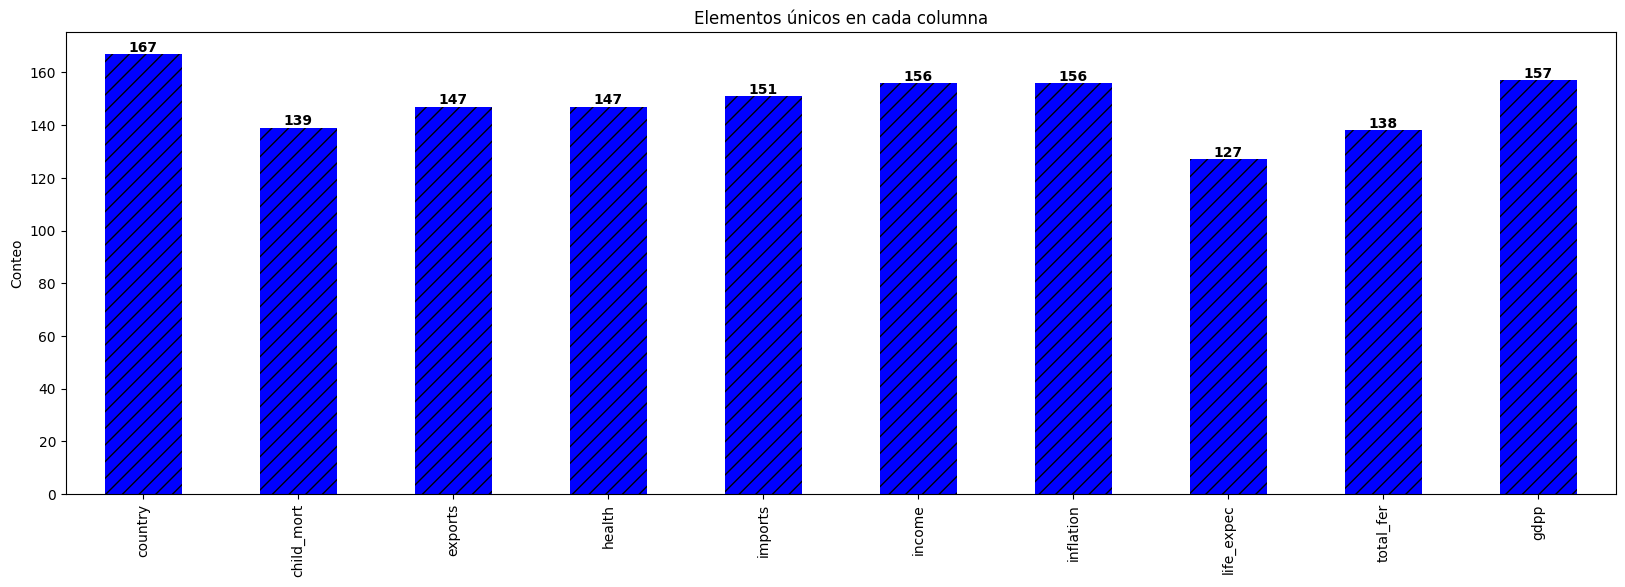

In [8]:
unique = df.nunique()
plt.figure(figsize=(20, 6))
unique.plot(kind='bar', color='blue', hatch='//')
plt.title('Elementos únicos en cada columna')
plt.ylabel('Conteo')
for i, v in enumerate(unique.values):
    plt.text(i, v+1, str(v), color='black', fontweight='bold', ha='center')
plt.show()

In [9]:
df.inflation.describe()

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

Vamos a revisar si existen valores negativos de inflación

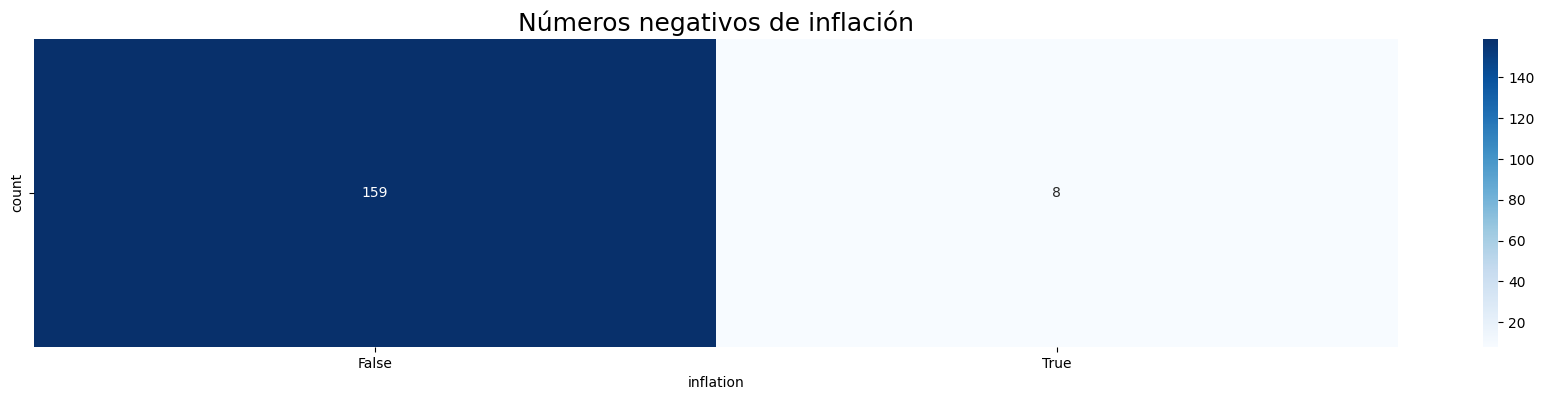

In [10]:
neg_values = df['inflation'] < 0

plt.figure(figsize=(22,4))
sns.heatmap(pd.DataFrame(neg_values.value_counts()).T, cmap='Blues', 
            annot=True, fmt='0.0f').set_title('Números negativos de inflación', fontsize=18)
plt.show()

- La deflación ocurre cuando los precios, en general, caen dentro de una economía.
- Este fenómeno puede ocurrir porque la oferta de bienes puede ser mayor que la demanda de ellos.
- También puede tener que ver con el aumento del poder adquisitivo del dinero (este puede puede 
crecer debido a una reducción en la oferta monetaria, así como a una disminución en la oferta de crédito, lo que tiene un efecto negativo en el gasto del consumidor)
- Este fenómeno tiene significado en el mundo real y por consiguiente no deben eliminarse del dataset.

Revisamos los datos faltantes mediante un mapa de calor

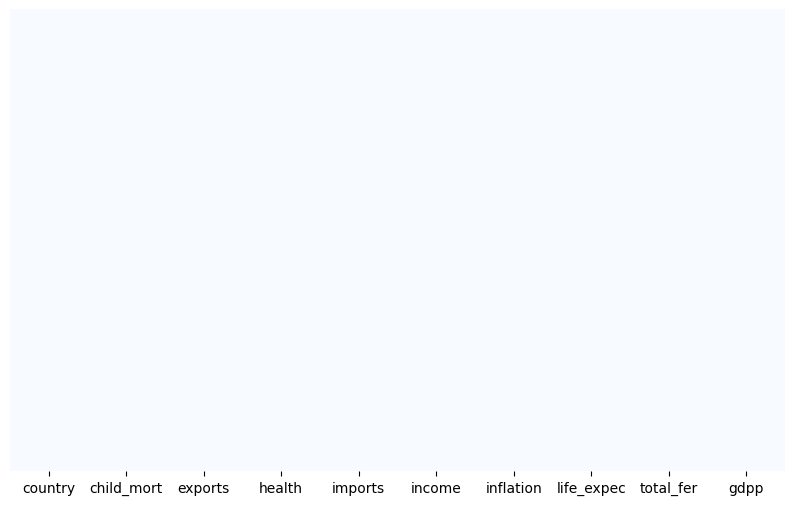

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Separamos características categóricas y numéricas

In [12]:
num_cols = pd.DataFrame (df, columns= df.select_dtypes(include=['int64','float64']).columns)
cat_cols = pd.DataFrame (df, columns= df.select_dtypes(include=['object']).columns)

Implementamos una función que nos permite dibujar nuestros diagramas de cajas y bigotes haciendo especial énfasis en el sesgo de la distribución y los datos atípicos

In [13]:
def plot_numerical_features_boxplots(data, columns_list, rows, cols, title):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(rows, cols, figsize=(15, 7), sharey=True)
    fig.suptitle(title, fontsize=25, y=1)
    axs = axs.flatten()
    outliers_df = pd.DataFrame(columns=['Column', 'Outlier_index', 'Outlier_values'])
    for i, col in enumerate(columns_list):
        sns.boxplot(x=data[col], color='#404B69', ax=axs[i])
        axs[i].set_title(f'{col} (sesgo: {data[col].skew().round(2)})', fontsize=12)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
        outliers_index = data[outliers].index.tolist()
        outliers_values = data[col][outliers].tolist()
        outliers_df = pd.concat([outliers_df,pd.DataFrame({'Column': col, 'Outlier_index': outliers_index, 'Outlier_values': outliers_values})], ignore_index=True)
        axs[i].plot([], [], 'ro', alpha=0.5, label=f'Atípicos: {outliers.sum()}')
        axs[i].legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    return outliers_df

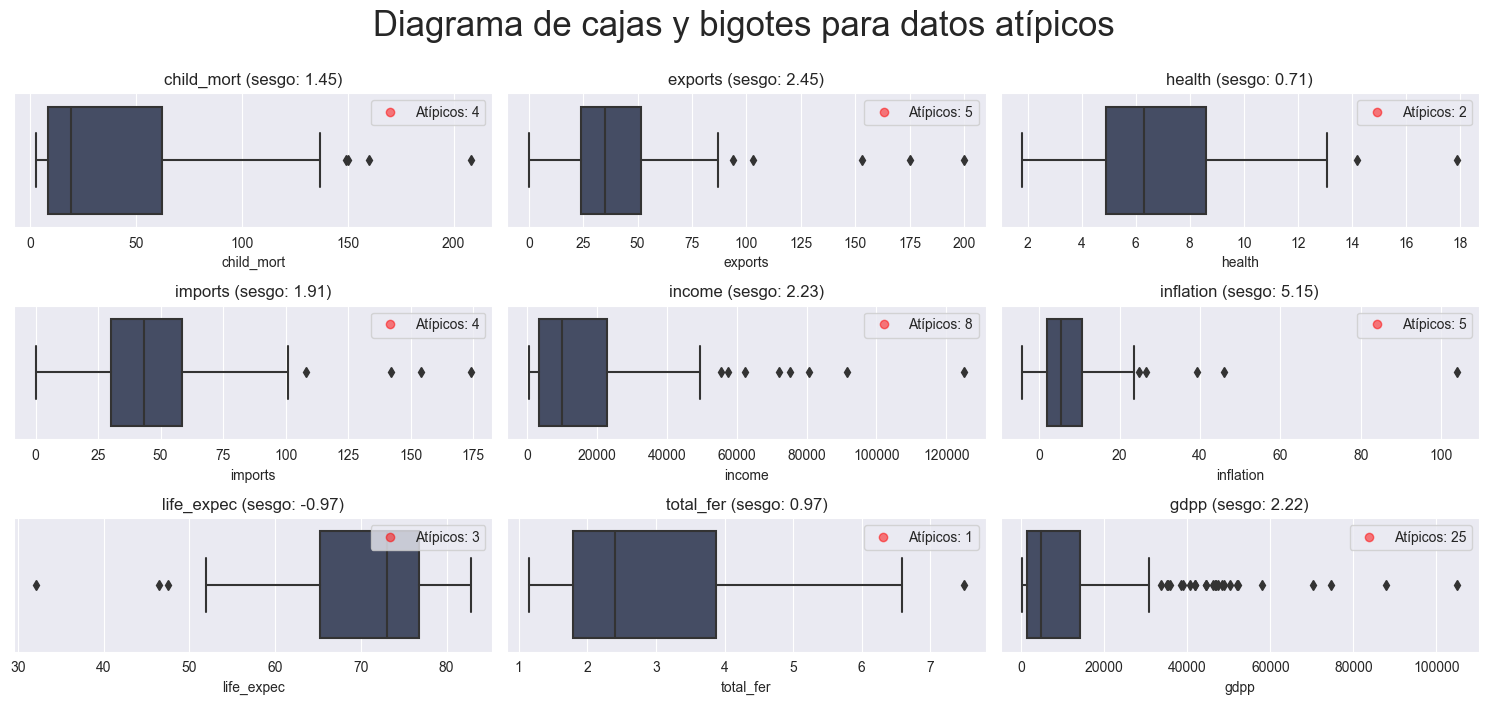

In [14]:
outliers_df = plot_numerical_features_boxplots(data=df, columns_list=num_cols, rows=3, cols=3, title='Diagrama de cajas y bigotes para datos atípicos')

#### Hallazgos

- Las variables se caracterizan por tener distribuciones altamente sesgadas.
- La gran mayoría de ellas tienen sesgo derecho (positivo)
- Life expectancy tienen sesgo izquierdo (negativo)
- Los datos se destacan por la presencia de datos atípicos
- No debemos destacarlos dentro de este contexto ya que representan países reales que debemos incluir en nuestro análisis


In [15]:
outliers_df

Column Outlier_index  Outlier_values
0   child_mort            31          149.00
1   child_mort            32          150.00
2   child_mort            66          208.00
3   child_mort           132          160.00
4      exports            73          103.00
5      exports            91          175.00
6      exports            98          153.00
7      exports           131           93.80
8      exports           133          200.00
9       health           101           14.20
10      health           159           17.90
11     imports            91          142.00
12     imports            98          154.00
13     imports           131          108.00
14     imports           133          174.00
15      income            23        80600.00
16      income            82        75200.00
17      income            91        91700.00
18      income           114        62300.00
19      income           123       125000.00
20      income           133        72100.00
21      income           145        55500.00
22      income           157        57600.00
23   inflation            49           24.90
24   inflation           103           39.20
25   inflation           113          104.00
26   inflation           149           26.50
27   inflation           163           45.90
28  life_expec            31           47.50
29  life_expec            66           32.10
30  life_expec            87           46.50
31   total_fer           112            7.49
32        gdpp             7        51900.00
33        gdpp             8        46900.00
34        gdpp            15        44400.00
35        gdpp            23        35300.00
36        gdpp            29        47400.00
37        gdpp            44        58000.00
38        gdpp            53        46200.00
39        gdpp            54        40600.00
40        gdpp            58        41800.00
41        gdpp            68        41900.00
42        gdpp            73        48700.00
43        gdpp            75        35800.00
44        gdpp            77        44500.00
45        gdpp            82        38500.00
46        gdpp            91       105000.00
47        gdpp           110        50300.00
48        gdpp           111        33700.00
49        gdpp           114        87800.00
50        gdpp           123        70300.00
51        gdpp           133        46600.00
52        gdpp           144        52100.00
53        gdpp           145        74600.00
54        gdpp           157        35000.00
55        gdpp           158        38900.00
56        gdpp           159        48400.00

- Encontramos datos atípicos pero esto es propio de las distribuciones sesgadas que encontramos en el dataset
- No se deben desacartar estos datos ya que representan países reales que deben incluirse en nuestro análisis
- Estos pueden brindarnos elementos importantes para nuestra tarea

#### Realizamos pairplots para tratar de identificar ruido

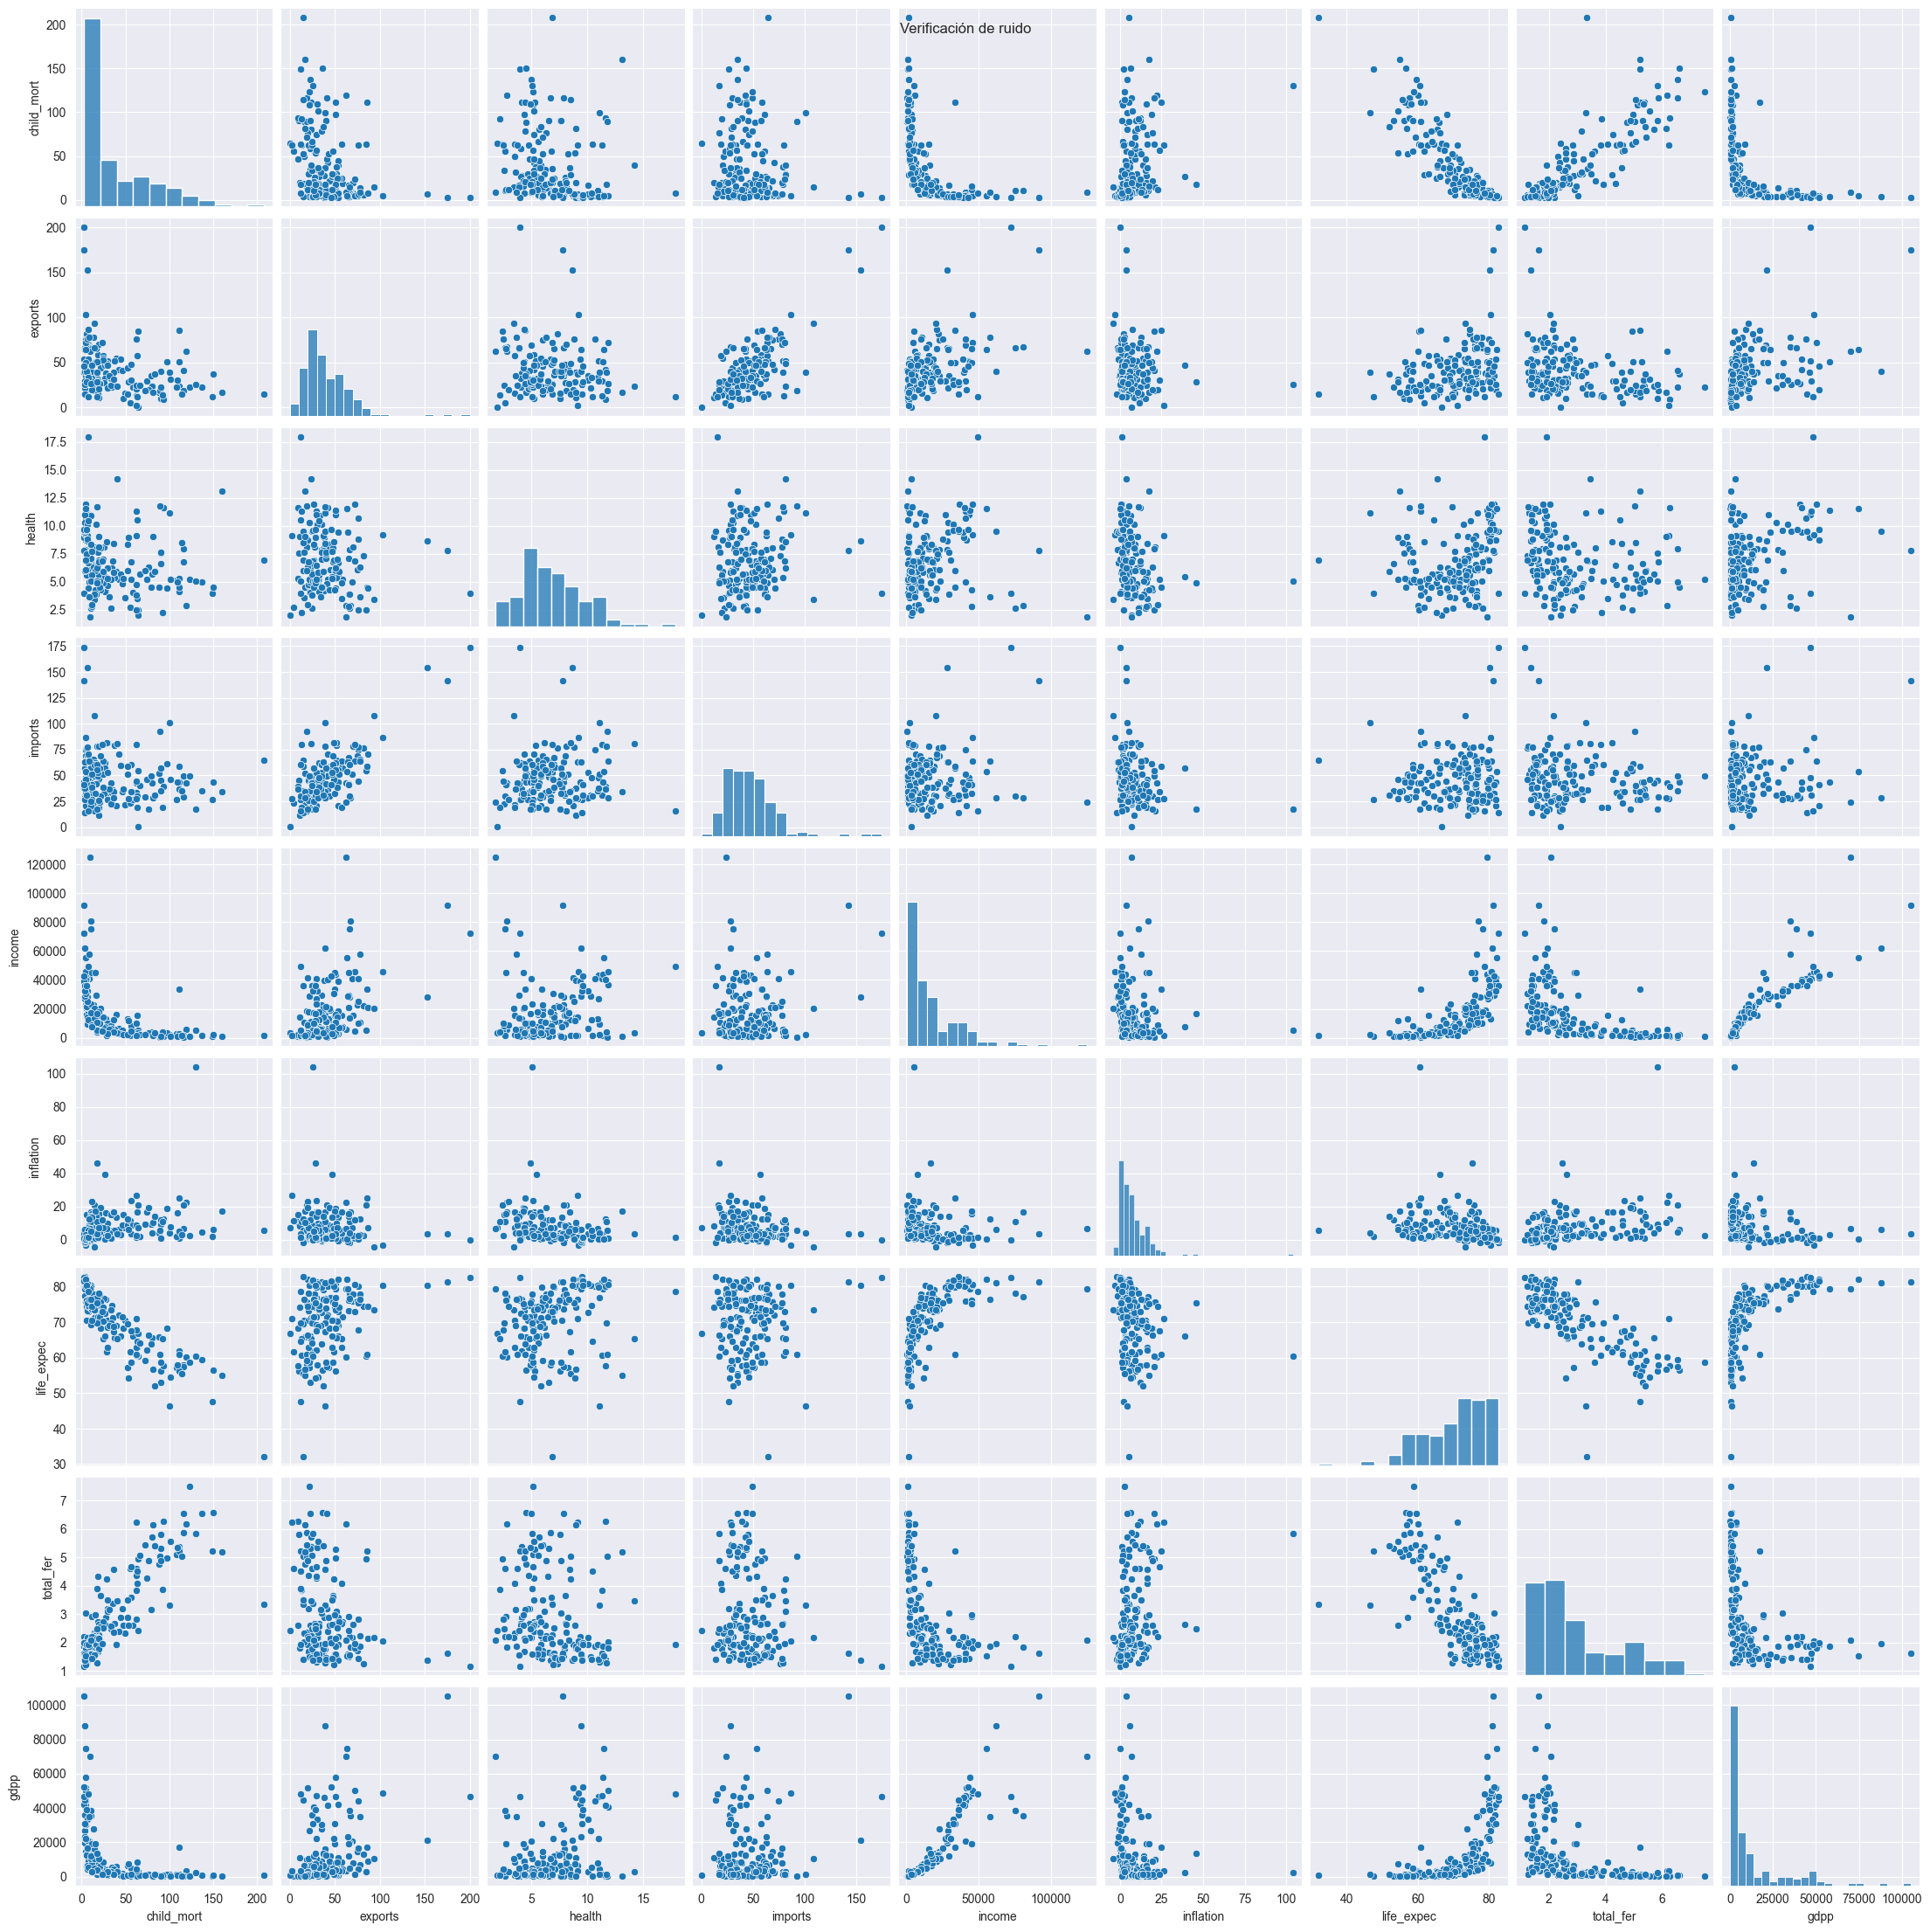

In [16]:
num_variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
sns.pairplot(df[num_variables])
plt.suptitle('Verificación de ruido')
plt.show()

Aunque encontramos algunas variables con ruido, son elementos que representan países reales que deben incluirse en el análisis.

#### Verificación de la distribución de cada una de las variables

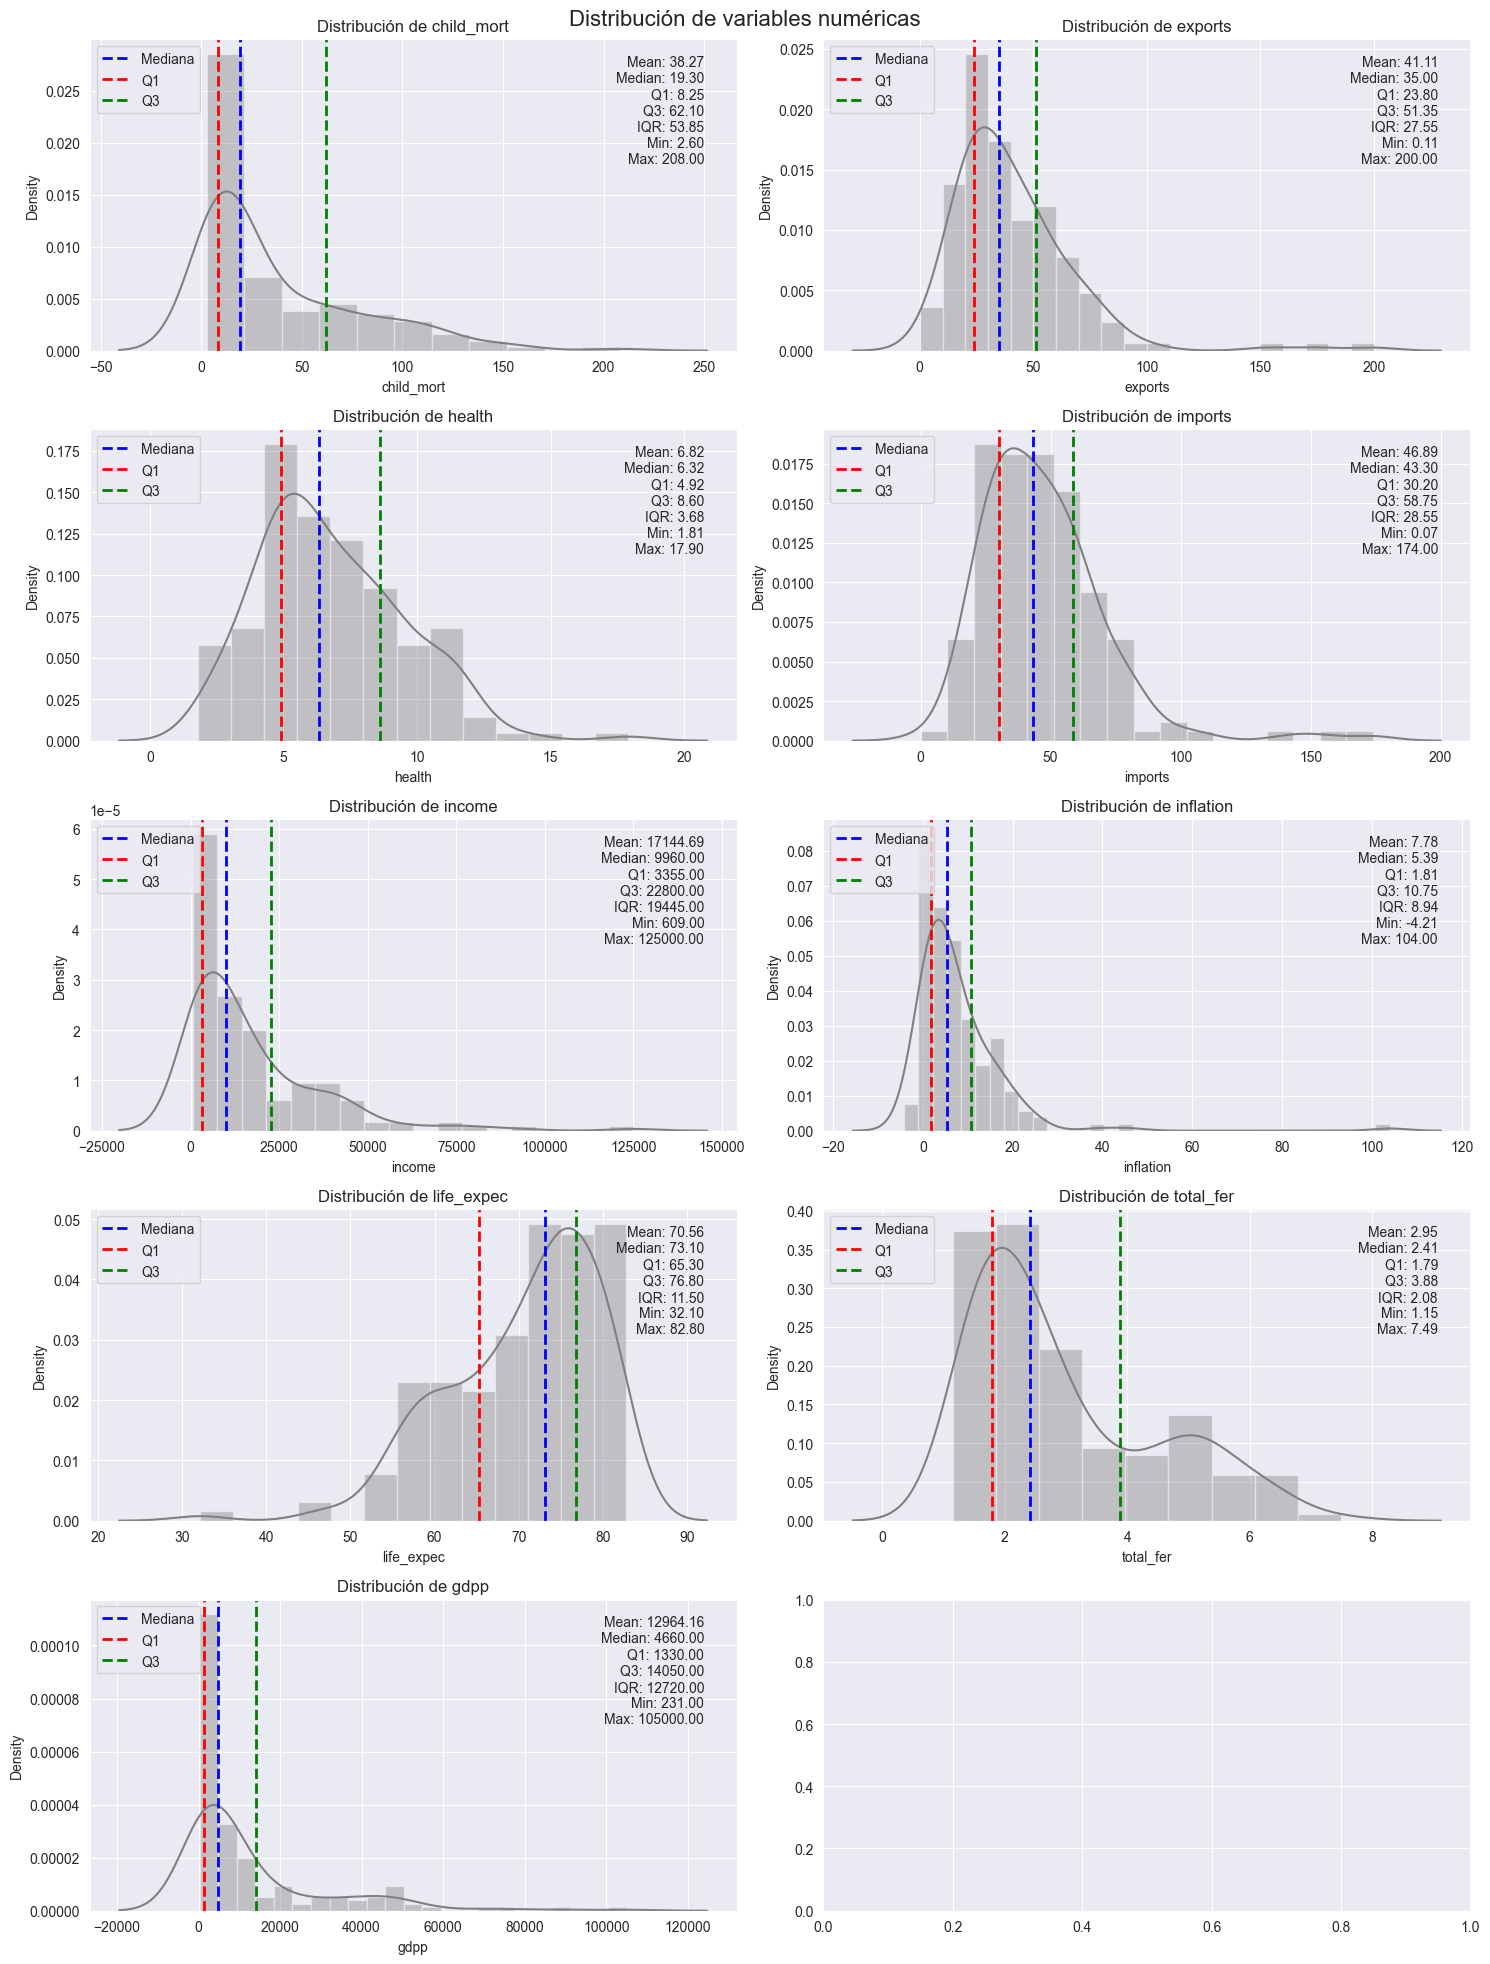

In [17]:
def distributions(df):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
    for i, column in enumerate(num_cols):
        sns.distplot(df[column], color='gray', ax=axes[i//2, i%2])
        axes[i//2, i%2].axvline(x=df[column].median(), color='blue', linestyle='--', linewidth=2, label='Mediana')
        axes[i//2, i%2].axvline(x=df[column].quantile(0.25), color='red', linestyle='--', linewidth=2, label='Q1')
        axes[i//2, i%2].axvline(x=df[column].quantile(0.75), color='green', linestyle='--', linewidth=2, label='Q3')
        median = df[column].median()
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        axes[i//2, i%2].text(0.95, 0.95,'Mean: {:.2f}\nMedian: {:.2f}\nQ1: {:.2f}\nQ3: {:.2f}\nIQR: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
        df[column].mean(), median, q1, q3, iqr, df[column].min(), df[column].max()),
        transform=axes[i//2, i%2].transAxes,fontsize=10, va='top', ha='right')
        axes[i//2, i%2].legend(loc = "upper left")
        axes[i//2, i%2].set_title('Distribución de '+ column)
    fig.suptitle('Distribución de variables numéricas', fontsize=16)
    fig.tight_layout()

distributions(df)

- Variables tales como child_mort, exports, health e imports presentan un sesgo positivo y poseen varios datos atípicos
- En especial child_mort presenta un alto sesgo a la derecha.
- Se observa entonces que la mayoría de los países posee una baja mortalidad en niños.
- Existen unas pocas excepciones con altas tasas de mortalidad en niños.
- La mediana se encuentra mucho más cercana al cuartil 1 que al cuartil 3. 
- Esta característica posiblemente jugará un importante rol al momento de discriminar los países en distintos clusters 
- Tanto income como inflación presentan sesgo positivo. 
- life_expectancy presenta un sesgo negativo en su distribución. 
- La gran mayoría de países presentan una experanza de vida superior a 65. Por otro lado, existen unos pocos países que tienen una esperanza de vida considerablemente inferior (entre 30 y 50).
- Esta disparidad sugiere la posible presencia de una factor diferenciador para los clústers
- Las tasas de fertilidad presentan una distribución con sesgo positivo
- La distribución de GDP también presenta un sesgo positivo.

#### Revisión del sesgo de cada variable

In [18]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
skew_df = pd.DataFrame(columns=['Característica', 'Tipo_sesgo'])

for feature in features:
    skew = df[feature].skew()
    
    if skew > 0:
        skewness = 'Sesgo positivo'
    elif skew < 0:
        skewness = 'Sesgo negativo'
    else:
        skewness = 'Simétrica'

    skew_df = pd.concat([skew_df,pd.DataFrame({'Característica': feature, 'Tipo_sesgo': skewness, 'Valor_sesgo': skew},index=[0])], ignore_index=True)

skew_df

Característica      Tipo_sesgo  Valor_sesgo
0     child_mort  Sesgo positivo     1.450774
1        exports  Sesgo positivo     2.445824
2         health  Sesgo positivo     0.705746
3        imports  Sesgo positivo     1.905276
4         income  Sesgo positivo     2.231480
5      inflation  Sesgo positivo     5.154049
6     life_expec  Sesgo negativo    -0.970996
7      total_fer  Sesgo positivo     0.967092
8           gdpp  Sesgo positivo     2.218051

Verificamos el sesgo para cada una de las variables

In [19]:
def bar_plot(df,mask_top_bottom,val,label,pal,order):
    plt.figure(figsize=(20,6))
    sns.set_style('whitegrid')
    ax = sns.barplot(x='country', y=val, data=df[mask_top_bottom], palette=pal, hatch='//', order=order)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.xlabel('Country')
    plt.ylabel(label)
    plt.title(label)
    plt.xticks(rotation=30)
    plt.show()

Vamos a relizar un análisis más profundo con respecto a cada una de las variables numéricas por país

En este caso, vamos a ordenar para obtener los 10 países con una tasa más alta y más baja de mortalidad en niños

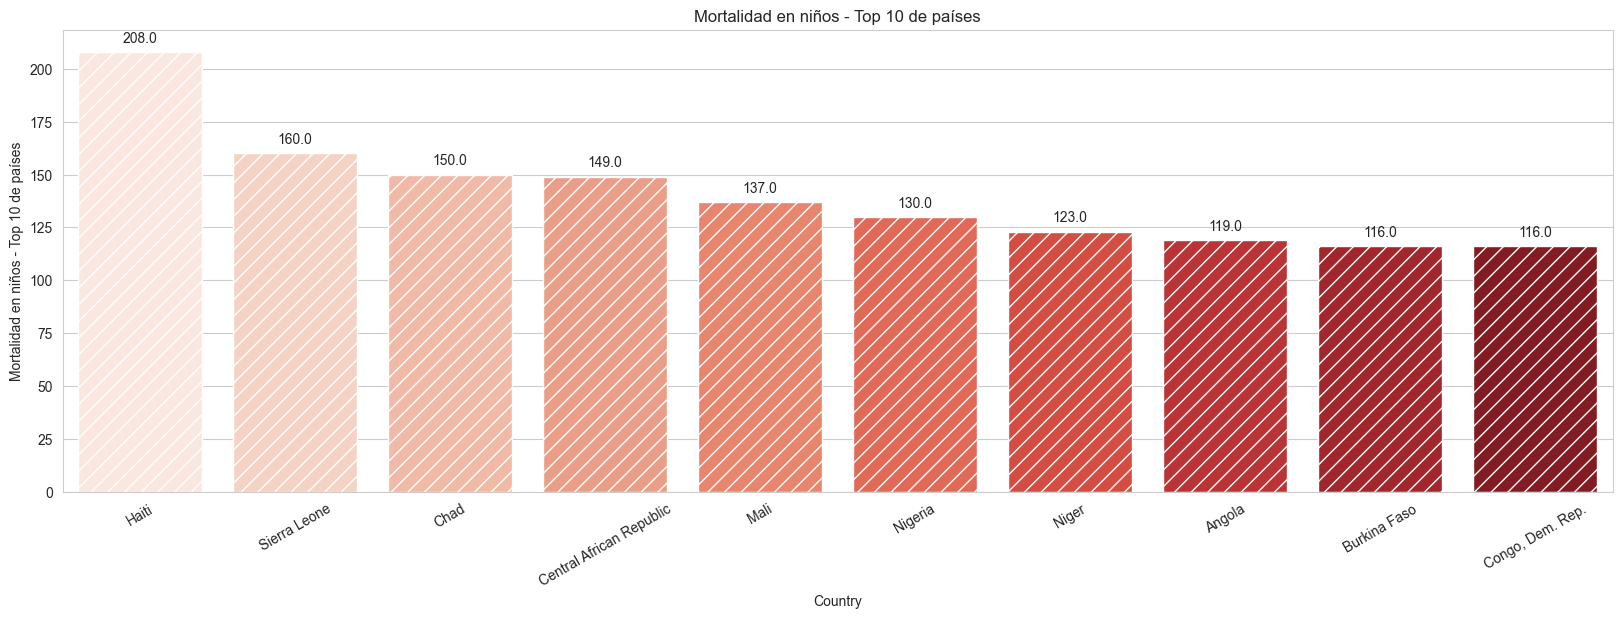

In [20]:
sorted_df = df.sort_values('child_mort')

top_10 = sorted_df.nlargest(10, 'child_mort')['country']
bottom_10 = sorted_df.nsmallest(10, 'child_mort')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'child_mort','Mortalidad en niños - Top 10 de países','Reds',top_10)

In [21]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  \
25               Burkina Faso       116.0     19.2    6.74     29.6    1430   
37           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
3                      Angola       119.0     62.3    2.85     42.9    5900   
112                     Niger       123.0     22.2    5.16     49.1     814   
113                   Nigeria       130.0     25.3    5.07     17.4    5150   
97                       Mali       137.0     22.8    4.98     35.1    1870   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
32                       Chad       150.0     36.8    4.53     43.5    1930   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
66                      Haiti       208.0     15.3    6.91     64.7    1500   

     inflation  life_expec  total_fer  gdpp  
25        6.81        57.9       5.87   575  
37       20.80        57.5       6.54   334  
3        22.40        60.1       6.16  3530  
112       2.55        58.8       7.49   348  
113     104.00        60.5       5.84  2330  
97        4.37        59.5       6.55   708  
31        2.01        47.5       5.21   446  
32        6.39        56.5       6.59   897  
132      17.20        55.0       5.20   399  
66        5.45        32.1       3.33   662

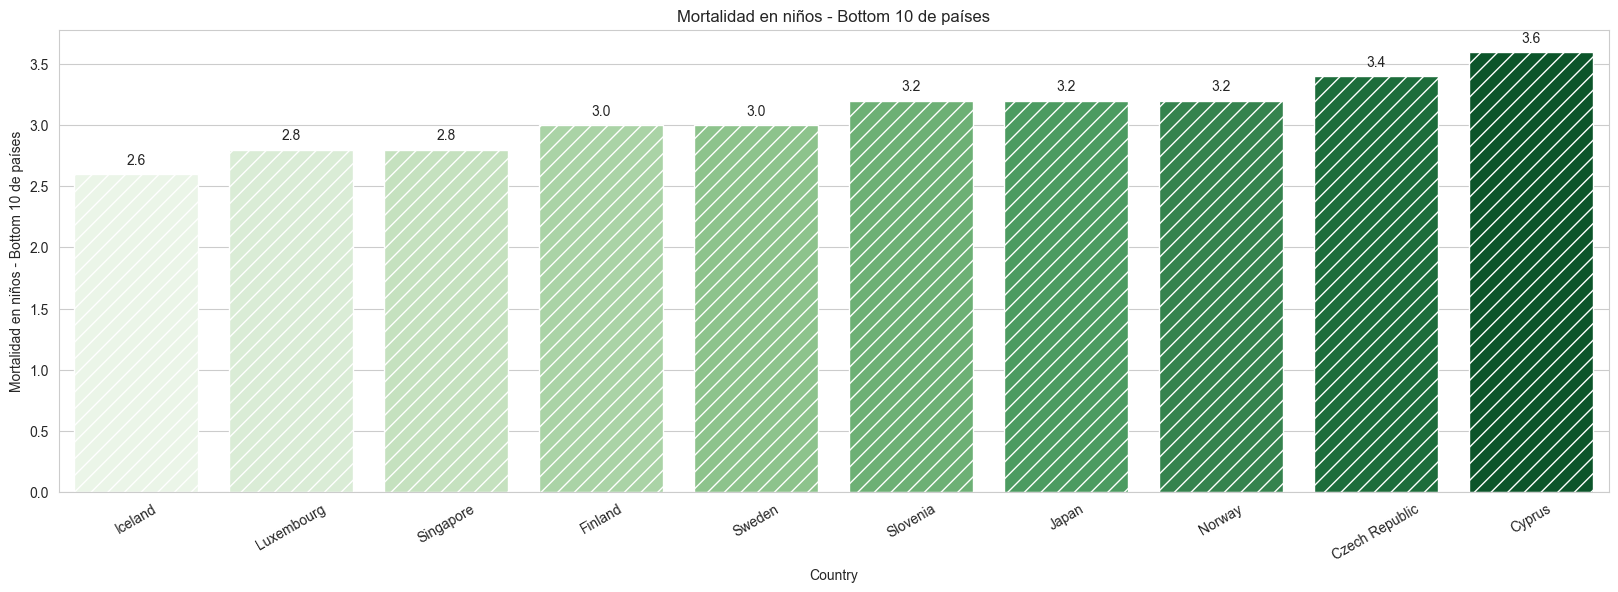

In [22]:
bar_plot(df,mask_top_bottom,'child_mort','Mortalidad en niños - Bottom 10 de países','Greens',bottom_10)

In [23]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  inflation  \
68          Iceland         2.6     53.4    9.40     43.3   38800      5.470   
91       Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
133       Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
53          Finland         3.0     38.7    8.95     37.4   39800      0.351   
144          Sweden         3.0     46.2    9.63     40.7   42900      0.991   
135        Slovenia         3.2     64.3    9.41     62.9   28700     -0.987   
77            Japan         3.2     15.0    9.49     13.6   35800     -1.900   
114          Norway         3.2     39.7    9.48     28.5   62300      5.950   
43   Czech Republic         3.4     66.0    7.88     62.9   28300     -1.430   
42           Cyprus         3.6     50.2    5.97     57.5   33900      2.010   

     life_expec  total_fer    gdpp  
68         82.0       2.20   41900  
91         81.3       1.63  105000  
133        82.7       1.15   46600  
53         80.0       1.87   46200  
144        81.5       1.98   52100  
135        79.5       1.57   23400  
77         82.8       1.39   44500  
114        81.0       1.95   87800  
43         77.5       1.51   19800  
42         79.9       1.42   30800

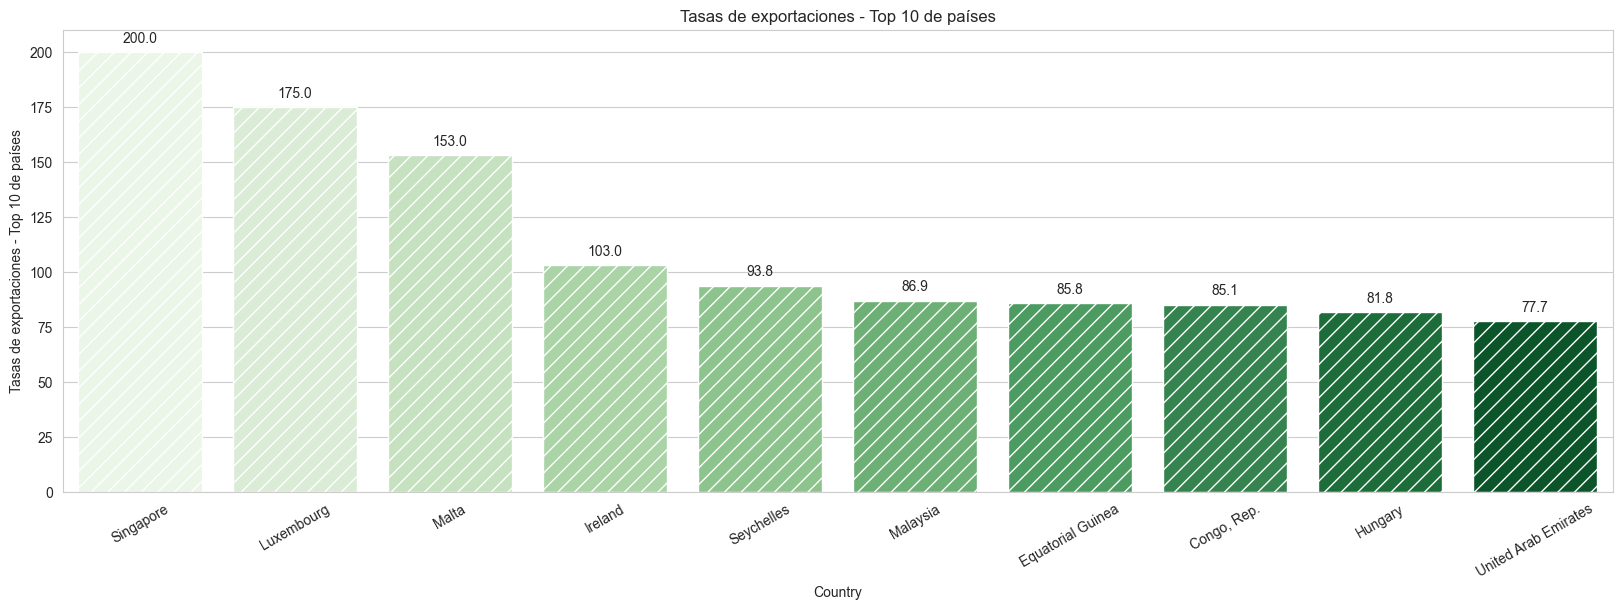

In [24]:
sorted_df = df.sort_values('exports')
top_10 = sorted_df.nlargest(10, 'exports')['country']
bottom_10 = sorted_df.nsmallest(10, 'exports')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'exports','Tasas de exportaciones - Top 10 de países','Greens',top_10)

In [25]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  \
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
67                Hungary         6.0     81.8    7.33     76.5   22300   
38            Congo, Rep.        63.9     85.1    2.46     54.7    5190   
49      Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
95               Malaysia         7.9     86.9    4.39     71.0   21100   
131            Seychelles        14.4     93.8    3.40    108.0   20400   
73                Ireland         4.2    103.0    9.19     86.5   45700   
98                  Malta         6.8    153.0    8.65    154.0   28300   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
133             Singapore         2.8    200.0    3.96    174.0   72100   

     inflation  life_expec  total_fer    gdpp  
157     12.500        76.5       1.87   35000  
67       2.330        74.5       1.25   13100  
38      20.700        60.4       4.95    2740  
49      24.900        60.9       5.21   17100  
95       7.270        74.5       2.15    9070  
131     -4.210        73.4       2.17   10800  
73      -3.220        80.4       2.05   48700  
98       3.830        80.3       1.36   21100  
91       3.620        81.3       1.63  105000  
133     -0.046        82.7       1.15   46600

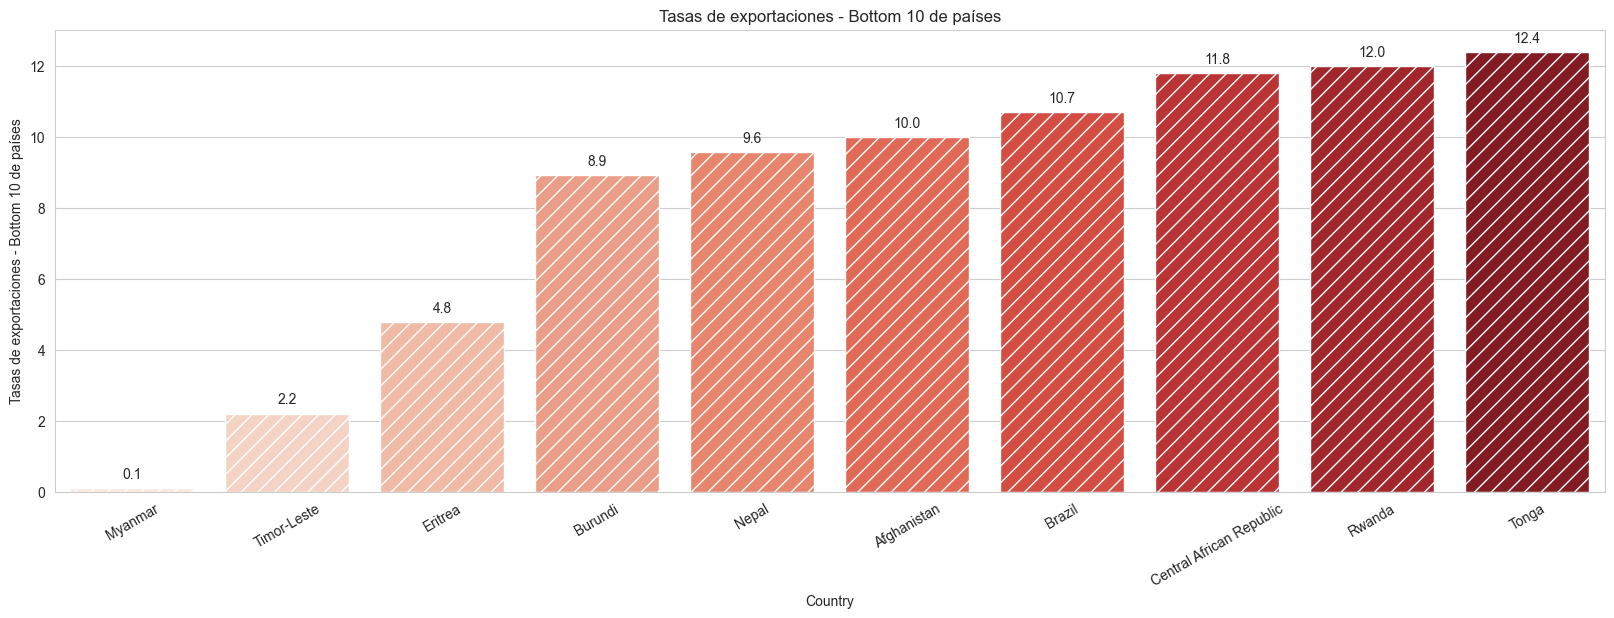

In [26]:
bar_plot(df,mask_top_bottom,'exports','Tasas de exportaciones - Bottom 10 de países','Reds',bottom_10)

In [27]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  \
107                   Myanmar        64.4    0.109    1.97   0.0659    3720   
149               Timor-Leste        62.6    2.200    9.12  27.8000    1850   
50                    Eritrea        55.2    4.790    2.66  23.3000    1420   
26                    Burundi        93.6    8.920   11.60  39.2000     764   
109                     Nepal        47.0    9.580    5.25  36.4000    1990   
0                 Afghanistan        90.2   10.000    7.58  44.9000    1610   
22                     Brazil        19.8   10.700    9.01  11.8000   14500   
31   Central African Republic       149.0   11.800    3.98  26.5000     888   
126                    Rwanda        63.6   12.000   10.50  30.0000    1350   
151                     Tonga        17.4   12.400    5.07  60.3000    4980   

     inflation  life_expec  total_fer   gdpp  
107       7.04        66.8       2.41    988  
149      26.50        71.1       6.23   3600  
50       11.60        61.7       4.61    482  
26       12.30        57.7       6.26    231  
109      15.10        68.3       2.61    592  
0         9.44        56.2       5.82    553  
22        8.41        74.2       1.80  11200  
31        2.01        47.5       5.21    446  
126       2.61        64.6       4.51    563  
151       3.68        69.9       3.91   3550

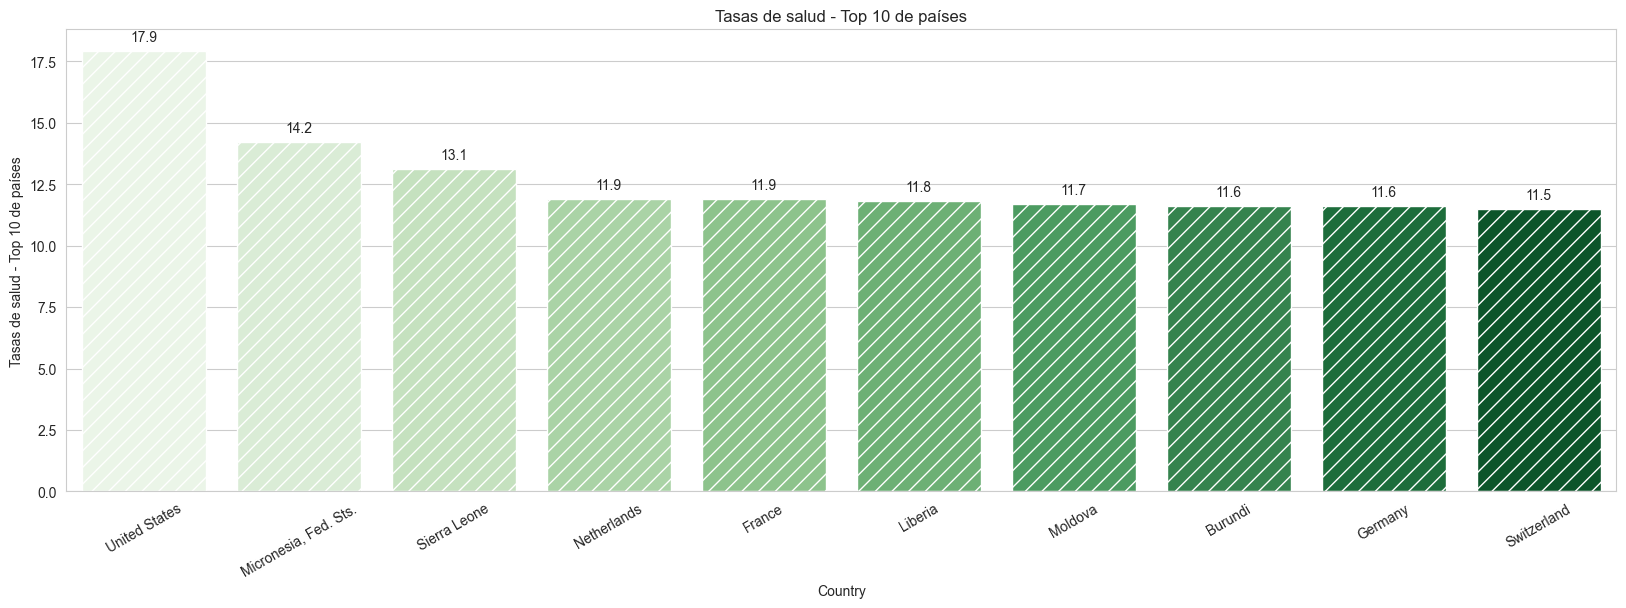

In [28]:
sorted_df = df.sort_values('health')
top_10 = sorted_df.nlargest(10, 'health')['country']
bottom_10 = sorted_df.nsmallest(10, 'health')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'health','Tasas de salud - Top 10 de países','Greens',top_10)

In [29]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  \
145            Switzerland         4.5    64.00    11.5     53.3   55500   
26                 Burundi        93.6     8.92    11.6     39.2     764   
58                 Germany         4.2    42.30    11.6     37.1   40400   
102                Moldova        17.2    39.20    11.7     78.5    3910   
88                 Liberia        89.3    19.10    11.8     92.6     700   
110            Netherlands         4.5    72.00    11.9     63.6   45500   
54                  France         4.2    26.80    11.9     28.1   36900   
132           Sierra Leone       160.0    16.80    13.1     34.5    1220   
101  Micronesia, Fed. Sts.        40.0    23.50    14.2     81.0    3340   
159          United States         7.3    12.40    17.9     15.8   49400   

     inflation  life_expec  total_fer   gdpp  
145      0.317        82.2       1.52  74600  
26      12.300        57.7       6.26    231  
58       0.758        80.1       1.39  41800  
102     11.100        69.7       1.27   1630  
88       5.470        60.8       5.02    327  
110      0.848        80.7       1.79  50300  
54       1.050        81.4       2.03  40600  
132     17.200        55.0       5.20    399  
101      3.800        65.4       3.46   2860  
159      1.220        78.7       1.93  48400

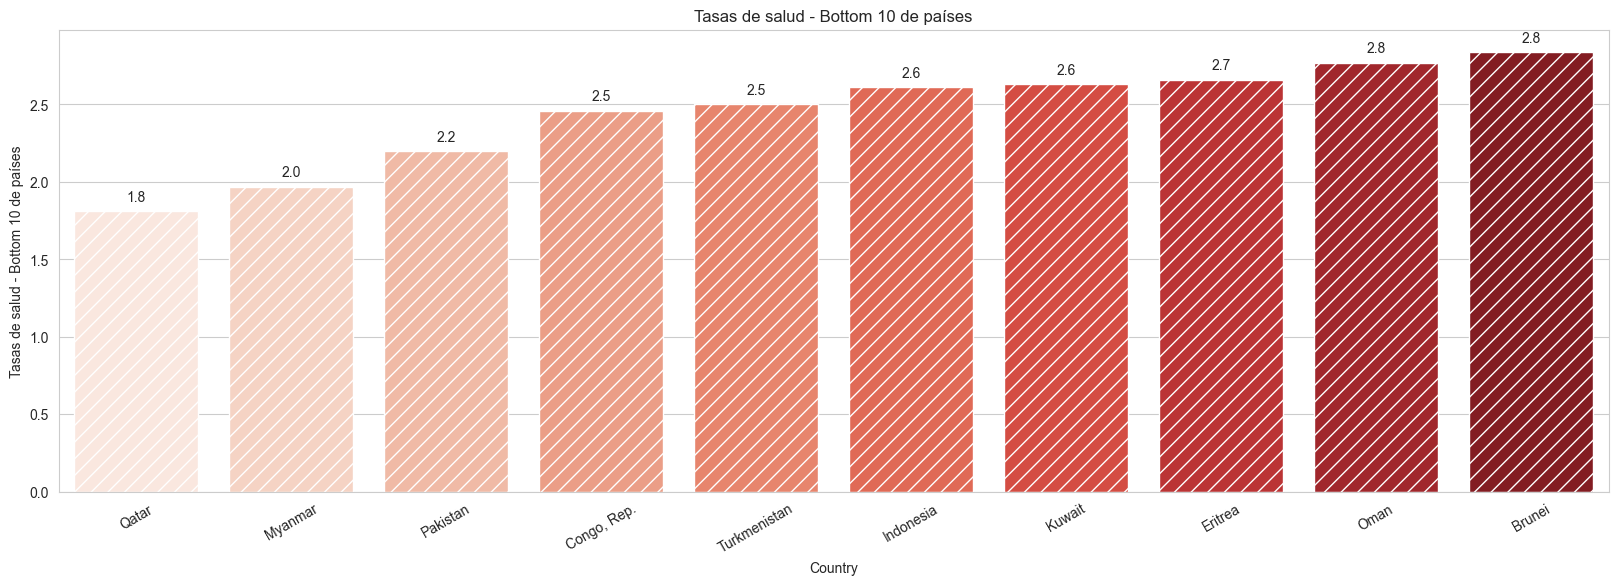

In [30]:
bar_plot(df,mask_top_bottom,'health','Tasas de salud - Bottom 10 de países','Reds',bottom_10)

In [31]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  inflation  \
123         Qatar         9.0   62.300    1.81  23.8000  125000       6.98   
107       Myanmar        64.4    0.109    1.97   0.0659    3720       7.04   
116      Pakistan        92.1   13.500    2.20  19.4000    4280      10.90   
38    Congo, Rep.        63.9   85.100    2.46  54.7000    5190      20.70   
154  Turkmenistan        62.0   76.300    2.50  44.5000    9940       2.31   
70      Indonesia        33.3   24.300    2.61  22.4000    8430      15.30   
82         Kuwait        10.8   66.700    2.63  30.4000   75200      11.20   
50        Eritrea        55.2    4.790    2.66  23.3000    1420      11.60   
115          Oman        11.7   65.700    2.77  41.2000   45300      15.60   
23         Brunei        10.5   67.400    2.84  28.0000   80600      16.70   

     life_expec  total_fer   gdpp  
123        79.5       2.07  70300  
107        66.8       2.41    988  
116        65.3       3.85   1040  
38         60.4       4.95   2740  
154        67.9       2.83   4440  
70         69.9       2.48   3110  
82         78.2       2.21  38500  
50         61.7       4.61    482  
115        76.1       2.90  19300  
23         77.1       1.84  35300

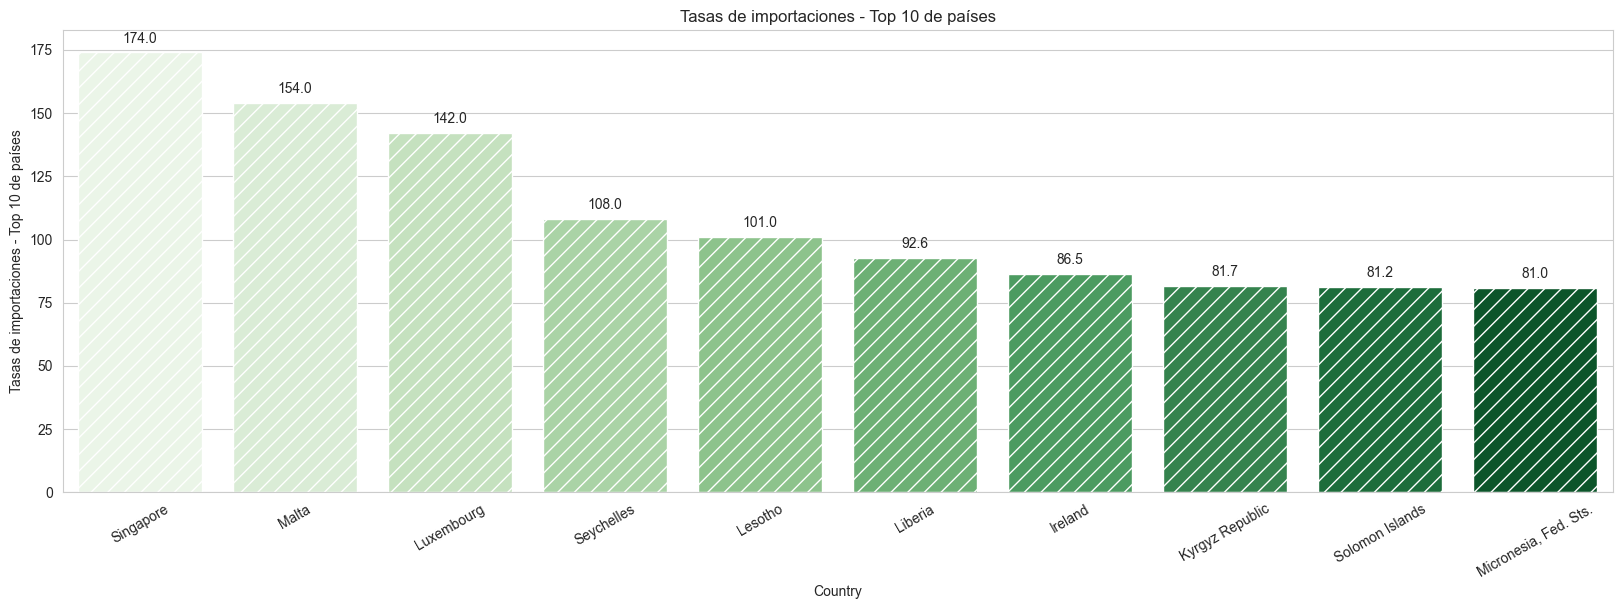

In [32]:
sorted_df = df.sort_values('imports')
top_10 = sorted_df.nlargest(10, 'imports')['country']
bottom_10 = sorted_df.nsmallest(10, 'imports')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'imports','Tasas de importaciones - Top 10 de países','Greens',top_10)

In [33]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  \
101  Micronesia, Fed. Sts.        40.0     23.5   14.20     81.0    3340   
136        Solomon Islands        28.1     49.3    8.55     81.2    1780   
83         Kyrgyz Republic        29.6     51.6    6.18     81.7    2790   
73                 Ireland         4.2    103.0    9.19     86.5   45700   
88                 Liberia        89.3     19.1   11.80     92.6     700   
87                 Lesotho        99.7     39.4   11.10    101.0    2380   
131             Seychelles        14.4     93.8    3.40    108.0   20400   
91              Luxembourg         2.8    175.0    7.77    142.0   91700   
98                   Malta         6.8    153.0    8.65    154.0   28300   
133              Singapore         2.8    200.0    3.96    174.0   72100   

     inflation  life_expec  total_fer    gdpp  
101      3.800        65.4       3.46    2860  
136      6.810        61.7       4.24    1290  
83      10.000        68.5       3.10     880  
73      -3.220        80.4       2.05   48700  
88       5.470        60.8       5.02     327  
87       4.150        46.5       3.30    1170  
131     -4.210        73.4       2.17   10800  
91       3.620        81.3       1.63  105000  
98       3.830        80.3       1.36   21100  
133     -0.046        82.7       1.15   46600

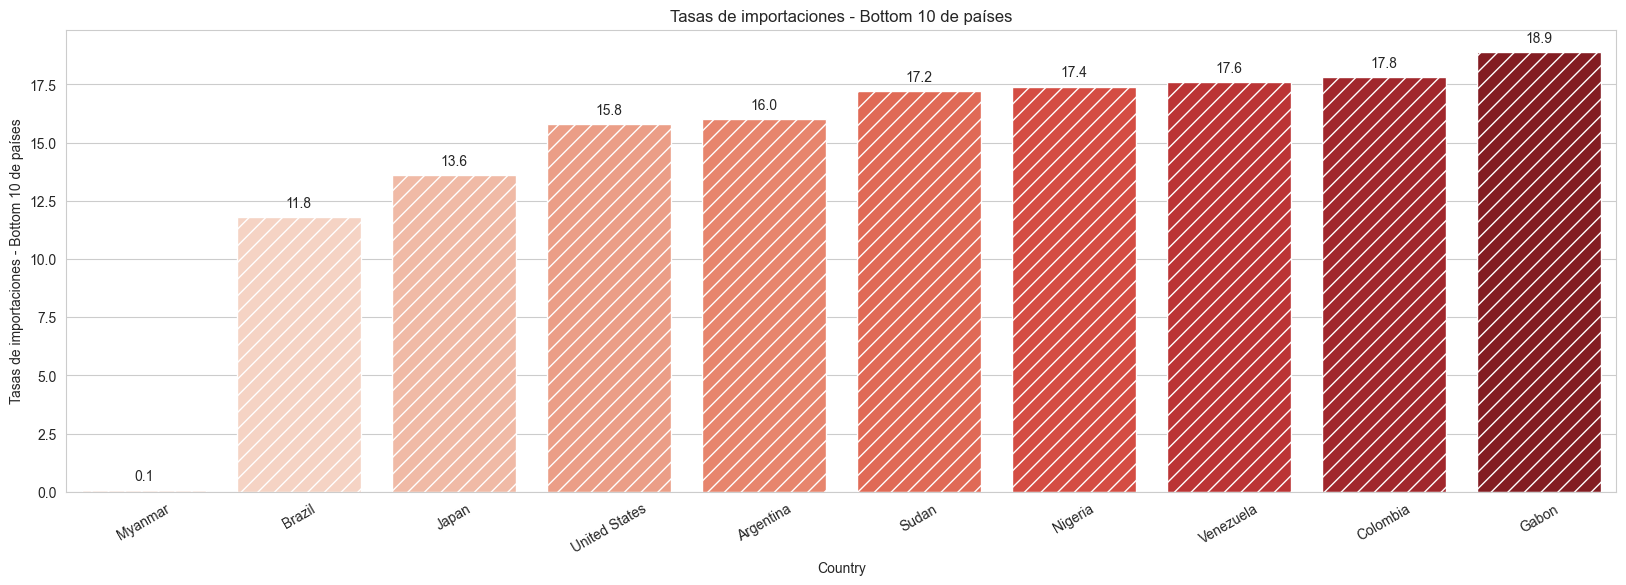

In [34]:
bar_plot(df,mask_top_bottom,'imports','Tasas de importaciones - Bottom 10 de países','Reds',bottom_10)

In [35]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  inflation  \
107        Myanmar        64.4    0.109    1.97   0.0659    3720       7.04   
22          Brazil        19.8   10.700    9.01  11.8000   14500       8.41   
77           Japan         3.2   15.000    9.49  13.6000   35800      -1.90   
159  United States         7.3   12.400   17.90  15.8000   49400       1.22   
5        Argentina        14.5   18.900    8.10  16.0000   18700      20.90   
142          Sudan        76.7   19.700    6.32  17.2000    3370      19.60   
113        Nigeria       130.0   25.300    5.07  17.4000    5150     104.00   
163      Venezuela        17.1   28.500    4.91  17.6000   16500      45.90   
35        Colombia        18.6   15.900    7.59  17.8000   10900       3.86   
55           Gabon        63.7   57.700    3.50  18.9000   15400      16.60   

     life_expec  total_fer   gdpp  
107        66.8       2.41    988  
22         74.2       1.80  11200  
77         82.8       1.39  44500  
159        78.7       1.93  48400  
5          75.8       2.37  10300  
142        66.3       4.88   1480  
113        60.5       5.84   2330  
163        75.4       2.47  13500  
35         76.4       2.01   6250  
55         62.9       4.08   8750

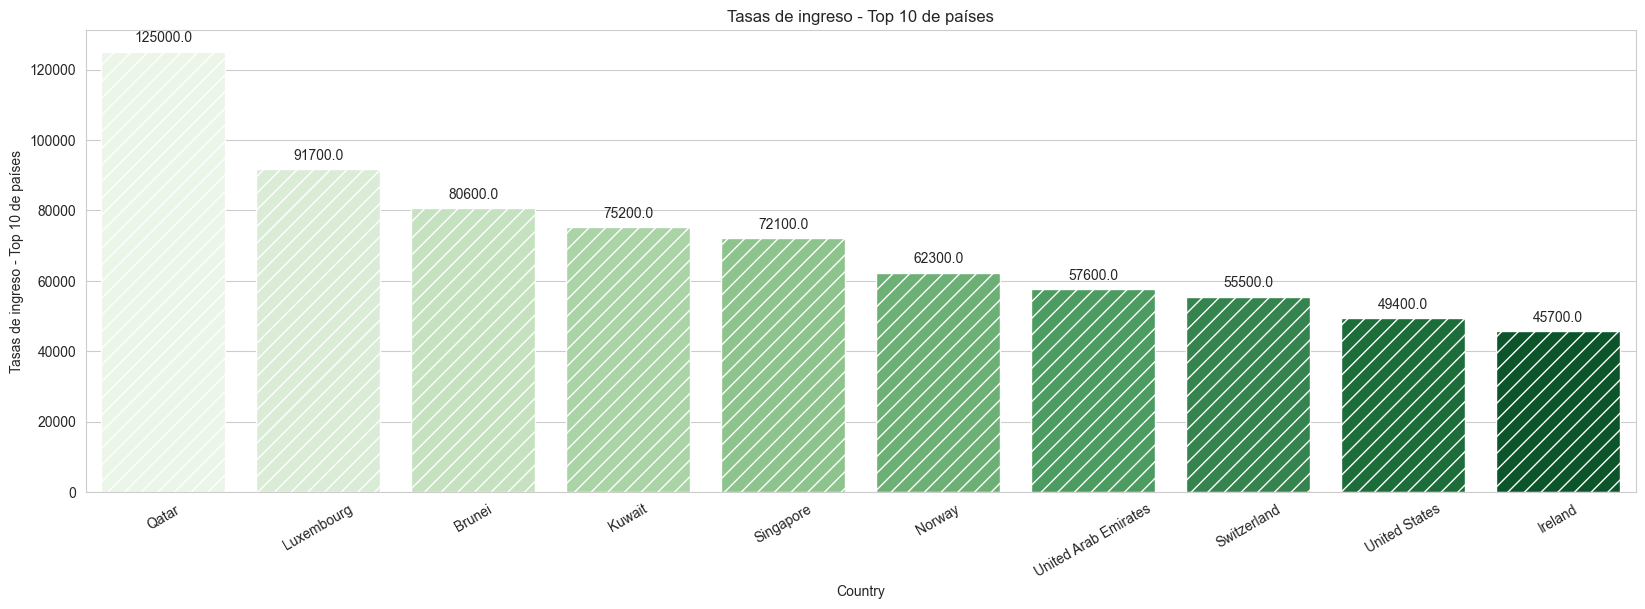

In [36]:
sorted_df = df.sort_values('income')
top_10 = sorted_df.nlargest(10, 'income')['country']
bottom_10 = sorted_df.nsmallest(10, 'income')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'income','Tasas de ingreso - Top 10 de países','Greens',top_10)

In [37]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  \
73                Ireland         4.2    103.0    9.19     86.5   45700   
159         United States         7.3     12.4   17.90     15.8   49400   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
114                Norway         3.2     39.7    9.48     28.5   62300   
133             Singapore         2.8    200.0    3.96    174.0   72100   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
123                 Qatar         9.0     62.3    1.81     23.8  125000   

     inflation  life_expec  total_fer    gdpp  
73      -3.220        80.4       2.05   48700  
159      1.220        78.7       1.93   48400  
145      0.317        82.2       1.52   74600  
157     12.500        76.5       1.87   35000  
114      5.950        81.0       1.95   87800  
133     -0.046        82.7       1.15   46600  
82      11.200        78.2       2.21   38500  
23      16.700        77.1       1.84   35300  
91       3.620        81.3       1.63  105000  
123      6.980        79.5       2.07   70300

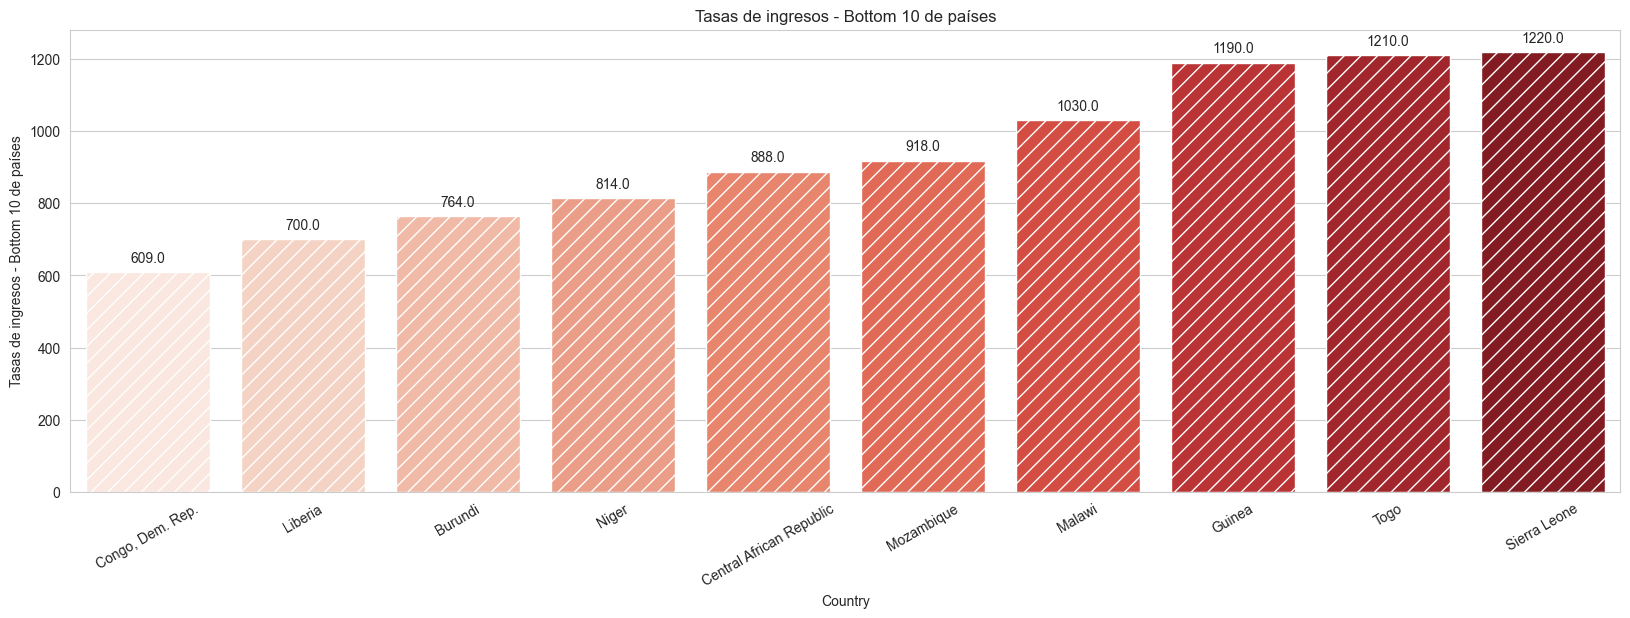

In [38]:
bar_plot(df,mask_top_bottom,'income','Tasas de ingresos - Bottom 10 de países','Reds',bottom_10)

In [39]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  \
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
88                    Liberia        89.3    19.10   11.80     92.6     700   
26                    Burundi        93.6     8.92   11.60     39.2     764   
112                     Niger       123.0    22.20    5.16     49.1     814   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
106                Mozambique       101.0    31.50    5.21     46.2     918   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
150                      Togo        90.3    40.20    7.65     57.3    1210   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  
37       20.80        57.5       6.54   334  
88        5.47        60.8       5.02   327  
26       12.30        57.7       6.26   231  
112       2.55        58.8       7.49   348  
31        2.01        47.5       5.21   446  
106       7.64        54.5       5.56   419  
94       12.10        53.1       5.31   459  
63       16.10        58.0       5.34   648  
150       1.18        58.7       4.87   488  
132      17.20        55.0       5.20   399

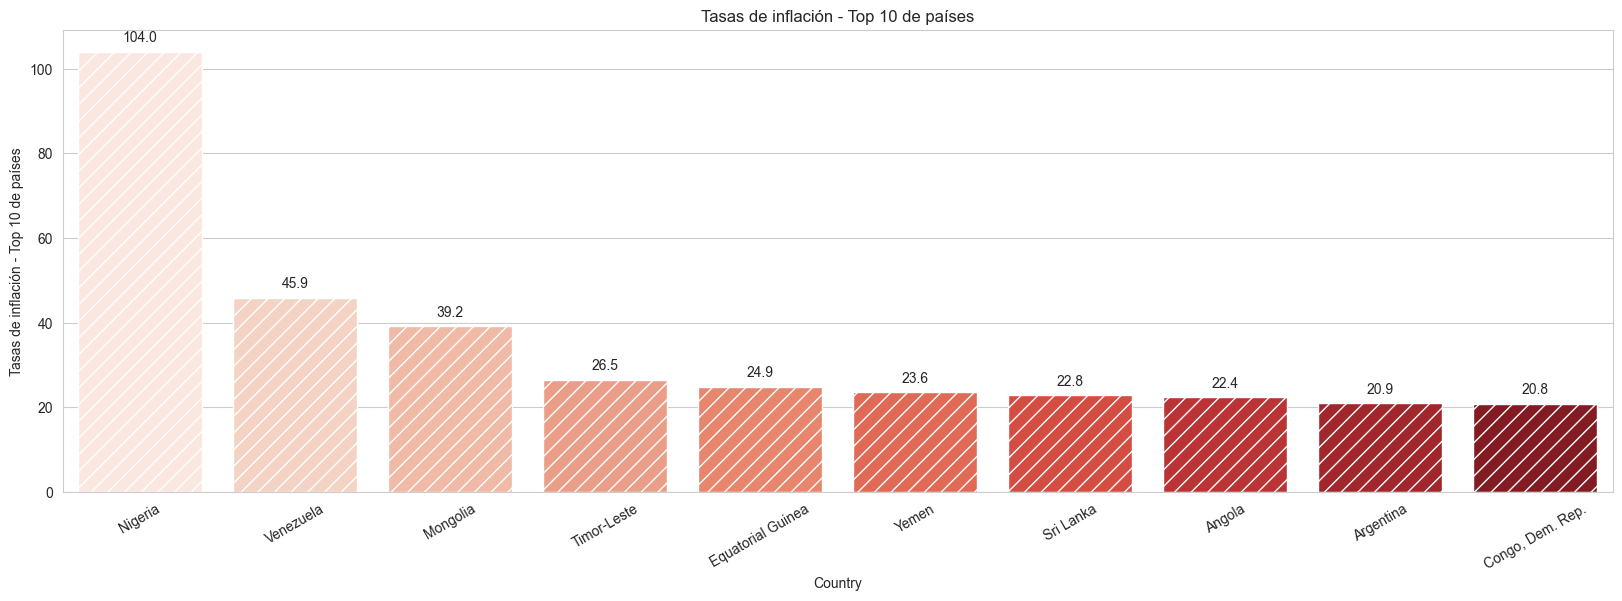

In [40]:
sorted_df = df.sort_values('inflation')
top_10 = sorted_df.nlargest(10, 'inflation')['country']
bottom_20 = sorted_df.nsmallest(20, 'inflation')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_20))
bar_plot(df,mask_top_bottom,'inflation','Tasas de inflación - Top 10 de países','Reds',top_10)

In [41]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  \
37    Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
5            Argentina        14.5     18.9    8.10     16.0   18700   
3               Angola       119.0     62.3    2.85     42.9    5900   
140          Sri Lanka        11.2     19.6    2.94     26.8    8560   
165              Yemen        56.3     30.0    5.18     34.4    4480   
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
149        Timor-Leste        62.6      2.2    9.12     27.8    1850   
103           Mongolia        26.1     46.7    5.44     56.7    7710   
163          Venezuela        17.1     28.5    4.91     17.6   16500   
113            Nigeria       130.0     25.3    5.07     17.4    5150   

     inflation  life_expec  total_fer   gdpp  
37        20.8        57.5       6.54    334  
5         20.9        75.8       2.37  10300  
3         22.4        60.1       6.16   3530  
140       22.8        74.4       2.20   2810  
165       23.6        67.5       4.67   1310  
49        24.9        60.9       5.21  17100  
149       26.5        71.1       6.23   3600  
103       39.2        66.2       2.64   2650  
163       45.9        75.4       2.47  13500  
113      104.0        60.5       5.84   2330

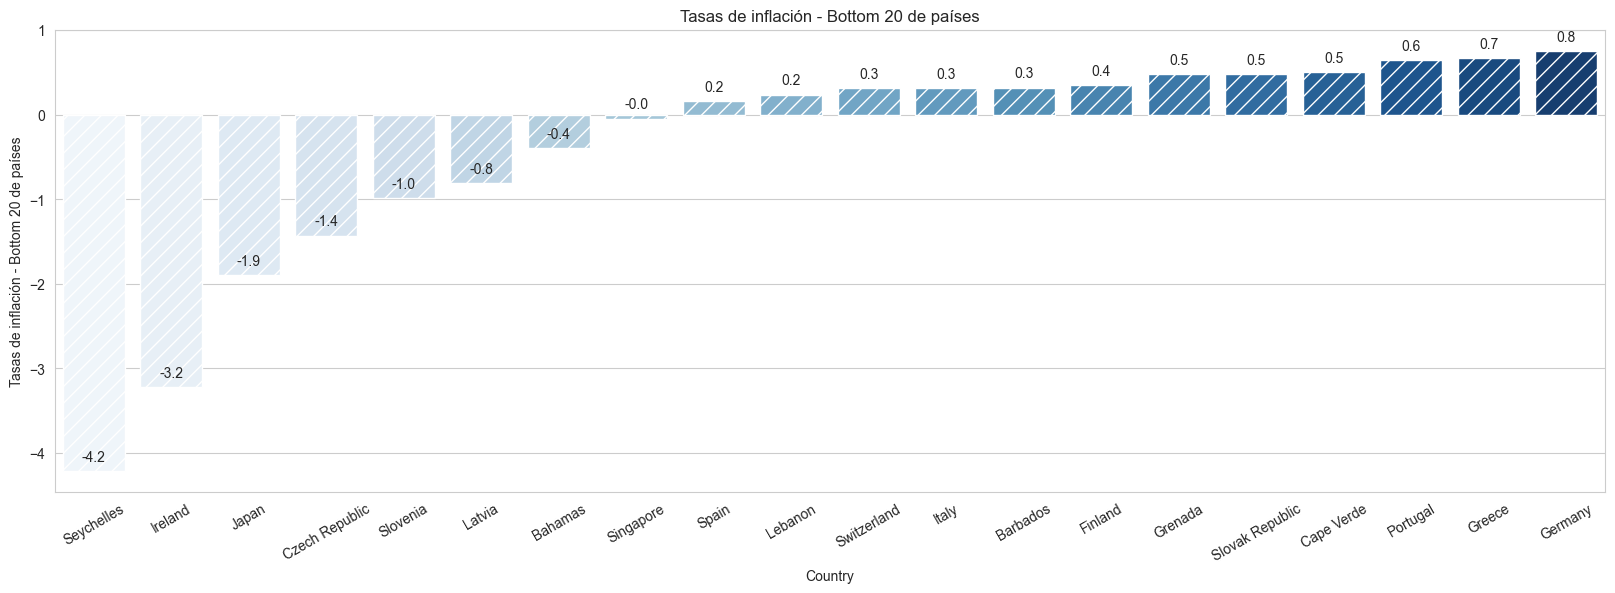

In [42]:
bar_plot(df,mask_top_bottom,'inflation','Tasas de inflación - Bottom 20 de países','Blues',bottom_20)

In [43]:
sorted_df.head(20)


country  child_mort  exports  health  imports  income  inflation  \
131       Seychelles        14.4     93.8    3.40    108.0   20400     -4.210   
73           Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
77             Japan         3.2     15.0    9.49     13.6   35800     -1.900   
43    Czech Republic         3.4     66.0    7.88     62.9   28300     -1.430   
135         Slovenia         3.2     64.3    9.41     62.9   28700     -0.987   
85            Latvia         7.8     53.7    6.68     55.1   18300     -0.812   
10           Bahamas        13.8     35.0    7.89     43.7   22900     -0.393   
133        Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
139            Spain         3.8     25.5    9.54     26.8   32500      0.160   
86           Lebanon        10.3     35.8    7.03     60.2   16300      0.238   
145      Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
75             Italy         4.0     25.2    9.53     27.2   36200      0.319   
13          Barbados        14.2     39.5    7.97     48.7   15300      0.321   
53           Finland         3.0     38.7    8.95     37.4   39800      0.351   
61           Grenada        14.6     23.8    5.86     49.2   11200      0.480   
134  Slovak Republic         7.0     76.3    8.79     77.8   25200      0.485   
30        Cape Verde        26.5     32.7    4.09     61.8    5830      0.505   
122         Portugal         3.9     29.9   11.00     37.4   27200      0.643   
60            Greece         3.9     22.1   10.30     30.7   28700      0.673   
58           Germany         4.2     42.3   11.60     37.1   40400      0.758   

     life_expec  total_fer   gdpp  
131        73.4       2.17  10800  
73         80.4       2.05  48700  
77         82.8       1.39  44500  
43         77.5       1.51  19800  
135        79.5       1.57  23400  
85         73.1       1.36  11300  
10         73.8       1.86  28000  
133        82.7       1.15  46600  
139        81.9       1.37  30700  
86         79.8       1.61   8860  
145        82.2       1.52  74600  
75         81.7       1.46  35800  
13         76.7       1.78  16000  
53         80.0       1.87  46200  
61         71.3       2.24   7370  
134        75.5       1.43  16600  
30         72.5       2.67   3310  
122        79.8       1.39  22500  
60         80.4       1.48  26900  
58         80.1       1.39  41800

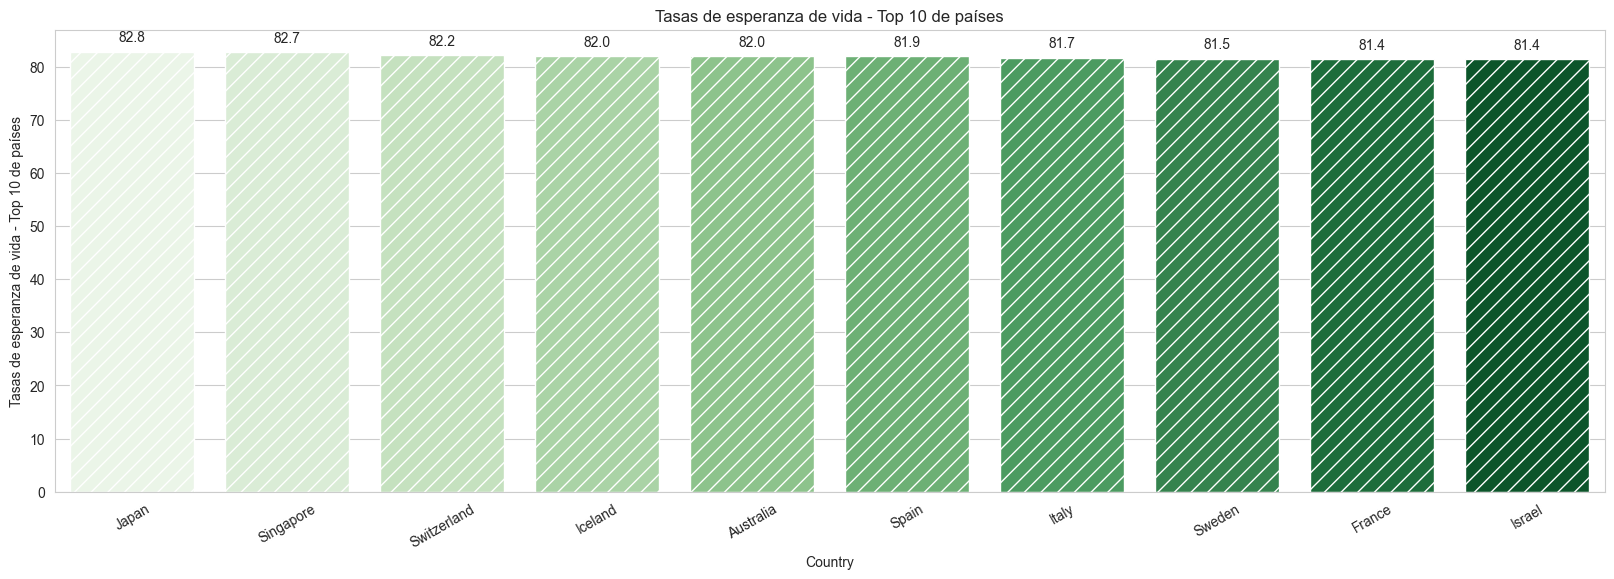

In [44]:
sorted_df = df.sort_values('life_expec')
top_10 = sorted_df.nlargest(10, 'life_expec')['country']
bottom_10 = sorted_df.nsmallest(10, 'life_expec')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'life_expec','Tasas de esperanza de vida - Top 10 de países','Greens',top_10)

In [45]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  inflation  \
54        France         4.2     26.8   11.90     28.1   36900      1.050   
74        Israel         4.6     35.0    7.63     32.9   29600      1.770   
144       Sweden         3.0     46.2    9.63     40.7   42900      0.991   
75         Italy         4.0     25.2    9.53     27.2   36200      0.319   
139        Spain         3.8     25.5    9.54     26.8   32500      0.160   
68       Iceland         2.6     53.4    9.40     43.3   38800      5.470   
7      Australia         4.8     19.8    8.73     20.9   41400      1.160   
145  Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
133    Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
77         Japan         3.2     15.0    9.49     13.6   35800     -1.900   

     life_expec  total_fer   gdpp  
54         81.4       2.03  40600  
74         81.4       3.03  30600  
144        81.5       1.98  52100  
75         81.7       1.46  35800  
139        81.9       1.37  30700  
68         82.0       2.20  41900  
7          82.0       1.93  51900  
145        82.2       1.52  74600  
133        82.7       1.15  46600  
77         82.8       1.39  44500

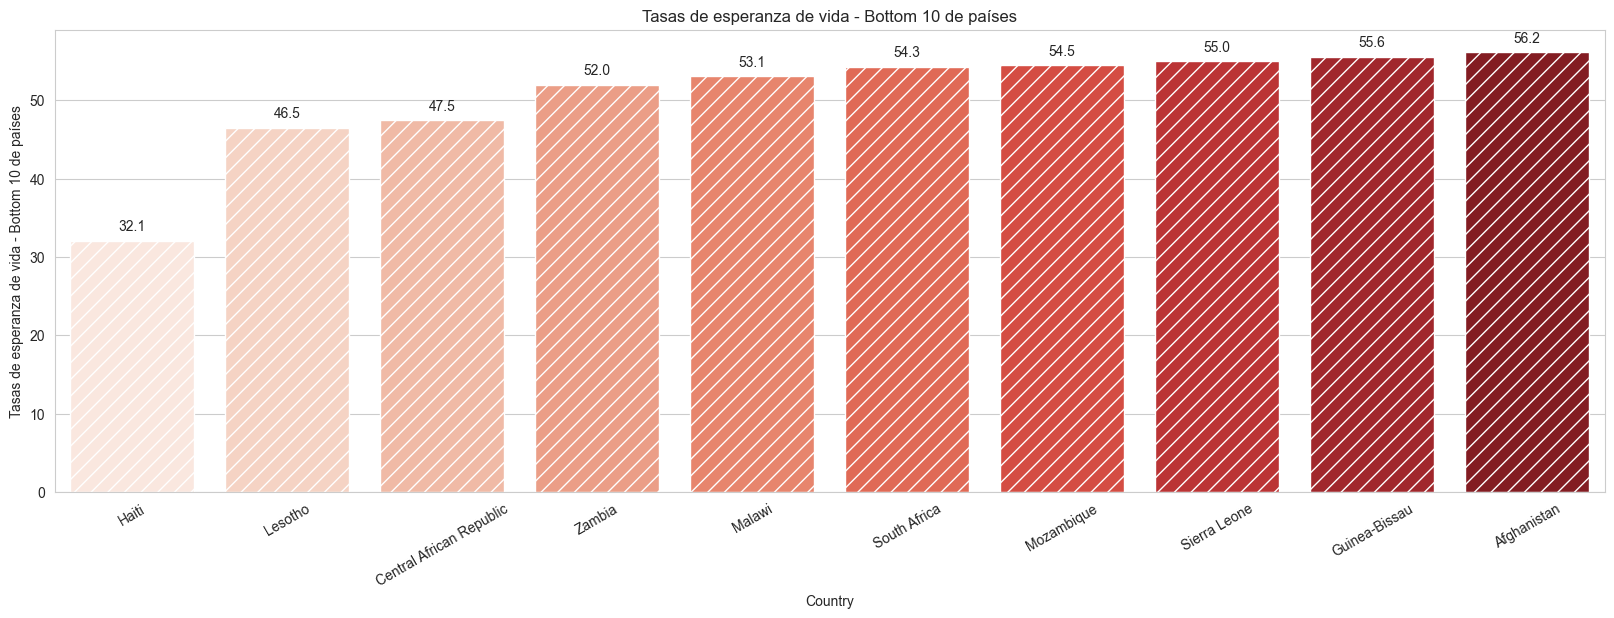

In [46]:
bar_plot(df,mask_top_bottom,'life_expec','Tasas de esperanza de vida - Bottom 10 de países','Reds',bottom_10)

In [47]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
87                    Lesotho        99.7     39.4   11.10    101.0    2380   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
166                    Zambia        83.1     37.0    5.89     30.9    3280   
94                     Malawi        90.5     22.8    6.59     34.9    1030   
137              South Africa        53.7     28.6    8.94     27.4   12000   
106                Mozambique       101.0     31.5    5.21     46.2     918   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
64              Guinea-Bissau       114.0     14.9    8.50     35.2    1390   
0                 Afghanistan        90.2     10.0    7.58     44.9    1610   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
87        4.15        46.5       3.30  1170  
31        2.01        47.5       5.21   446  
166      14.00        52.0       5.40  1460  
94       12.10        53.1       5.31   459  
137       6.35        54.3       2.59  7280  
106       7.64        54.5       5.56   419  
132      17.20        55.0       5.20   399  
64        2.97        55.6       5.05   547  
0         9.44        56.2       5.82   553

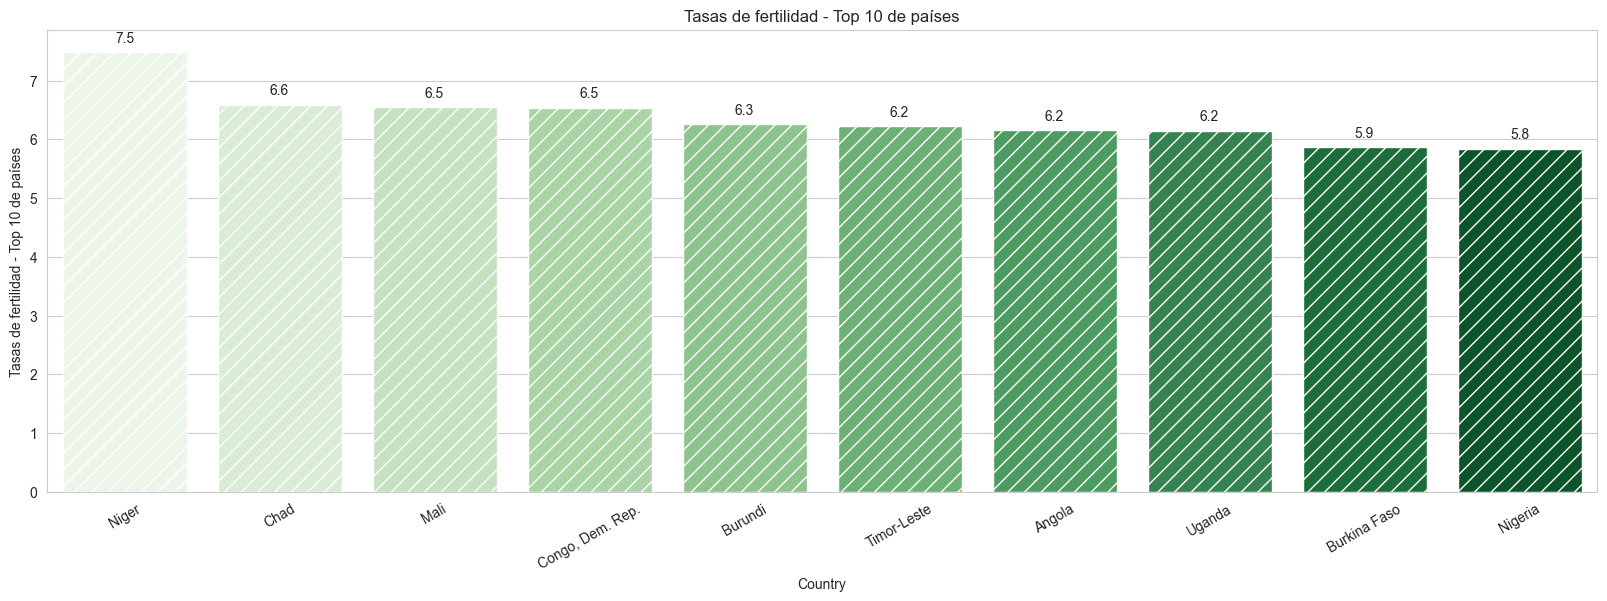

In [48]:
sorted_df = df.sort_values('total_fer')
top_10 = sorted_df.nlargest(10, 'total_fer')['country']
bottom_10 = sorted_df.nsmallest(10, 'total_fer')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'total_fer','Tasas de fertilidad - Top 10 de países','Greens',top_10)

In [49]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  \
113           Nigeria       130.0    25.30    5.07     17.4    5150   
25       Burkina Faso       116.0    19.20    6.74     29.6    1430   
155            Uganda        81.0    17.10    9.01     28.6    1540   
3              Angola       119.0    62.30    2.85     42.9    5900   
149       Timor-Leste        62.6     2.20    9.12     27.8    1850   
26            Burundi        93.6     8.92   11.60     39.2     764   
37   Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
97               Mali       137.0    22.80    4.98     35.1    1870   
32               Chad       150.0    36.80    4.53     43.5    1930   
112             Niger       123.0    22.20    5.16     49.1     814   

     inflation  life_expec  total_fer  gdpp  
113     104.00        60.5       5.84  2330  
25        6.81        57.9       5.87   575  
155      10.60        56.8       6.15   595  
3        22.40        60.1       6.16  3530  
149      26.50        71.1       6.23  3600  
26       12.30        57.7       6.26   231  
37       20.80        57.5       6.54   334  
97        4.37        59.5       6.55   708  
32        6.39        56.5       6.59   897  
112       2.55        58.8       7.49   348

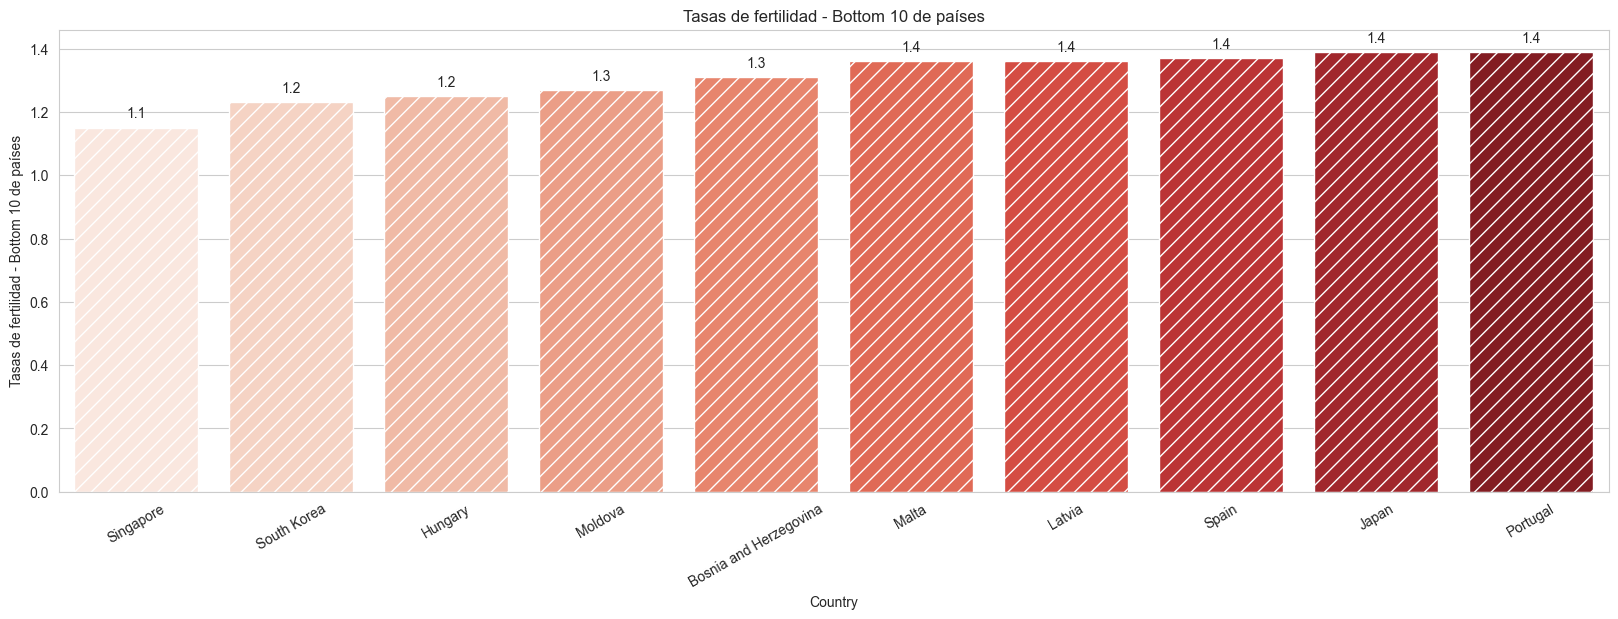

In [50]:
bar_plot(df,mask_top_bottom,'total_fer','Tasas de fertilidad - Bottom 10 de países','Reds',bottom_10)

In [51]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  \
133               Singapore         2.8    200.0    3.96    174.0   72100   
138             South Korea         4.1     49.4    6.93     46.2   30400   
67                  Hungary         6.0     81.8    7.33     76.5   22300   
102                 Moldova        17.2     39.2   11.70     78.5    3910   
20   Bosnia and Herzegovina         6.9     29.7   11.10     51.3    9720   
98                    Malta         6.8    153.0    8.65    154.0   28300   
85                   Latvia         7.8     53.7    6.68     55.1   18300   
139                   Spain         3.8     25.5    9.54     26.8   32500   
77                    Japan         3.2     15.0    9.49     13.6   35800   
122                Portugal         3.9     29.9   11.00     37.4   27200   

     inflation  life_expec  total_fer   gdpp  
133     -0.046        82.7       1.15  46600  
138      3.160        80.1       1.23  22100  
67       2.330        74.5       1.25  13100  
102     11.100        69.7       1.27   1630  
20       1.400        76.8       1.31   4610  
98       3.830        80.3       1.36  21100  
85      -0.812        73.1       1.36  11300  
139      0.160        81.9       1.37  30700  
77      -1.900        82.8       1.39  44500  
122      0.643        79.8       1.39  22500

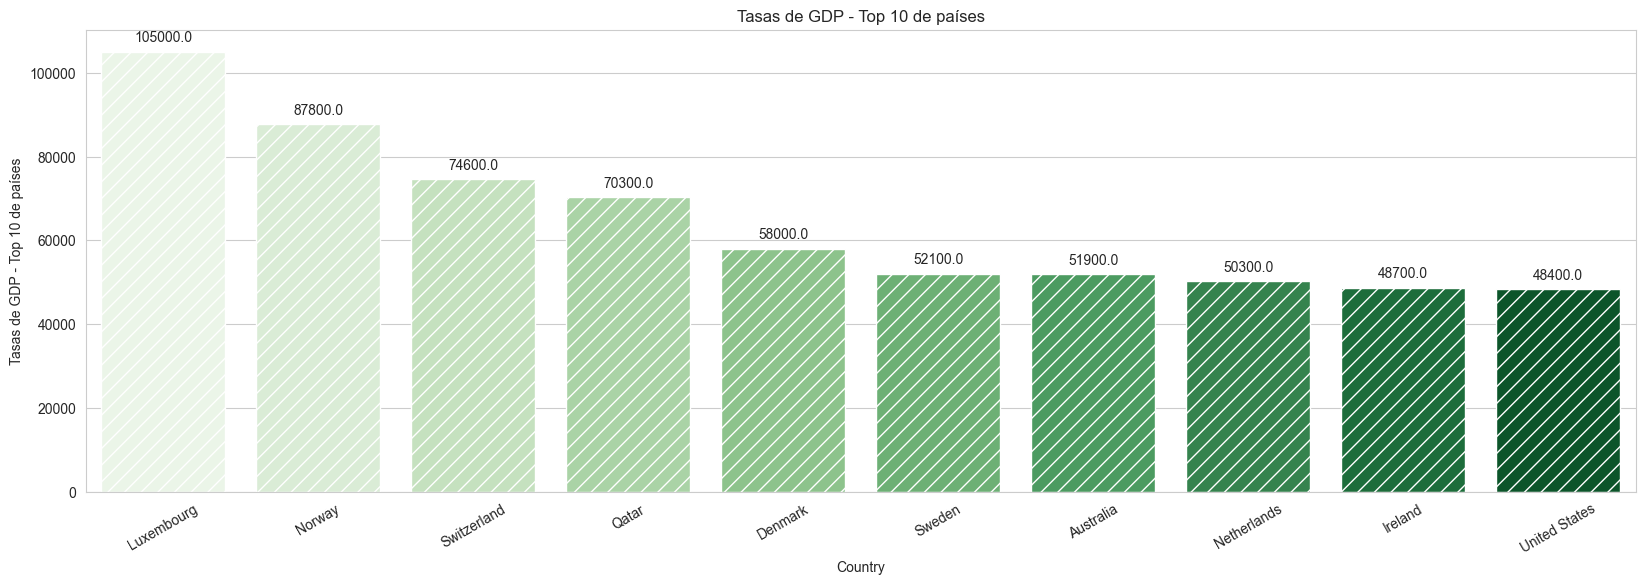

In [52]:
sorted_df = df.sort_values('gdpp')
top_10 = sorted_df.nlargest(10, 'gdpp')['country']
bottom_10 = sorted_df.nsmallest(10, 'gdpp')['country']
mask_top_bottom = df['country'].isin(list(top_10) + list(bottom_10))
bar_plot(df,mask_top_bottom,'gdpp','Tasas de GDP - Top 10 de países','Greens',top_10)

In [53]:
sorted_df.tail(10)

country  child_mort  exports  health  imports  income  inflation  \
159  United States         7.3     12.4   17.90     15.8   49400      1.220   
73         Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
110    Netherlands         4.5     72.0   11.90     63.6   45500      0.848   
7        Australia         4.8     19.8    8.73     20.9   41400      1.160   
144         Sweden         3.0     46.2    9.63     40.7   42900      0.991   
44         Denmark         4.1     50.5   11.40     43.6   44000      3.220   
123          Qatar         9.0     62.3    1.81     23.8  125000      6.980   
145    Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
114         Norway         3.2     39.7    9.48     28.5   62300      5.950   
91      Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   

     life_expec  total_fer    gdpp  
159        78.7       1.93   48400  
73         80.4       2.05   48700  
110        80.7       1.79   50300  
7          82.0       1.93   51900  
144        81.5       1.98   52100  
44         79.5       1.87   58000  
123        79.5       2.07   70300  
145        82.2       1.52   74600  
114        81.0       1.95   87800  
91         81.3       1.63  105000

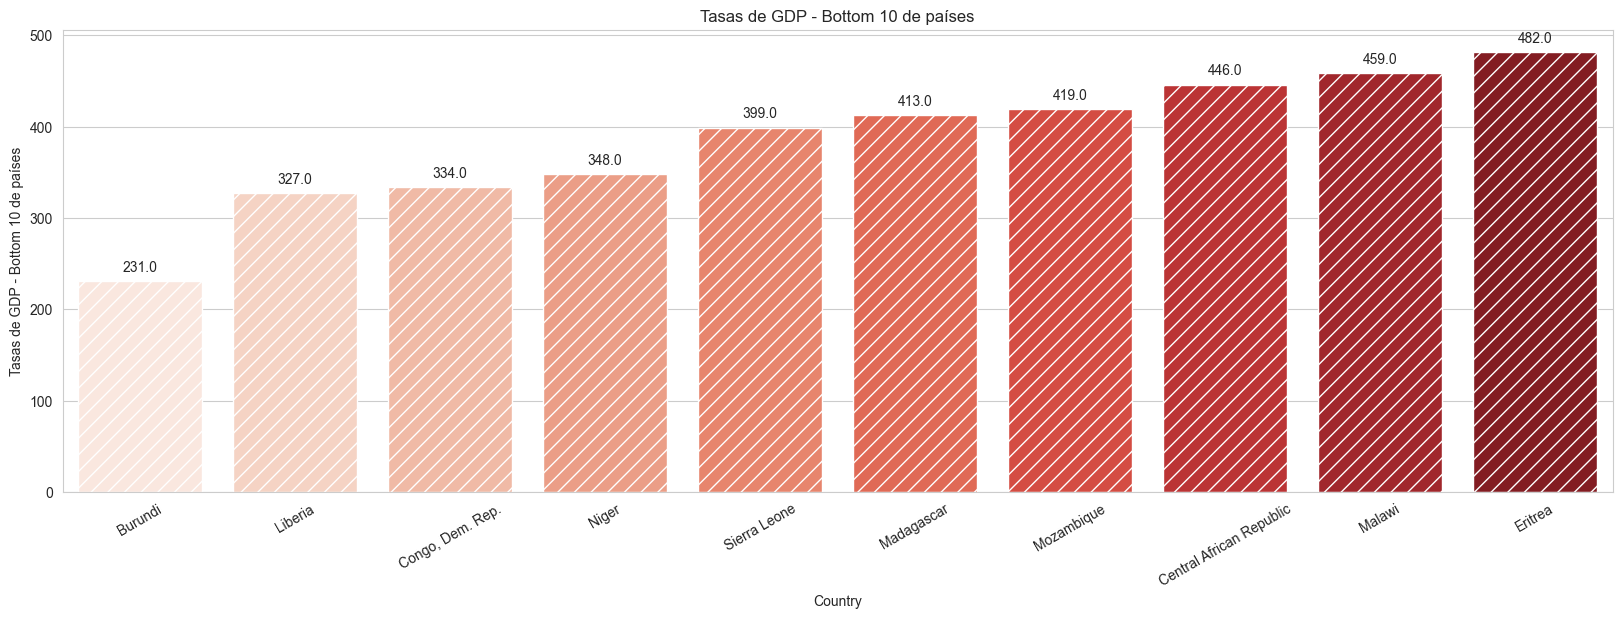

In [54]:
bar_plot(df,mask_top_bottom,'gdpp','Tasas de GDP - Bottom 10 de países','Reds',bottom_10)

In [55]:
sorted_df.head(10)

country  child_mort  exports  health  imports  income  \
26                    Burundi        93.6     8.92   11.60     39.2     764   
88                    Liberia        89.3    19.10   11.80     92.6     700   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
112                     Niger       123.0    22.20    5.16     49.1     814   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
106                Mozambique       101.0    31.50    5.21     46.2     918   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   

     inflation  life_expec  total_fer  gdpp  
26       12.30        57.7       6.26   231  
88        5.47        60.8       5.02   327  
37       20.80        57.5       6.54   334  
112       2.55        58.8       7.49   348  
132      17.20        55.0       5.20   399  
93        8.79        60.8       4.60   413  
106       7.64        54.5       5.56   419  
31        2.01        47.5       5.21   446  
94       12.10        53.1       5.31   459  
50       11.60        61.7       4.61   482

#### 4.2. Matriz de correlación
- Importante para conocer la correlación entre cada par de variables
- No resulta pertinente utilizar variables altamente correlacionadas en una tarea de
segmentación ya que el algoritmo puede exagerar las similitudes o diferencias entre observaciones. Esto puede conducir a resultados sesgados. Lo ideal es no tener en cuenta alguna de las variables (o utilizar PCA)

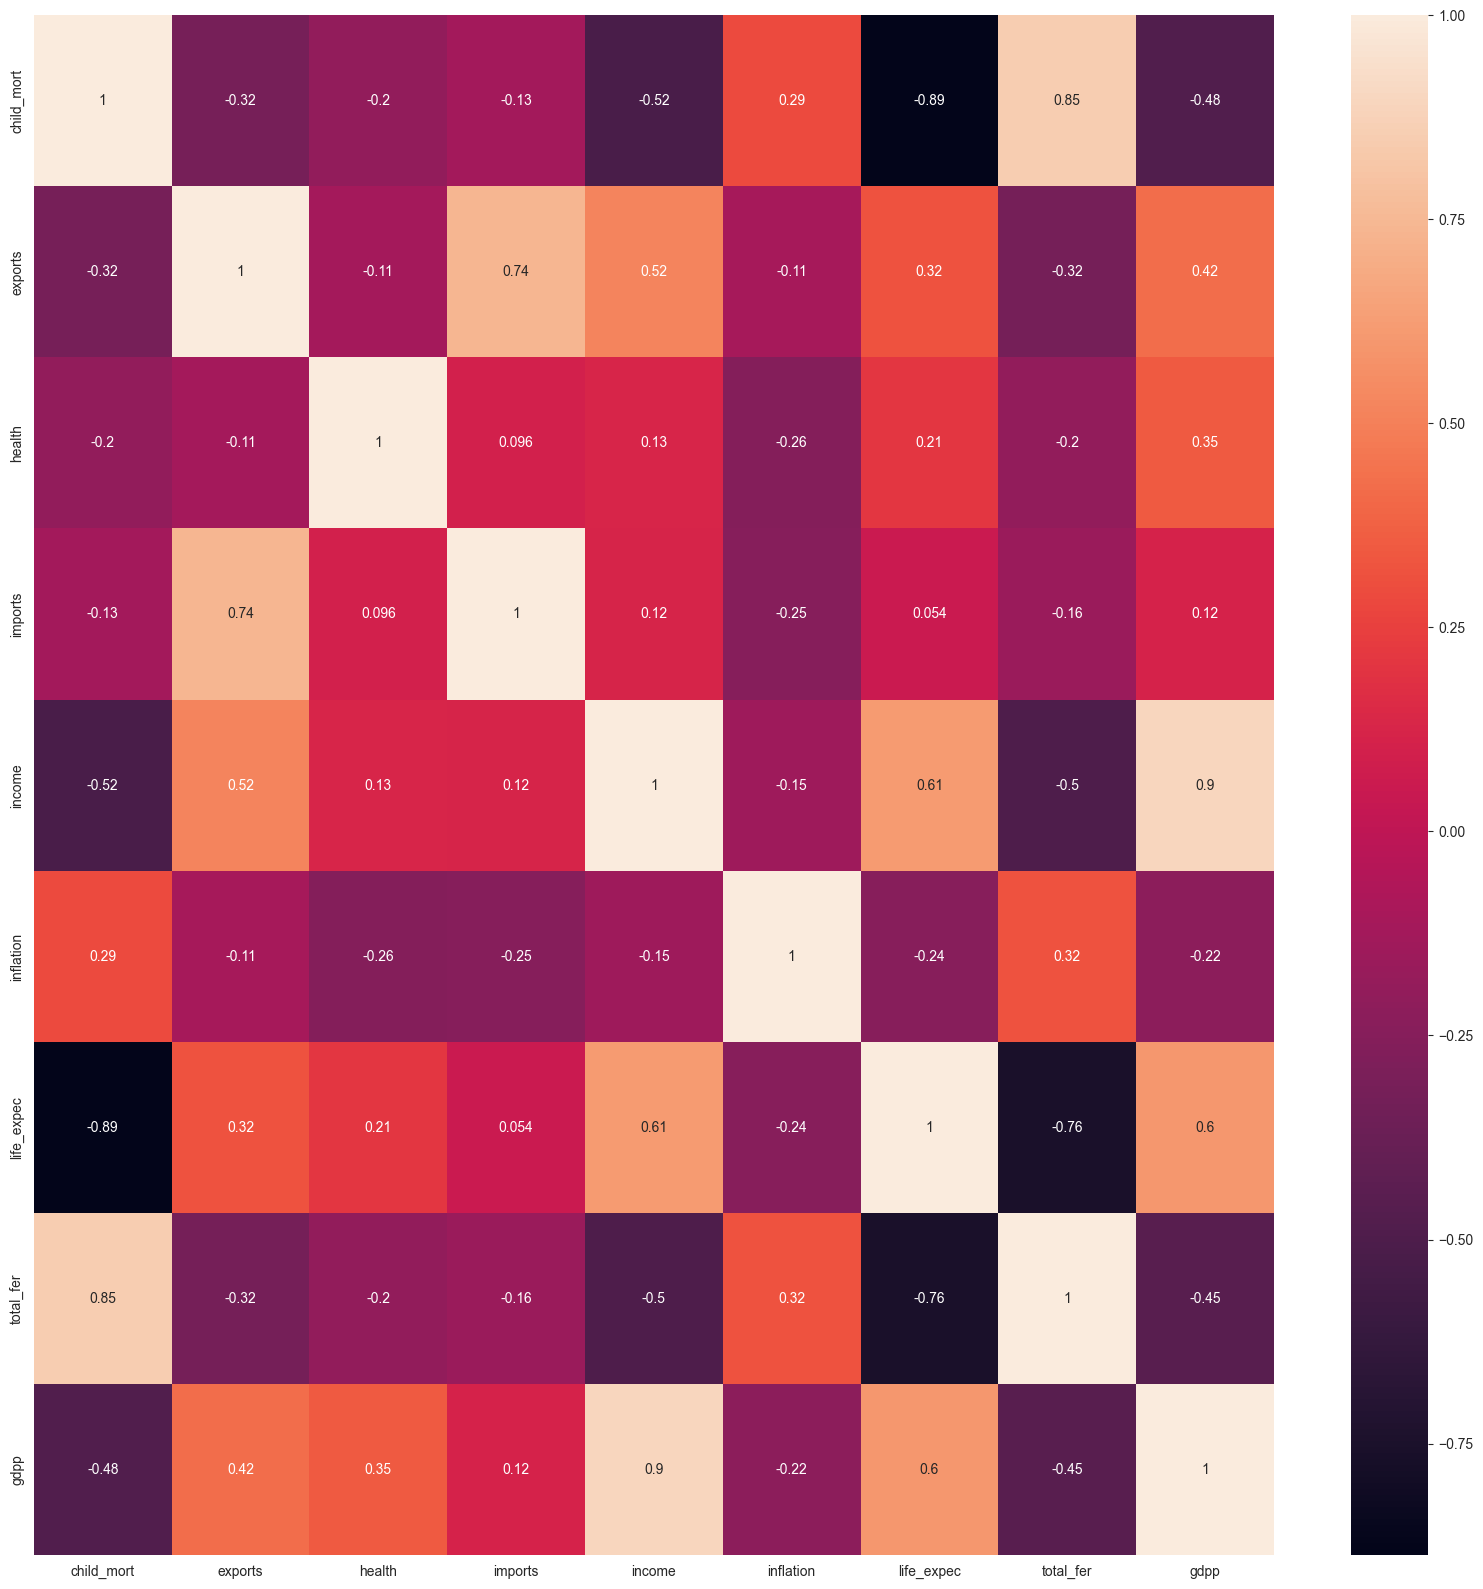

In [56]:
plt.figure(figsize = (20,20))
corr_matrix = df.drop(columns=['country']).corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

Observamos que child_mort y life_expec, child_mort y total_fer, exports e imports, income y gdpp, life_expec y total_fer se encuentran altamente correlacionados

Convertimos a país en nuestro índice y la eliminamos de nuestras columnas

In [57]:
df.set_index(keys='country', drop=True, inplace=True)
df

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0    5.89     30.9    3280      14.00   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200  
...                         ...        ...    ...  
Vanuatu                    63.0       3.50   2970  
Venezuela                  75.4       2.47  13500  
Vietnam                    73.1       1.95   1310  
Yemen                      67.5       4.67   1310  
Zambia                     52.0       5.40   1460  

[167 rows x 9 columns]

### 5. Implementación de modelos no supervisados

#### 5.1. Reducción de dimensiones (Análisis de Componentes Principales)

Creamos el objeto PCA. Entrenamos y transformamos los datos originales y los guardamos en un nuevo dataframe proyectado

In [58]:
pca = PCA(random_state=1234)
df_projected = pca.fit_transform(df)

Revisamos los componentes principales con sus cargas asociadas

In [59]:
pca.components_

array([[-8.07327698e-04,  5.11348092e-04,  2.52724061e-05,
         1.14384869e-04,  7.26746756e-01, -7.65998651e-05,
         2.13850032e-04, -2.87952778e-05,  6.86904777e-01],
       [-5.57055026e-04,  9.41707964e-04, -2.15627987e-04,
         5.41883715e-05,  6.86903991e-01,  2.85616792e-04,
         2.66353737e-05, -2.40728708e-05, -7.26747258e-01],
       [ 9.25215339e-01, -2.28627282e-01, -9.25844014e-03,
        -2.42704100e-01,  1.17358496e-03,  8.73842384e-02,
        -1.55747044e-01,  2.86462224e-02,  1.16146666e-04],
       [ 3.28783999e-01,  6.52814366e-01, -7.58649598e-03,
         6.78156522e-01, -4.12812338e-04, -2.19844970e-02,
        -7.23212922e-02,  8.16973465e-03,  2.44967157e-04],
       [-3.94786565e-02,  5.94987240e-01, -7.77516009e-02,
        -5.29179120e-01, -6.84017169e-04,  5.95872597e-01,
         5.69356462e-02,  7.02425075e-03,  3.74367532e-04],
       [-6.08330796e-02, -4.01990656e-01,  5.54312529e-02,
         4.41412073e-01,  1.95004065e-04,  7.978499

In [60]:
pca.explained_variance_

array([6.70739440e+08, 3.68465803e+07, 1.25097869e+03, 9.81348399e+02,
       1.35148254e+02, 7.34938583e+01, 1.28824224e+01, 4.23786889e+00,
       6.12008307e-01])

Miramos ahora el ratio de la varianza explicada

In [61]:
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp) 
var_exp

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

Dibujamos un diagrama de barras junto con un step plot para identificar el cambio que se presenta en la varianza explicada acumulada

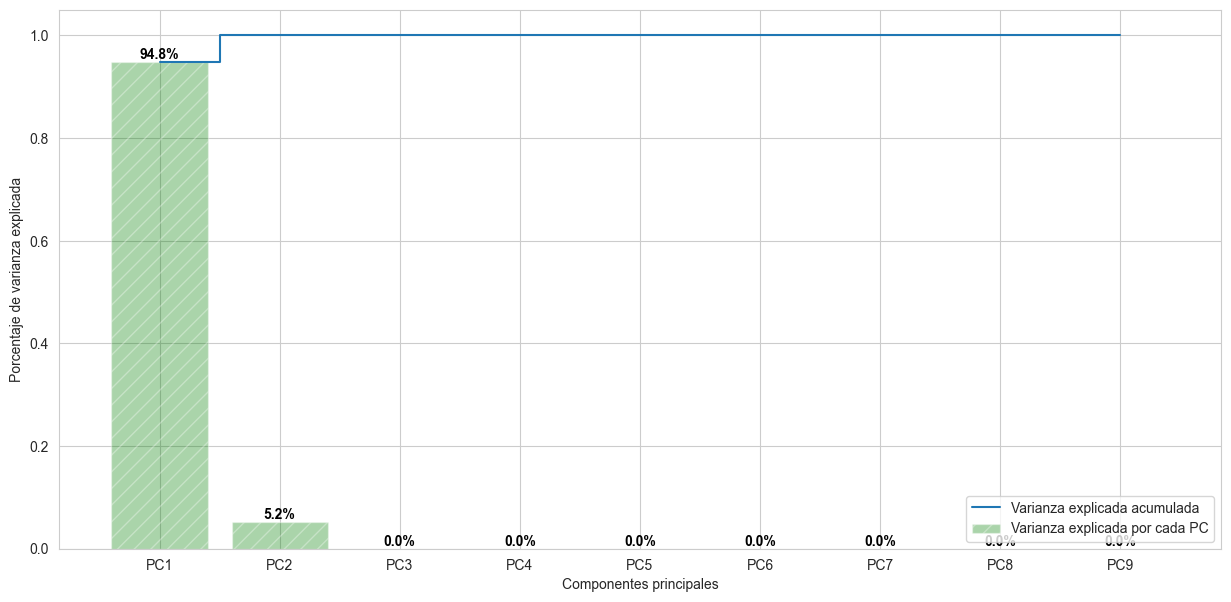

In [62]:
labels = ['PC' + str(x) for x in range(1, len(var_exp)+1)]
plt.figure(figsize=(15, 7))
bars = plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', 
         tick_label=labels, color = 'g',hatch='//')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{round(var_exp[i]*100,1)}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

Nos damos cuenta que los resultados no tienen mucho sentido. Esto se debe a que el PCA se basa en distancias, por consiguiente es necesario escalar para obtener un resultado adecuado

Usamos el estarizador

In [63]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.138280  0.279088 -0.082455 -0.808245   
Albania               -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
Algeria               -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
Angola                 2.007808  0.775381 -1.448071 -0.165315 -0.585043   
Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.157336   -1.619092   1.902882 -0.679180  
Albania              -0.312347    0.647866  -0.859973 -0.485623  
Algeria               0.789274    0.670423  -0.038404 -0.465376  
Angola                1.387054   -1.179234   2.128151 -0.516268  
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817

Volvemos a realizar nuestro PCA pero con los datos estandarizados

In [64]:
pca = PCA(random_state=1234)
df_projected = pca.fit_transform(df_scaled)

Miramos las cargas de cada PC

In [65]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

Recordamos las variables originales

In [66]:
df_scaled.columns


Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Obtenemos la varianza explicada por cada componente principal

In [67]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

Ahora el ratio de la varianza explicada

In [68]:
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp) 
var_exp

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Diagramamos de nuevo. Esto con el objetivo de identificar los componentes principales necesarios. Aquellos que en conjunto nos expliquen un porcentaje considerable de la varianza (70%-95%)

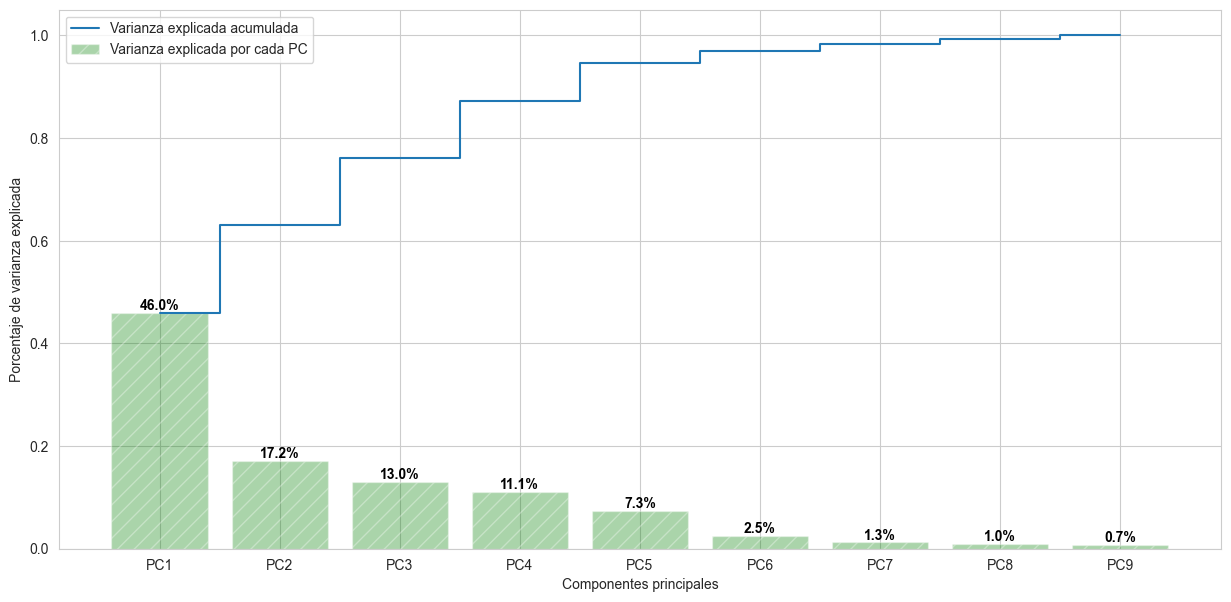

In [69]:
labels = ['PC' + str(x) for x in range(1, len(var_exp)+1)]
plt.figure(figsize=(15, 7))
bars = plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', 
         tick_label=labels, color = 'g',hatch='//')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{round(var_exp[i]*100,1)}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

In [70]:
np.sum(pca.explained_variance_ratio_[0:4])

0.8719078614023911

Encontramos que entre los primeros 4 componentes principales tenemos el 87.2% de la información


 Creamos un nuevo dataframe con los componentes principales obtenidos y sus cargas

In [71]:
pcs = pd.DataFrame(pca.components_,columns=df_scaled.columns,index=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])

Buscamos caracterizar los primeros cuatro compoenentes principales. A partir del valor absoluto de sus cargas obtenemos los elementos que mayor valor dan al PC

In [72]:
pcs = pcs.apply(lambda x: abs(x))
pcs[0:4]

child_mort   exports    health   imports    income  inflation  \
pc1    0.419519  0.283897  0.150838  0.161482  0.398441   0.193173   
pc2    0.192884  0.613163  0.243087  0.671821  0.022536   0.008404   
pc3    0.029544  0.144761  0.596632  0.299927  0.301548   0.642520   
pc4    0.370653  0.003091  0.461897  0.071907  0.392159   0.150442   

     life_expec  total_fer      gdpp  
pc1    0.425839   0.403729  0.392645  
pc2    0.222707   0.155233  0.046022  
pc3    0.113919   0.019549  0.122977  
pc4    0.203797   0.378304  0.531995

In [73]:
pcs.loc['pc1'].sort_values(ascending=False)

life_expec    0.425839
child_mort    0.419519
total_fer     0.403729
income        0.398441
gdpp          0.392645
exports       0.283897
inflation     0.193173
imports       0.161482
health        0.150838
Name: pc1, dtype: float64

PC1: esperanza de vida, mortalidad infantil, fertilidad: lifespan 

In [74]:
pcs.loc['pc2'].sort_values(ascending=False)

imports       0.671821
exports       0.613163
health        0.243087
life_expec    0.222707
child_mort    0.192884
total_fer     0.155233
gdpp          0.046022
income        0.022536
inflation     0.008404
Name: pc2, dtype: float64

PC2: importaciones, exportaciones: commerce

In [75]:
pcs.loc['pc3'].sort_values(ascending=False)

inflation     0.642520
health        0.596632
income        0.301548
imports       0.299927
exports       0.144761
gdpp          0.122977
life_expec    0.113919
child_mort    0.029544
total_fer     0.019549
Name: pc3, dtype: float64

PC3: inflación, salud: lifeQuality

In [76]:
pcs.loc['pc4'].sort_values(ascending=False)

gdpp          0.531995
health        0.461897
income        0.392159
total_fer     0.378304
child_mort    0.370653
life_expec    0.203797
inflation     0.150442
imports       0.071907
exports       0.003091
Name: pc4, dtype: float64

PC4: gdpp, salud, ingresos: productivity 

Vamos a ver los puntos en el nuevo sistema de representación dado por los componentes principales.
- Creamos una función que permite plotear tanto los puntos de los datos como los loadings de las variables originales 
- Para entender mejor la relación entre componentes principales y variables originales.

In [77]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1+1))
    plt.ylabel("PC{}".format(index2+1))
    plt.grid() 

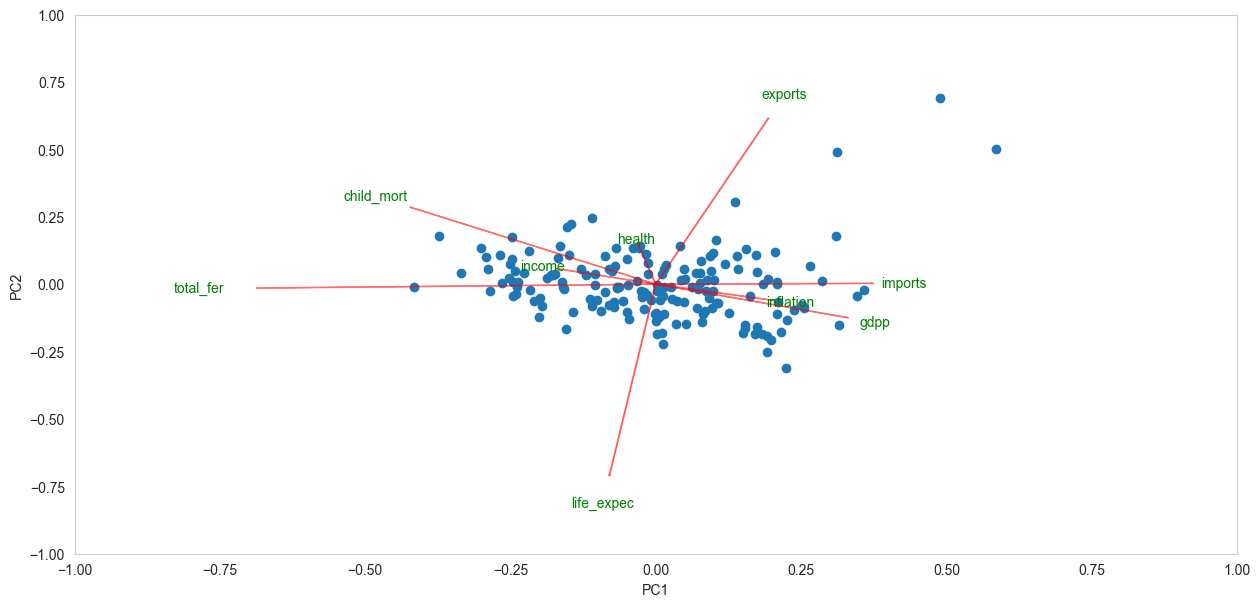

In [78]:
biplot(df_projected, pca.components_, 0, 1, df.columns)

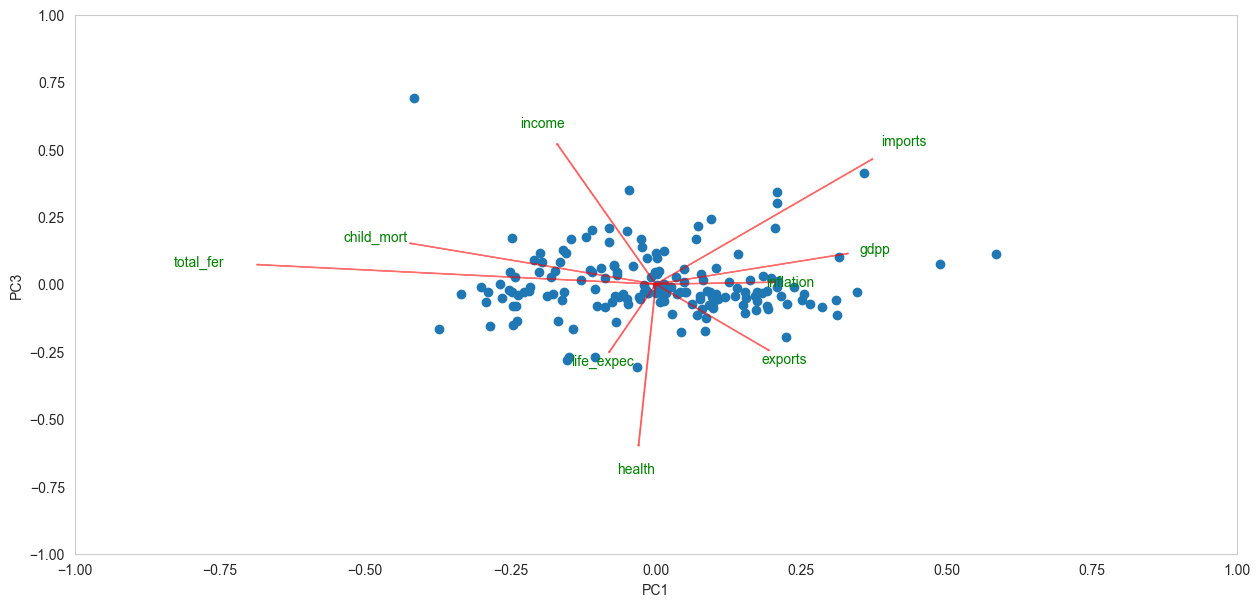

In [79]:
biplot(df_projected, pca.components_, 0, 2, df.columns)

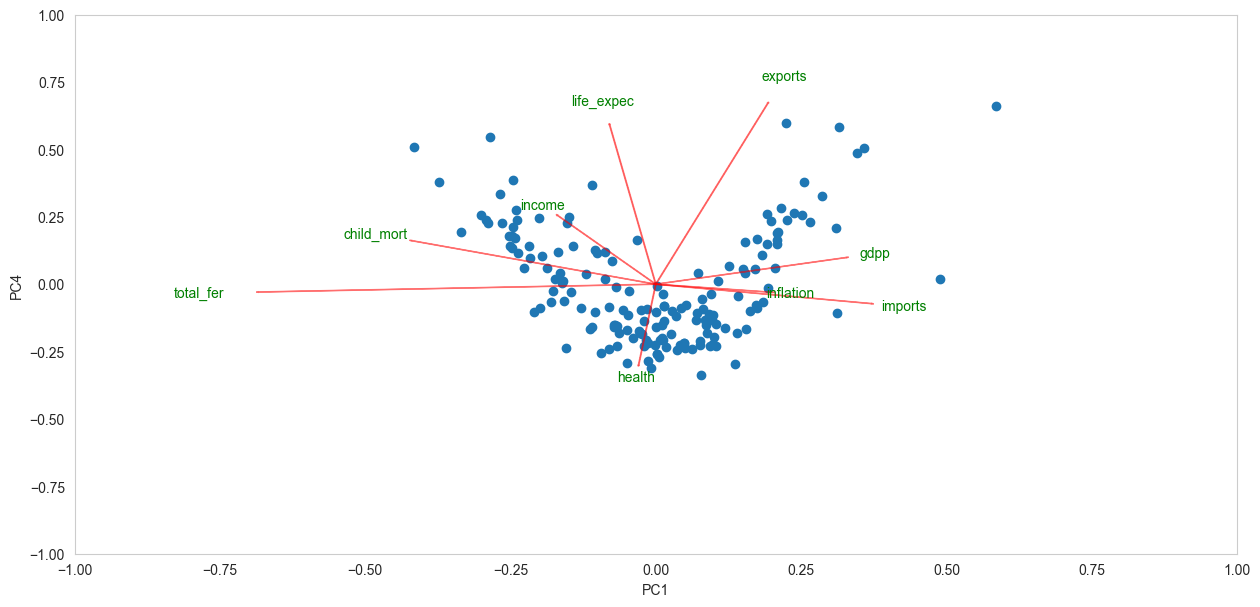

In [80]:
biplot(df_projected, pca.components_, 0, 3, df.columns)

In [81]:
pca = PCA(n_components=4,random_state=1234)
pca_ = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_, columns=['LifeSpan','Commerce','LifeQuality','Productivity'],index=df.index)
print('\nFinal PCA:')



Final PCA:


#### 5.2. Modelo de k means

Establecemos nuestros parámetros para nuestro modelo de K means

In [85]:
kmeans_params = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 1,
                 "tol": 1e-4, "algorithm": "lloyd", "verbose": 0}

### Evaluación del k

Obtenemos los valores de inercia para cada modelo con diferente k, de tal manera que podamos ver que tan bien k means segmenta el conjunto de datos (inercia = WSS)

In [86]:
inertia_values = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, **kmeans_params)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

Función para encontrar el mejor valor de k utilizando el método del codo

In [87]:
def elbow_optimizer(inertia_values, name):
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(2,11), y=inertia_values, color='blue', linewidth=3)
    plt.xticks(range(2,11))
    plt.xlabel("Number of Clusters", labelpad=20, fontsize=12)
    plt.ylabel("Inertia", labelpad=20, fontsize=12)
    plt.title(f"Elbow Method for {name}", y=1.09, fontsize=14)
    plt.axvline(x=3, color= 'grey', label='Elbow', ls='--', linewidth=3)
    plt.legend()
    plt.tight_layout()
    plt.show()

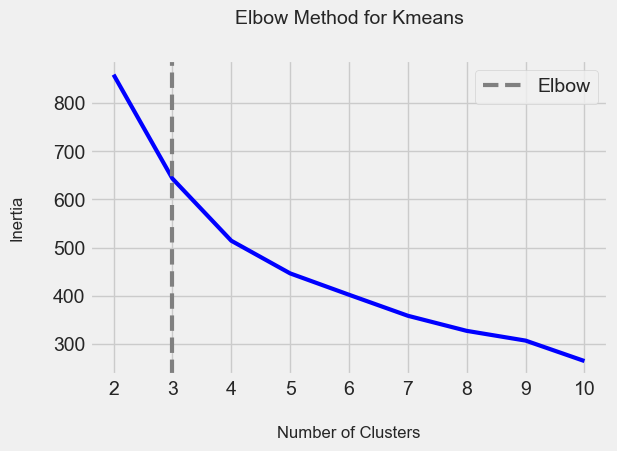

In [88]:
elbow_optimizer(inertia_values, 'Kmeans')

De acuerdo con el método del codo el k = 3

Hacemos uso de otros dos heurísticos que nos orienten con respecto a la elección del k

El coeficiente de la silueta es una medida de que tan similar es un observación a su propio cluster (cohesión) en comparación con otros clusters (separación).

El índice de Calinski-Harabasz se conoce como el criterio del ratio de varianza y se define como el ratio de la suma de la dispersión entre clusters y la dispersión dentro del cluster.

In [89]:
silhouette_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_coef.append(score)

calinski_harabasz_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(pca_df)
    score = calinski_harabasz_score(pca_df, kmeans.labels_)
    calinski_harabasz_coef.append(score)

Se ubican los resultados en un dataframe y se obtiene el mejor k utilizando ambos métodos

In [90]:
scores_kmeans = pd.DataFrame({'k': range(2,11),'Silhouette Score': silhouette_coef,
                              'Calinski-Harabasz Score': calinski_harabasz_coef})

best_k_silhouette = scores_kmeans.loc[scores_kmeans['Silhouette Score'].idxmax(), 'k']
best_k_calinski_harabaz = scores_kmeans.loc[scores_kmeans['Calinski-Harabasz Score'].idxmax(), 'k']

Se presentan los resultados

In [91]:
scores_kmeans.style.background_gradient(cmap='Blues')

Función para diagramar el comportamiento del modelo a partir de diferentes k y usando los dos métodos


In [92]:
def plot_evaluation(sh_score, ch_score, name, x=range(2,11)):
    fig, ax = plt.subplots(1,2,figsize=(15,7), dpi=100)
    ax[0].plot(x, sh_score, color='blue', marker='o', ms=9, mfc='Gray')
    ax[1].plot(x, ch_score, color='red', marker='o', ms=9, mfc='Gray')
    ax[0].set_xlabel("Número de clusters", labelpad=20)
    ax[0].set_ylabel("Coeficiente de silueta", labelpad=20)
    ax[1].set_xlabel("Número de clusters", labelpad=20)
    ax[1].set_ylabel("Coeficiente de Calinski-Harabasz ", labelpad=20)
    plt.suptitle(f'Evaluación de clustering de {name}',y=0.9)
    plt.tight_layout(pad=3)
    plt.show()

Se presentan los resultados

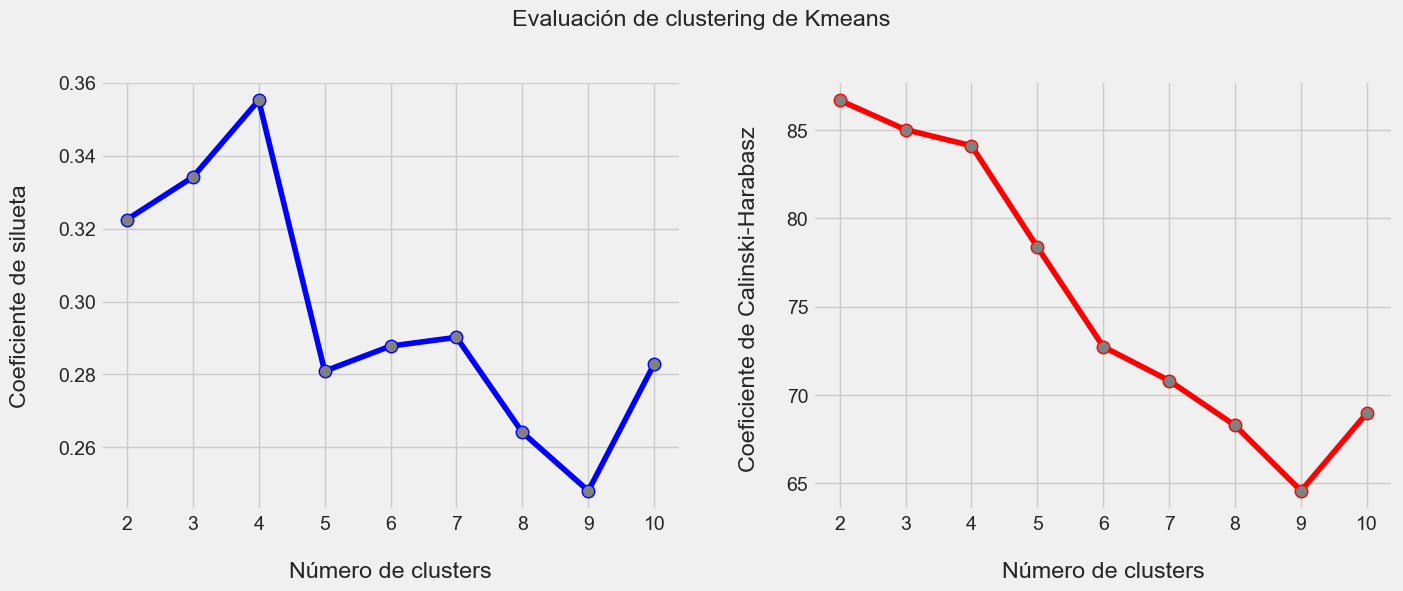

In [93]:
plot_evaluation(silhouette_coef, calinski_harabasz_coef, 'Kmeans')

Los mejores k de acuerdo a los dos métodos

In [94]:
print(f"Mejor k para el coficiente de la silueta: {best_k_silhouette}")
print(f"Mejor k para el coeficiente de Calinski-Harabasz: {best_k_calinski_harabaz}")

Mejor k para el coficiente de la silueta: 4
Mejor k para el coeficiente de Calinski-Harabasz: 2


Función para obtener resultados híbridos entre la silueta y Calinski-Harabasz

In [95]:
def select_k(pca_df):
    silhouette_scores = []
    calinski_scores = []
    k_values = range(2, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, **kmeans_params)
        labels = kmeans.fit_predict(pca_df)
        silhouette_scores.append(silhouette_score(pca_df, labels))
        calinski_scores.append(calinski_harabasz_score(pca_df, labels))
    hybrid_scores = np.sqrt(np.multiply(silhouette_scores, calinski_scores))
    best_k = k_values[np.argmax(hybrid_scores)]
    return best_k

Mejor k

In [96]:
best_k = select_k(pca_df)
print("\nMejor valor de k:", best_k)


Mejor valor de k: 4


Utilizamos una función para verificar que tan adecuados son nuestros clusters utilizando el método de la silueta

In [97]:
def silhouette_plot(k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(pca_df)
    y_clusters = kmeans.labels_
    cluster_labels = np.unique(y_clusters)
    silueta_puntos= silhouette_samples(pca_df, y_clusters, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    colores = ['r', 'g', 'b', 'y', 'gray']
    for i, c in enumerate(cluster_labels):
        silueta_puntos_c = silueta_puntos[y_clusters == c]
        silueta_puntos_c.sort()
        y_ax_upper += len(silueta_puntos_c)
        color = colores[i]
        plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(silueta_puntos_c)
        silueta_promedio = np.mean(silueta_puntos)
    plt.axvline(silueta_promedio, color="black", linestyle="--") 
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Coeficiente de silueta')
    plt.tight_layout()
    plt.show()

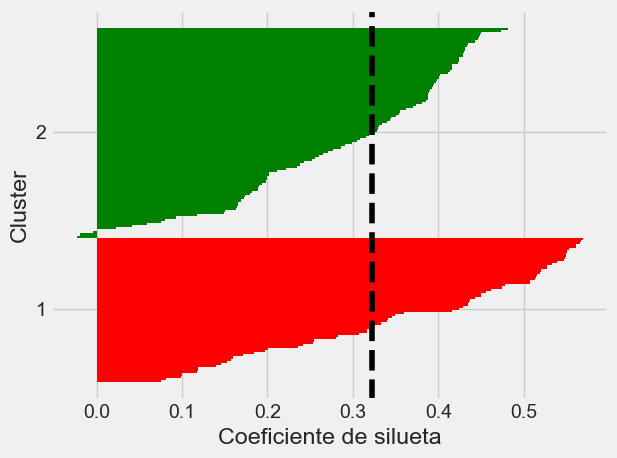

In [98]:
silhouette_plot(2)

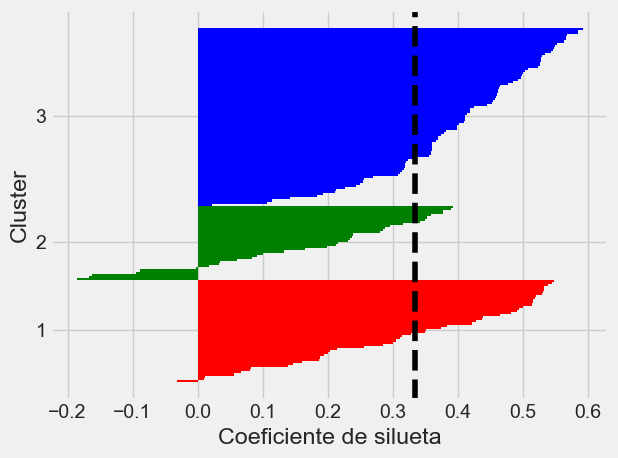

In [99]:
silhouette_plot(3)

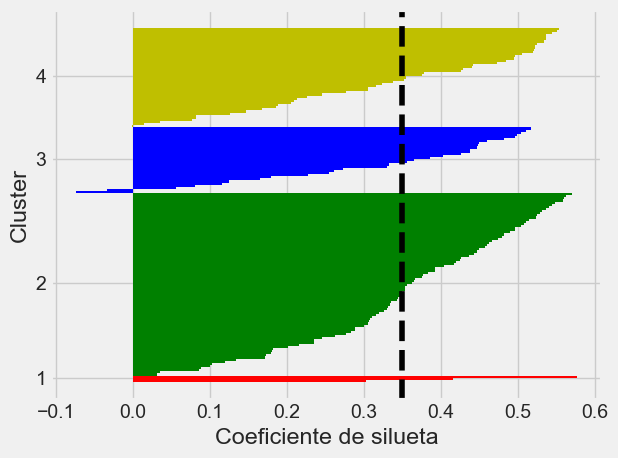

In [100]:
silhouette_plot(4)

A partir de los heurísticos y teniendo en cuenta que resulta preferible segmentar países en más de dos grupos, se elige k = 3 por encima de k = 4 ya que la densidad del primer cluster es considerablemente inferior a los de los demás

In [101]:
kmeans = KMeans(n_clusters=3, **kmeans_params)
kmeans.fit(pca_df)

KMeans(init='random', n_clusters=3, n_init=10, random_state=1)

Iteraciones para llegar a la convergencia y centroides finales


In [102]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 8 iteraciones llegar a convergencia, con un WSS final de: 643.3530304947255 y los centroides siguientes: [[-2.40069473  0.42986347 -0.11977208  0.67641687]
 [ 0.20467292 -0.14766396  0.05071918 -0.76047534]
 [ 2.80116634 -0.23513355  0.04253283  0.8974834 ]]


Obtenemos un daframe a partir de los datos proyectados y asignándoles su respectivo cluster

In [103]:
df_clustering = pca_df.copy()
df_clustering['Cluster'] = kmeans.labels_
df_clustering

LifeSpan  Commerce  LifeQuality  Productivity  Cluster
country                                                                    
Afghanistan         -2.913025  0.095621    -0.718118      1.005255        0
Albania              0.429911 -0.588156    -0.333486     -1.161059        1
Algeria             -0.285225 -0.455174     1.221505     -0.868115        1
Angola              -2.932423  1.695555     1.525044      0.839625        0
Antigua and Barbuda  1.033576  0.136659    -0.225721     -0.847063        1
...                       ...       ...          ...           ...      ...
Vanuatu             -0.820631  0.639570    -0.389923     -0.706595        1
Venezuela           -0.551036 -1.233886     3.101350     -0.115311        1
Vietnam              0.498524  1.390744    -0.238526     -1.074098        1
Yemen               -1.887451 -0.109453     1.109752      0.056257        0
Zambia              -2.864064  0.485998     0.223167      0.816364        0

[167 rows x 5 columns]

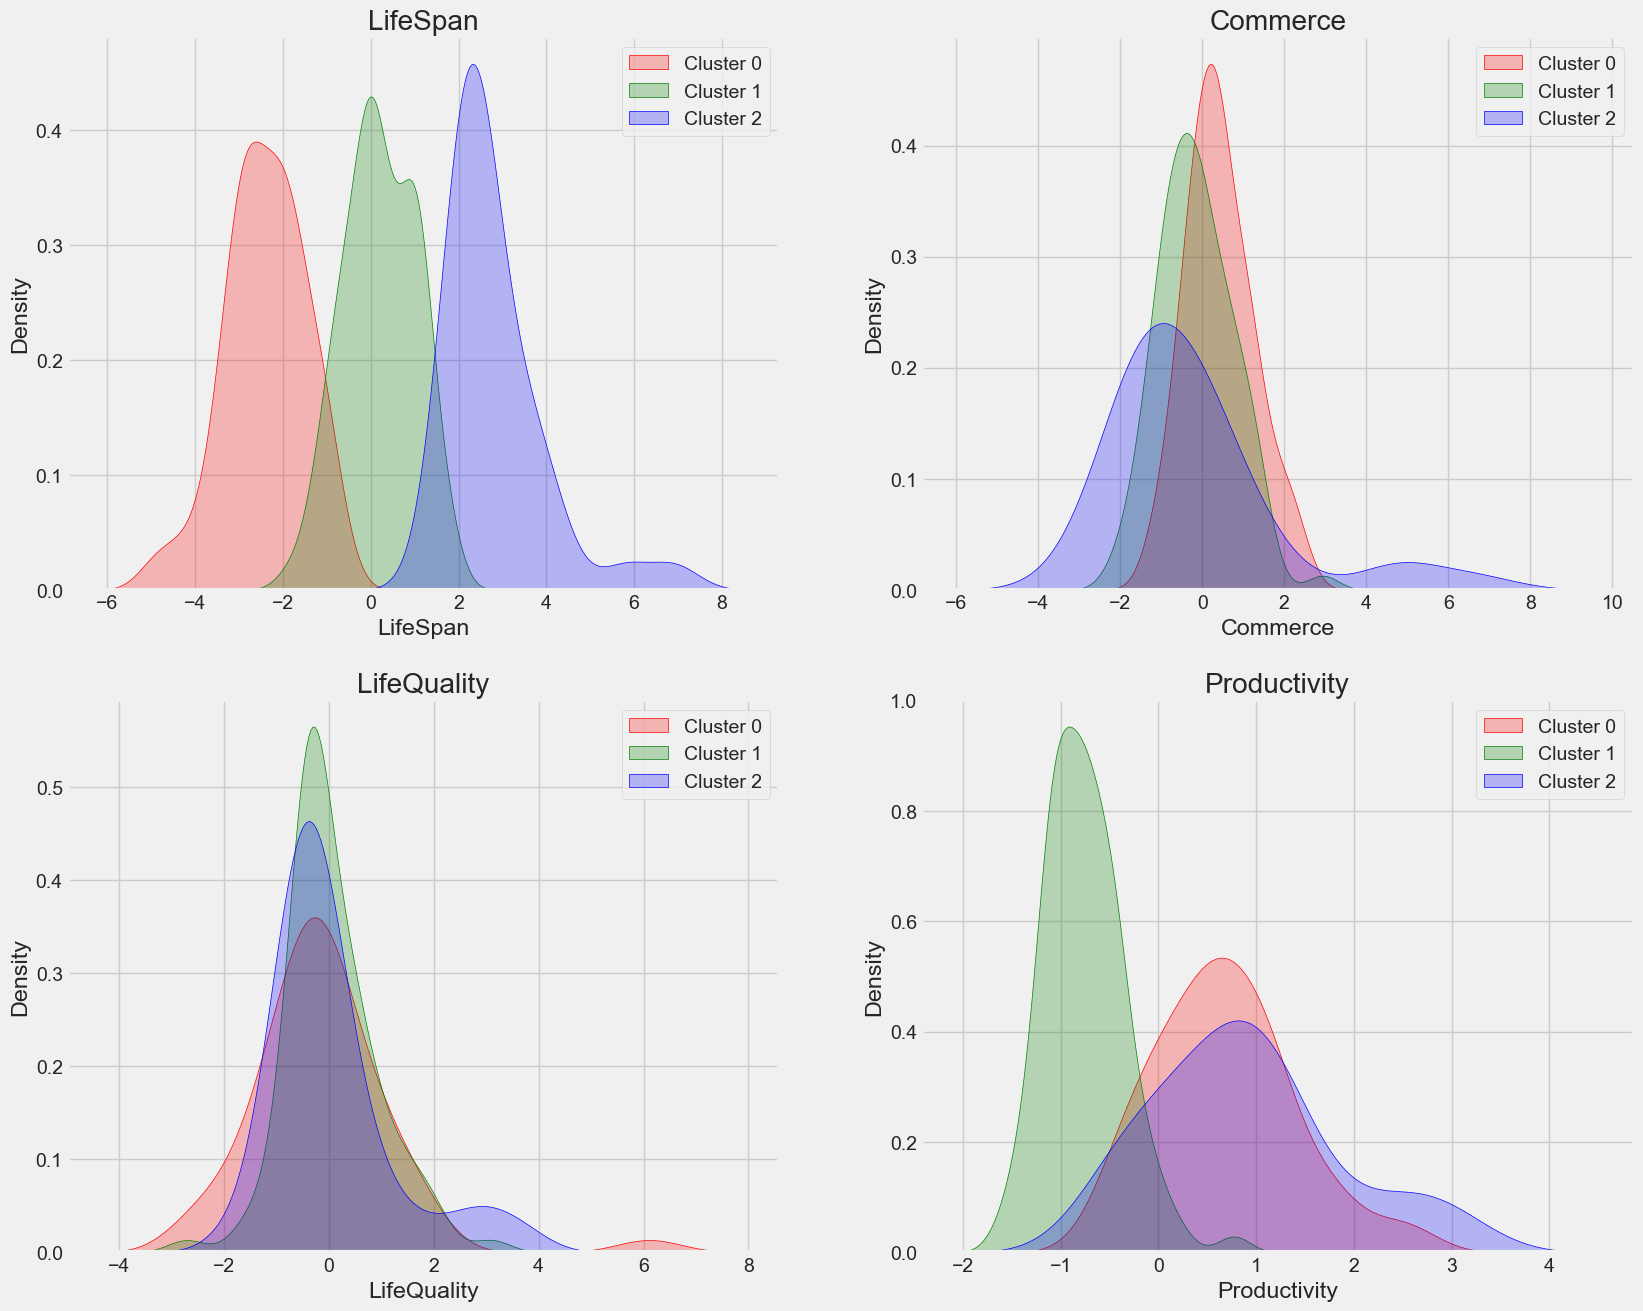

In [104]:
import math
var_num = ['LifeSpan','Commerce','LifeQuality','Productivity']
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(df_clustering.loc[df_clustering.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(df_clustering.loc[df_clustering.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(df_clustering.loc[df_clustering.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Caracterización de clusters
- Cluster 0: lifeSpan bajo, comercio medio alto, en general calidad de vida media, productividad media-alta
- Cluster 1: lifespan medio, comercio medio, calidad de vida media, productividad media, calidad de vida media
- Cluster 2: lifespan alto, comercio medio-bajo, calidad de vida media, productividad media-alta


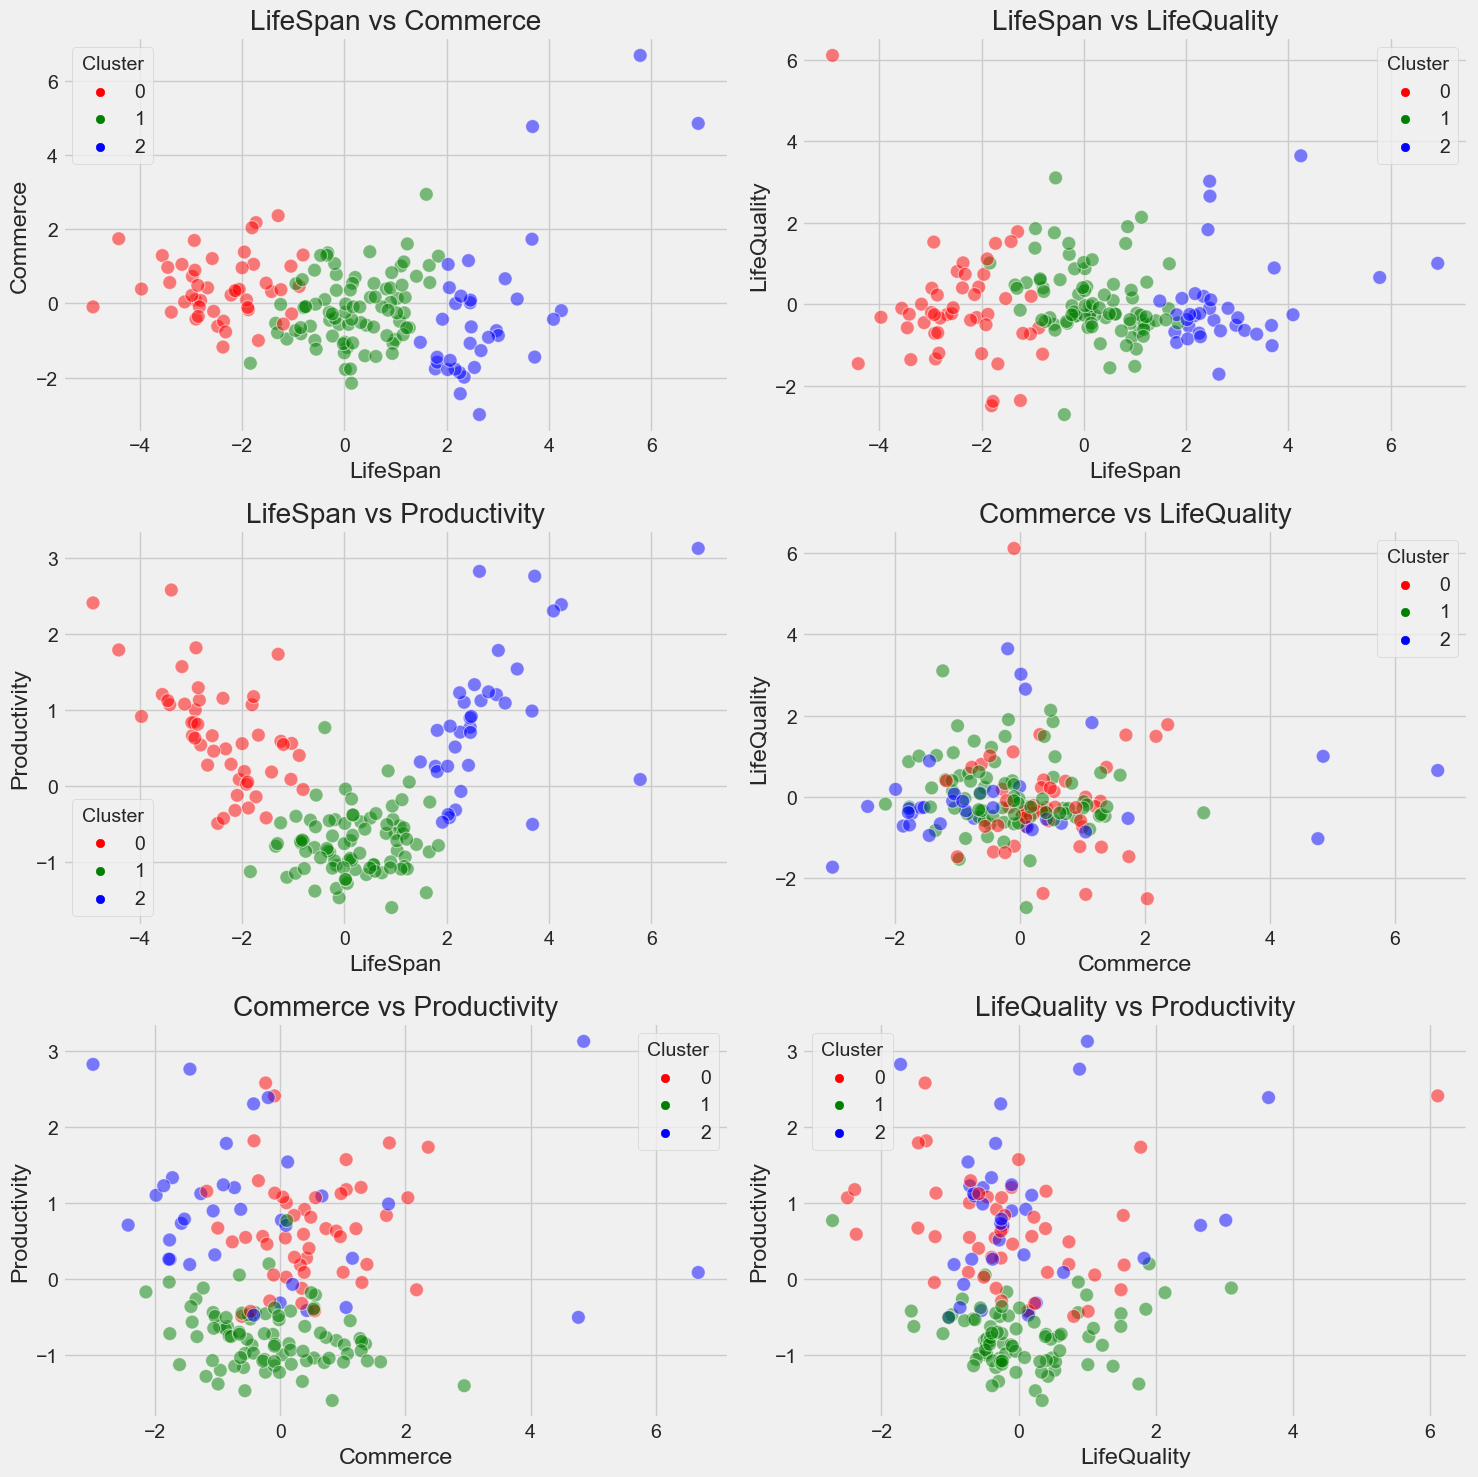

In [105]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b",'y']
ax = fig.add_subplot(3, 2, 1)
sns.scatterplot(x='LifeSpan', y='Commerce', hue="Cluster", data=df_clustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeSpan vs Commerce")
ax = fig.add_subplot(3, 2, 2)
sns.scatterplot(x='LifeSpan', y="LifeQuality", hue="Cluster", data=df_clustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeSpan vs LifeQuality")
ax = fig.add_subplot(3, 2, 3)
sns.scatterplot(x='LifeSpan', y="Productivity", hue="Cluster", data=df_clustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeSpan vs Productivity")
ax = fig.add_subplot(3, 2, 4)
sns.scatterplot(x='Commerce', y="LifeQuality", hue="Cluster", data=df_clustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Commerce vs LifeQuality")
ax = fig.add_subplot(3, 2, 5)
sns.scatterplot(x='Commerce', y="Productivity", hue="Cluster", data=df_clustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Commerce vs Productivity")
ax = fig.add_subplot(3, 2, 6)
sns.scatterplot(x='LifeQuality', y="Productivity", hue="Cluster", data=df_clustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeQuality vs Productivity")
fig.tight_layout()
plt.show()

In [106]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
clusters = [0,1,2]

var_names = ['LifeSpan','Commerce','LifeQuality','Productivity']

def polar_scatter_plot(df, var_names, clusters):
    for i in clusters:
        data = df[df["Cluster"] == i]
        data = [go.Scatterpolar(
            r=[data[var_name].values[0] for var_name in var_names],
            theta=var_names,
            fill='toself',
            line=dict(color=colors[i % len(colors)], width=2),
            marker=dict(color=colors[i % len(colors)], size=10))]
        layout = go.Layout(
            polar=dict(
            radialaxis=dict(
                visible=True,
            )
        ),
        showlegend=False,
        title=f"{i}"
        )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)

In [107]:
polar_scatter_plot(df_clustering, var_names, clusters)

In [108]:
var_names = ['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer']
df_scaled_c = df_scaled
df_scaled_c['Cluster'] = kmeans.labels_
polar_scatter_plot(df_scaled_c, var_names, clusters)


- Cluster 0: países menos desarrollados (less_developed):
    - Inflación alta
    - Esperanza de vida muy baja
    - Mortalidad infantil alta
    - Fertilidad alta
    - Salud media
    - Promedio importaciones y exportacions (necesidad de comercio)
- Cluster 1: países en vía de desarrollo (developing)
    - Inflación baja
    - Esperanza de vida alta
    - Mortalidad infantil baja
    - Fertilidad baja
    - Promedio en importaciones que exportaciones (necesidad de comercio)
    - Salud media-alta
- Cluster 2: países desarrollados (developed)
    - Inflación muy baja
    - Pocas importaciones y exportaciones
    - Salud alta
    - Esperanza de vida muy alta
    - Mortalidad infantil muy baja
    - Fertilidad baja


In [109]:
df1 = df_clustering.reset_index()
fig = px.scatter_geo(df1, locations='country', locationmode='country names', color='Cluster',
                     color_discrete_map={
        'Cluster 0': 'b',
        'Cluster 1': 'm', 
        'Cluster 2': 'o', 
    },
                         height=700, projection='orthographic', title=f"Países por cluster")
fig.show()

 Tamaño de los clusters encontrados por k means

In [110]:
kmeans_clusters_size = df_clustering.groupby('Cluster').size().to_frame()
kmeans_clusters_size.columns = ['Size']
kmeans_clusters_size

Size
Cluster      
0          48
1          84
2          35

Se crea un dataframe con la información de los clusters encontrados con k means

In [111]:
kmeans_clusters_df = df_clustering.copy()

for col in df_scaled.columns:
    kmeans_clusters_df[col] = df_scaled[col]
kmeans_clusters_df.reset_index(inplace=True)
kmeans_clusters_df.loc[kmeans_clusters_df['Cluster'] == 0, 'Cluster'] = 'less_developed'
kmeans_clusters_df.loc[kmeans_clusters_df['Cluster'] == 1, 'Cluster'] = 'developing'
kmeans_clusters_df.loc[kmeans_clusters_df['Cluster'] == 2, 'Cluster'] = 'developed'
kmeans_clusters_df

country  LifeSpan  Commerce  LifeQuality  Productivity  \
0            Afghanistan -2.913025  0.095621    -0.718118      1.005255   
1                Albania  0.429911 -0.588156    -0.333486     -1.161059   
2                Algeria -0.285225 -0.455174     1.221505     -0.868115   
3                 Angola -2.932423  1.695555     1.525044      0.839625   
4    Antigua and Barbuda  1.033576  0.136659    -0.225721     -0.847063   
..                   ...       ...       ...          ...           ...   
162              Vanuatu -0.820631  0.639570    -0.389923     -0.706595   
163            Venezuela -0.551036 -1.233886     3.101350     -0.115311   
164              Vietnam  0.498524  1.390744    -0.238526     -1.074098   
165                Yemen -1.887451 -0.109453     1.109752      0.056257   
166               Zambia -2.864064  0.485998     0.223167      0.816364   

            Cluster  child_mort   exports    health   imports    income  \
0    less_developed    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1        developing   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2        developing   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3    less_developed    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4        developing   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..              ...         ...       ...       ...       ...       ...   
162      developing   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163      developing   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164      developing   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165  less_developed    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166  less_developed    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  
0     0.157336   -1.619092   1.902882 -0.679180  
1    -0.312347    0.647866  -0.859973 -0.485623  
2     0.789274    0.670423  -0.038404 -0.465376  
3     1.387054   -1.179234   2.128151 -0.516268  
4    -0.601749    0.704258  -0.541946 -0.041817  
..         ...         ...        ...       ...  
162  -0.489784   -0.852161   0.365754 -0.546913  
163   3.616865    0.546361  -0.316678  0.029323  
164   0.409732    0.286958  -0.661206 -0.637754  
165   1.500916   -0.344633   1.140944 -0.637754  
166   0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 15 columns]

In [112]:
world_help_clusters = px.choropleth(
    data_frame=kmeans_clusters_df,
    locations='country', 
    locationmode='country names', 
    color='Cluster',
    color_discrete_map={
        'Prosperous': 'Blue',
        'Trade-dependent': 'Green', 
        'Not-developed': 'Red', 
        'Developing': 'Yellow'
    }, 
    title='Clusters',
    labels={'Cluster': 'Etiquetas'}
)

world_help_clusters.update_geos(
    fitbounds="locations",
    projection=dict(type='natural earth')
)
world_help_clusters.update_layout(
    legend_title_text='Etiquetas', 
    legend_title_side='top', 
    title_pad_l=260, 
    title_y=0.86
)

Cluster less_developed
- Países menos desarrollados, la gran mayoría provenientes de África

In [113]:
kmeans_clusters_df[kmeans_clusters_df['Cluster'] == 'less_developed'][:30]

country  LifeSpan  Commerce  LifeQuality  Productivity  \
0                Afghanistan -2.913025  0.095621    -0.718118      1.005255   
3                     Angola -2.932423  1.695555     1.525044      0.839625   
17                     Benin -2.672314  0.418172    -0.257368      0.278672   
21                  Botswana -0.882088  0.457368    -0.584633      0.406161   
25              Burkina Faso -3.122053  0.038775    -0.455751      1.080918   
26                   Burundi -2.898971 -0.422663    -1.347413      1.821474   
28                  Cameroon -2.807909  0.078649    -0.342961      0.543557   
31  Central African Republic -3.964964  0.386619    -0.323557      0.918301   
32                      Chad -3.557555  1.289128    -0.103015      1.208406   
36                   Comoros -2.093556  0.343601    -0.328381     -0.118947   
37          Congo, Dem. Rep. -3.173370  1.050382    -0.001219      1.574210   
38               Congo, Rep. -1.725676  2.176349     1.492719     -0.138593   
40             Cote d'Ivoire -2.581706  1.207873    -0.233066      0.665293   
49         Equatorial Guinea -1.293423  2.363695     1.779334      1.737244   
50                   Eritrea -2.474696 -0.618025     0.803497     -0.488256   
55                     Gabon -1.421715  0.319723     1.537533      0.187759   
56                    Gambia -2.213670  0.223496    -0.393111      0.289914   
59                     Ghana -2.054167  0.380034     0.419654      0.090971   
63                    Guinea -2.969529  0.728534     0.391039      0.666549   
64             Guinea-Bissau -2.833616 -0.091128    -1.205174      1.133045   
66                     Haiti -4.409717  1.742230    -1.462809      1.793592   
72                      Iraq -1.029228 -0.283269     0.192227      0.564141   
80                     Kenya -1.874702 -0.171030    -0.249557     -0.285555   
81                  Kiribati -1.239217  0.369138    -2.368274      0.592231   
84                       Lao -1.527770  0.545787     0.137159     -0.415582   
87                   Lesotho -1.803151  2.037851    -2.496885      1.072199   
88                   Liberia -1.773580  1.053399    -2.390440      1.179569   
93                Madagascar -2.136009  0.342733     0.234842     -0.317469   
94                    Malawi -2.979885  0.216622    -0.204596      0.839108   
97                      Mali -3.412255  0.561469    -0.248615      1.073364   

           Cluster  child_mort   exports    health   imports    income  \
0   less_developed    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
3   less_developed    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
17  less_developed    1.808842 -0.633337 -0.991634 -0.401467 -0.797319   
21  less_developed    0.353908  0.091147  0.541996  0.182698 -0.200033   
25  less_developed    1.933196 -0.801651 -0.027638 -0.716337 -0.817611   
26  less_developed    1.376093 -1.177797  1.746991 -0.318607 -0.852261   
28  less_developed    1.734230 -0.691881 -0.615529 -0.824055 -0.753616   
31  less_developed    2.753928 -1.072418 -1.035452 -0.844770 -0.845810   
32  less_developed    2.778798 -0.157666 -0.834619 -0.140457 -0.791596   
36  less_developed    1.241791 -0.900444 -0.841922  0.199270 -0.818651   
37  less_developed    1.933196 -0.000328  0.399588  0.112267 -0.860326   
38  less_developed    0.637434  1.609635 -1.590479  0.323561 -0.621984   
40  less_developed    1.808842  0.347277 -0.553454 -0.148743 -0.752055   
49  less_developed    1.808842  1.635248 -0.852877  0.497568  0.861347   
50  less_developed    0.421059 -1.328914 -1.517449 -0.977347 -0.818131   
55  less_developed    0.632460  0.607067 -1.210723 -1.159640 -0.090773   
56  less_developed    1.045313 -0.633337 -0.411045 -0.173601 -0.805644   
59  less_developed    0.906037 -0.424773 -0.582666 -0.041025 -0.732804   
63  less_developed    1.759101 -0.395501 -0.688559 -0.152886 -0.830097   
64  less_developed    1.883454 -0.958988  0.615026 -0.484328 -0.819692   
66  less_develope

Cluster developing
- Países en vía de desarrollo en su mayoría de suramérica y Asia

In [114]:
kmeans_clusters_df[kmeans_clusters_df['Cluster'] == 'developing'][:20]

country  LifeSpan  Commerce  LifeQuality  Productivity  \
1                  Albania  0.429911 -0.588156    -0.333486     -1.161059   
2                  Algeria -0.285225 -0.455174     1.221505     -0.868115   
4      Antigua and Barbuda  1.033576  0.136659    -0.225721     -0.847063   
5                Argentina  0.022407 -1.779187     0.869997     -0.036967   
6                  Armenia -0.101584 -0.568252     0.242092     -1.466266   
9               Azerbaijan -0.181487 -0.402866     0.867459     -0.438773   
10                 Bahamas  1.268744 -0.656588    -0.488098      0.055634   
11                 Bahrain  1.670996  0.561162     0.991258     -0.207080   
12              Bangladesh -1.123851 -0.961397     0.526615     -1.197201   
13                Barbados  1.081374 -0.481970    -0.664355     -0.522505   
14                 Belarus  0.580025  0.535327     0.486228     -1.035275   
16                  Belize  0.211255  0.699243    -0.275561     -1.095627   
18                  Bhutan -0.156571  0.777396    -0.277344     -1.038650   
19                 Bolivia -0.793852 -0.120261     0.400741     -0.724703   
20  Bosnia and Herzegovina  0.995867 -0.971888    -1.528328     -0.620885   
22                  Brazil  0.140781 -2.151077    -0.172635     -0.166920   
24                Bulgaria  0.906595  0.030278    -0.471204     -0.994661   
27                Cambodia -0.582412  0.894820    -0.498705     -0.805234   
30              Cape Verde -0.155801  0.351235    -0.292087     -1.343741   
33                   Chile  0.951656 -1.076428     0.150821     -0.436634   

       Cluster  child_mort   exports    health   imports    income  inflation  \
1   developing   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2   developing   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
4   developing   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
5   developing   -0.591177 -0.812628  0.468966 -1.279787  0.080920   1.244725   
6   developing   -0.501643 -0.743107 -0.882089 -0.065883 -0.543421  -0.001123   
9   developing    0.023128  0.482661 -0.341667 -1.085065 -0.059556   0.571037   
10  developing   -0.608587 -0.223528  0.392285 -0.132171  0.299440  -0.775674   
11  developing   -0.737914  1.038830 -0.673953  0.166126  1.246357  -0.032435   
12  developing    0.276809 -0.918739 -1.203420 -1.039492 -0.765062  -0.060901   
13  developing   -0.598639 -0.058873  0.421497  0.074980 -0.095976  -0.707926   
14  developing   -0.815013  0.376549 -0.440257  0.729576 -0.049151   0.694389   
16  developing   -0.484233  0.625362 -0.589969  0.439565 -0.482027  -0.630214   
18  developing    0.110176  0.050898 -0.589969  0.986444 -0.557989  -0.170019   
19  developing    0.207171  0.003331 -0.721423 -0.521615 -0.610537   0.094712   
20  developing   -0.780194 -0.417455  1.564416  0.182698 -0.386295  -0.605544   
22  developing   -0.459363 -1.112667  0.801253 -1.453794 -0.137599   0.059604   
24  developing   -0.683199  0.332641  0.019832  0.253129 -0.095976  -0.633061   
27  developing    0.152456  0.475343 -0.414697  0.522426 -0.760900  -0.442341   
30  developing   -0.292729 -0.307685 -0.995285  0.617715 -0.588685  -0.690467   
33  developing   -0.735427 -0.124735  0.417845 -0.645905  0.117340   0.111791   

    life_expec  total_fer      gdpp  
1     0.647866  -0.859973 -0.485623  
2     0.670423  -0.038404 -0.465376  
4     0.704258  -0.541946 -0.041817  
5     0.591474  -0.382933 -0.145791  
6     0.309514  -0.833471 -0.533233  
9    -0.164178  -0.681083 -0.389857  
10    0.365906  -0.720836  0.822811  
11    0.614031  -0.522070  0.423331  
12   -0.017559  -0.409435 -0.667961  
13    0.692980  -0.773841  0.166131  
14   -0.017559  -0.965982 -0.379460  
16    0.095225  -0.157664 -0.471942  
18    0.174174  -0.376308 -0.590145  
19    0.117782   0.166988 -0.601089  
20    0.704258  -1.085242 -0.457167  
22    0.411020  -0.760590 -0.096540  
24    0.377185  -0.912977 -0.335134  
27   -0.502530 

Cluster developed
- Países desarrollados, en su mayoría europeos

In [115]:
kmeans_clusters_df[kmeans_clusters_df['Cluster'] == 'developed'][:20]

country  LifeSpan  Commerce  LifeQuality  Productivity    Cluster  \
7        Australia  2.342165 -1.988459     0.190344      1.105038  developed   
8          Austria  2.973764 -0.734689    -0.519766      1.205442  developed   
15         Belgium  3.143786  0.663548    -0.645228      1.094898  developed   
23          Brunei  2.460086  0.016454     3.019840      0.776841  developed   
29          Canada  2.543631 -1.727095    -0.396281      1.336853  developed   
42          Cyprus  2.174455 -0.004510     0.257320     -0.311857  developed   
43  Czech Republic  2.053263  0.423198    -0.543336     -0.411736  developed   
44         Denmark  3.010492 -0.865549    -0.335752      1.787223  developed   
53         Finland  2.458960 -1.076143    -0.100439      0.899328  developed   
54          France  2.254271 -1.866638    -0.711988      1.230005  developed   
58         Germany  2.671422 -1.273610    -0.656171      1.125993  developed   
60          Greece  1.779493 -1.765397    -0.684198      0.262702  developed   
68         Iceland  2.480924 -0.634702     0.103795      0.919853  developed   
73         Ireland  3.668628  1.729493    -0.523989      0.989975  developed   
74          Israel  1.485317 -1.049224     0.076791      0.320989  developed   
75           Italy  2.165810 -1.772485    -0.284184      0.516712  developed   
77           Japan  2.265882 -2.435594    -0.229699      0.712566  developed   
82          Kuwait  2.465659  0.088050     2.652268      0.708884  developed   
91      Luxembourg  6.917755  4.849844     1.001837      3.129643  developed   
98           Malta  3.679543  4.765486    -1.021313     -0.501107  developed   

    child_mort   exports    health   imports    income  inflation  life_expec  \
7    -0.832423 -0.779697  0.699011 -1.076779  1.261966  -0.628316    1.290735   
8    -0.844858  0.372890  1.527901  0.037693  1.355617  -0.655549    1.121559   
15   -0.839884  1.291301  1.418356  1.152164  1.246357  -0.559999    1.065167   
23   -0.690660  0.961991 -1.451722 -0.782625  3.301480   0.846206    0.738094   
29   -0.812526 -0.439409  1.637446 -0.658334  1.225546  -0.466062    1.211786   
42   -0.862268  0.332641 -0.308803  0.439565  0.871752  -0.547664    1.053889   
43   -0.867242  0.910764  0.388633  0.663288  0.580393  -0.874070    0.783207   
44   -0.849832  0.343618  1.673961 -0.136314  1.397240  -0.432852    1.008775   
53   -0.877190 -0.088145  0.779344 -0.393181  1.178720  -0.705079    1.065167   
54   -0.847345 -0.523567  1.856536 -0.778482  1.027838  -0.638754    1.223065   
58   -0.847345  0.043580  1.746991 -0.405610  1.209937  -0.666461    1.076446   
60   -0.854806 -0.695540  1.272296 -0.670763  0.601205  -0.674526    1.110281   
68   -0.887138  0.449729  0.943661 -0.148743  1.126692  -0.219360    1.290735   
73   -0.847345  2.264597  0.866980  1.641040  1.485688  -1.043915    1.110281   
74   -0.837397 -0.223528  0.297346 -0.579617  0.648030  -0.570436    1.223065   
75   -0.852319 -0.582111  0.991131 -0.815769  0.991418  -0.708115    1.256900   
77   -0.872216 -0.955329  0.976525 -1.379219  0.970606  -0.918666    1.380962   
82   -0.683199  0.936378 -1.528404 -0.683193  3.020526   0.324335    0.862156   
91   -0.882164  4.899083  0.348467  3.940415  3.878996  -0.394898    1.211786   
98   -0.782681  4.094101  0.669799  4.437577  0.580393  -0.374972    1.099002   

    total_fer      gdpp  
7   -0.674457  2.130699  
8   -0.999109  1.857082  
15  -0.720836  1.720274  
23  -0.734087  1.222291  
29  -0.873224  1.884444  
42  -1.012361  0.976037  
43  -0.952731  0.374080  
44  -0.714211  2.464511  
53  -0.714211  1.818776  
54  -0.608202  1.512325  
58  -1.032237  1.577993  
60  -0.972607  0.762616  
68  -0.495567  1.583465  
73  -0.594951  1.955584  
74   0.054353  0.965092  
75  -0.985858  1.249653  
77  -1.032237  1.725746  
82  -0.488942  1.397406  
91  -0.873224  5.036507  
98  -1.052114  0.445220

#### 5.3. Clustering Jerárquico

Vamos a probar con distintos linkages (fusiones) y comparar con k means
- Ward: para cada fusión se analiza la varianza. Se elige el cluster al que al hacer la fusión el incremento de la varianza sea el mínimo
- Complete: utiliza la maxima distancia entre dos puntos de los clusters
- Average: utiliza el promedio de todas las distancias entre cada par de puntos

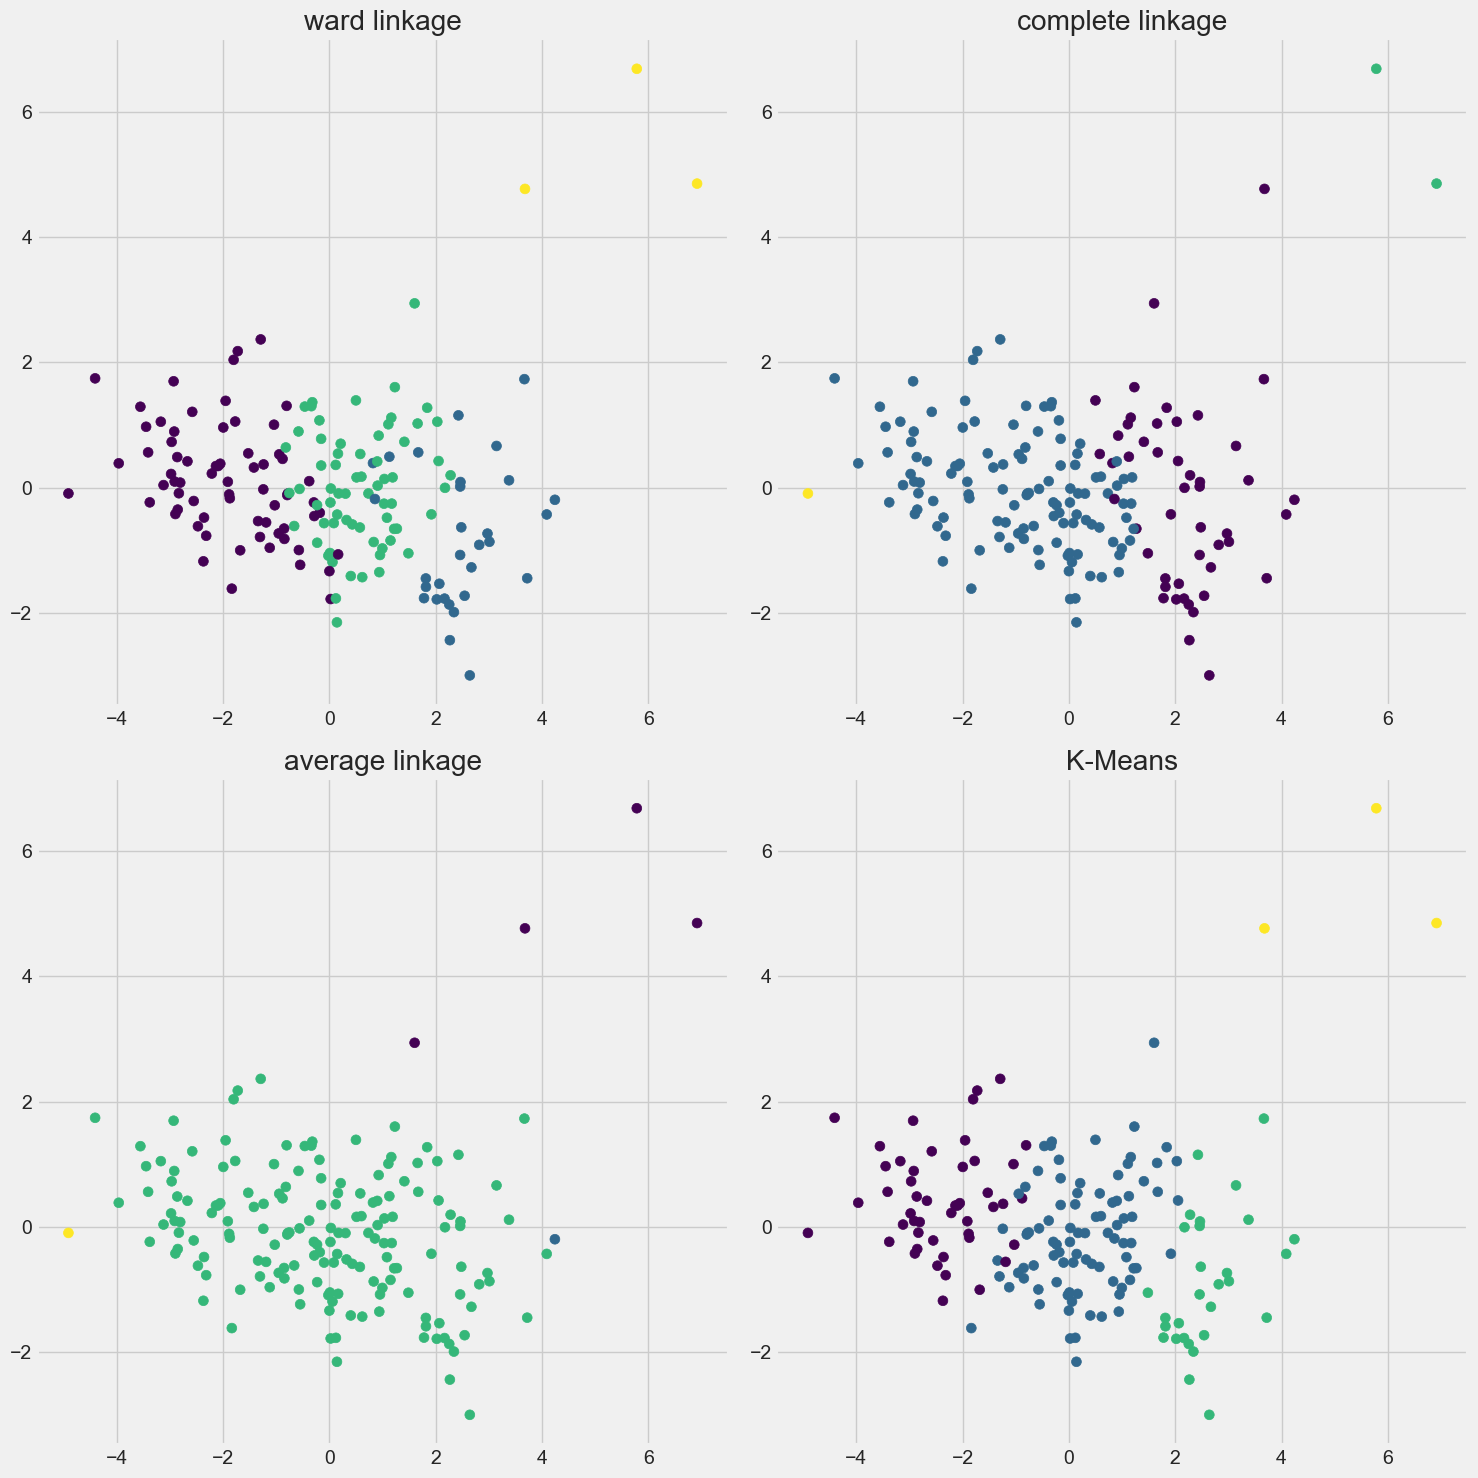

In [116]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

link = 'ward'
clustering = AgglomerativeClustering(linkage=link, n_clusters=4)
clustering.fit(pca_df)
axes[0][0].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clustering.labels_, s=50, cmap='viridis')
axes[0][0].set_title("%s linkage" % link)

link = 'complete'
clustering = AgglomerativeClustering(linkage=link, n_clusters=4)
clustering.fit(pca_df)
axes[0][1].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clustering.labels_, s=50, cmap='viridis')
axes[0][1].set_title("%s linkage" % link)

link = 'average'
clustering = AgglomerativeClustering(linkage=link, n_clusters=4)
clustering.fit(pca_df)
axes[1][0].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clustering.labels_, s=50, cmap='viridis')
axes[1][0].set_title("%s linkage" % link)

clustering = KMeans(n_clusters=4)
clustering.fit(pca_df)
axes[1][1].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clustering.labels_, s=50, cmap='viridis')
axes[1][1].set_title("K-Means")
fig.tight_layout()

In [117]:
fusiones = linkage(pca_df, 'ward')
fusiones[:5]

array([[6.50000000e+01, 8.30000000e+01, 8.48514572e-02, 2.00000000e+00],
       [4.70000000e+01, 1.61000000e+02, 1.70980121e-01, 2.00000000e+00],
       [4.80000000e+01, 6.10000000e+01, 1.83882829e-01, 2.00000000e+00],
       [4.10000000e+01, 1.21000000e+02, 2.32676191e-01, 2.00000000e+00],
       [3.40000000e+01, 1.19000000e+02, 2.45758042e-01, 2.00000000e+00]])

Realizamos las fusiones con ward

Se ve que las 5 primeras fusiones aglomeran clusters de tamaño 1 (puntos atómicos), ya que el tamaño final  de la aglomeración es 2. También que las distancias de fusión de la 3a columna van a estar siempre en orden creciente. El dendrograma se va a utilizar para definir la altura de las ramas.

In [118]:
fusiones[-5:]

array([[320.        , 323.        ,  10.75314796,  30.        ],
       [325.        , 327.        ,  14.54760585,  68.        ],
       [317.        , 328.        ,  16.1053953 ,  33.        ],
       [326.        , 330.        ,  18.88160187,  99.        ],
       [329.        , 331.        ,  29.27105575, 167.        ]])

En las últimas fusiones las distancias son mayores, y las aglomeraciones tienen una cardinalidad más elevada, finalizando en un cluster con la última fusión de los 167 puntos totales.
Además los índices sobrepasan el valor de 167, refiriéndose a clusters previamente aglomerados y no a elementos atómicos, siguiendo el mismo orden de aglomeración.

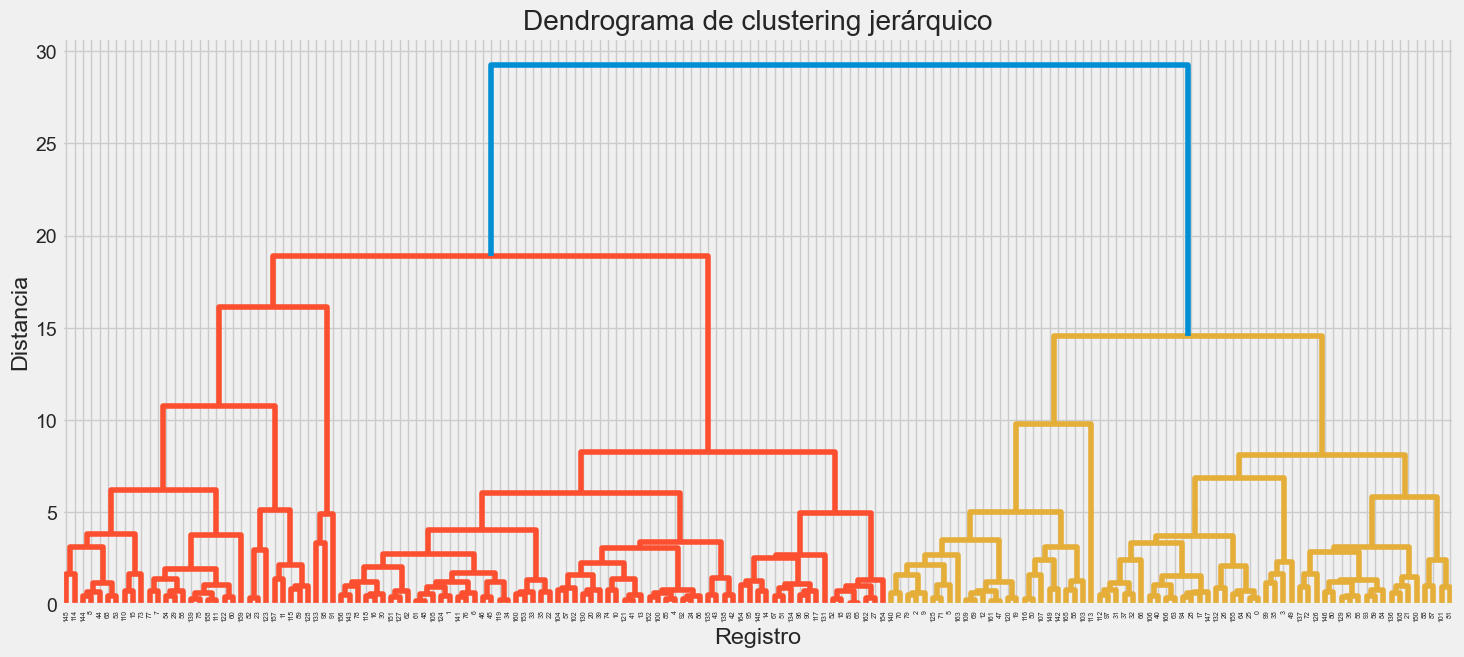

In [119]:
# Dendograma

plt.figure(figsize=(16, 7))  
plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('Registro')
plt.ylabel('Distancia')
dendrogram(fusiones,  
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

Dendograma truncado a 3 niveles

- Cuando se tienen demasiadas instancias resulta muy difícil entender la parte baja del dendrograma. 
- Con el parámetro truncate_mode de la función dendrogram, se puede especificar el nivel de detalle de las hojas que se desea plotear, para que se trunque el dendrograma en su parte baja. Algunos de los valores de configuración de este parámetro se interpretan conjuntamente a otro parámetro llamado p, que Los posibles valores son:
    - None: No se trunca el dendrograma
    - 'lastp': Los últimos nodos desplegados son los que alcanzan el valor del parámetro p.
    - 'mlab': Comportamiento de MatLab / aún no implementado.
    - 'level': Solo se plotean p niveles de fusión (sin contar la raíz).

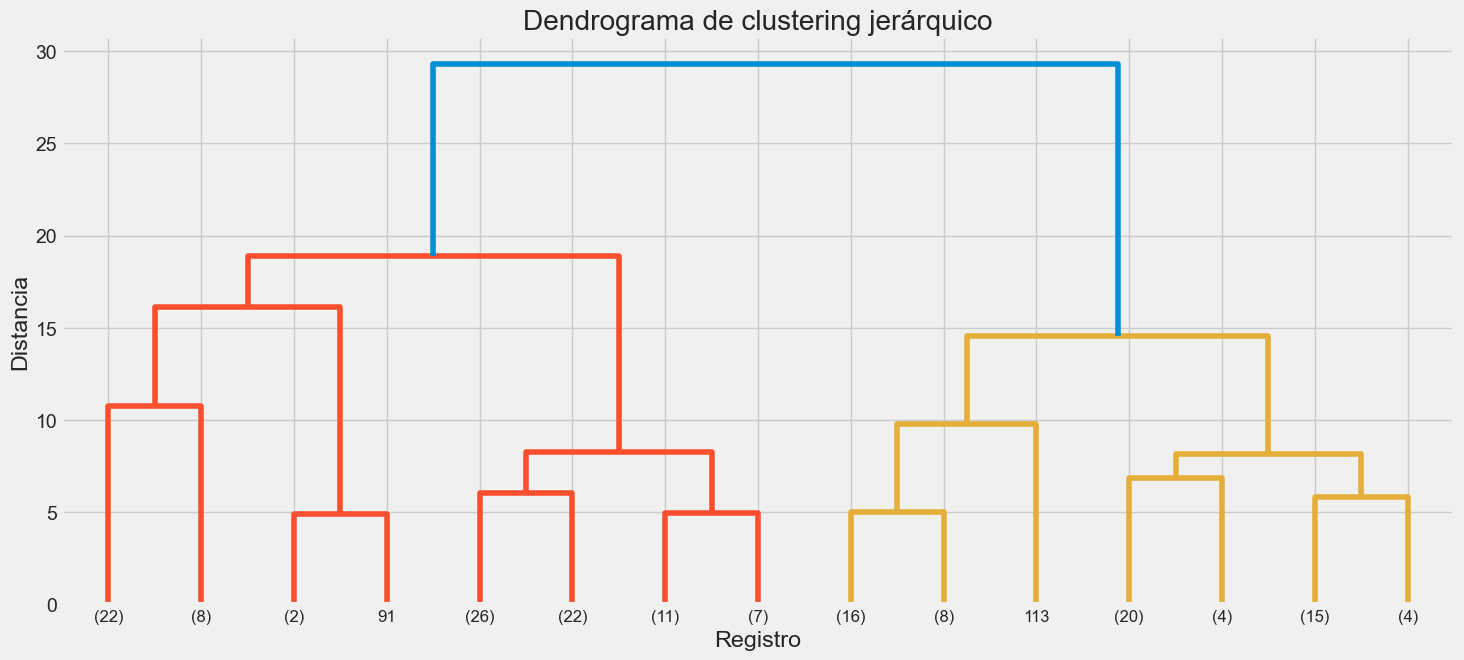

In [120]:
plt.figure(figsize=(16, 7))  
plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('Registro')
plt.ylabel('Distancia')
dendrogram(fusiones,  
           orientation='top',
           distance_sort='descending',
           truncate_mode='level',
           p=3,
           show_leaf_counts=True)
plt.show()

Función que permite reutilizar los datos devueltos por la función dendrograma para mejorar los dendrogramas.


In [121]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')

Se diagrama el dendograma con corte horizontal en 15

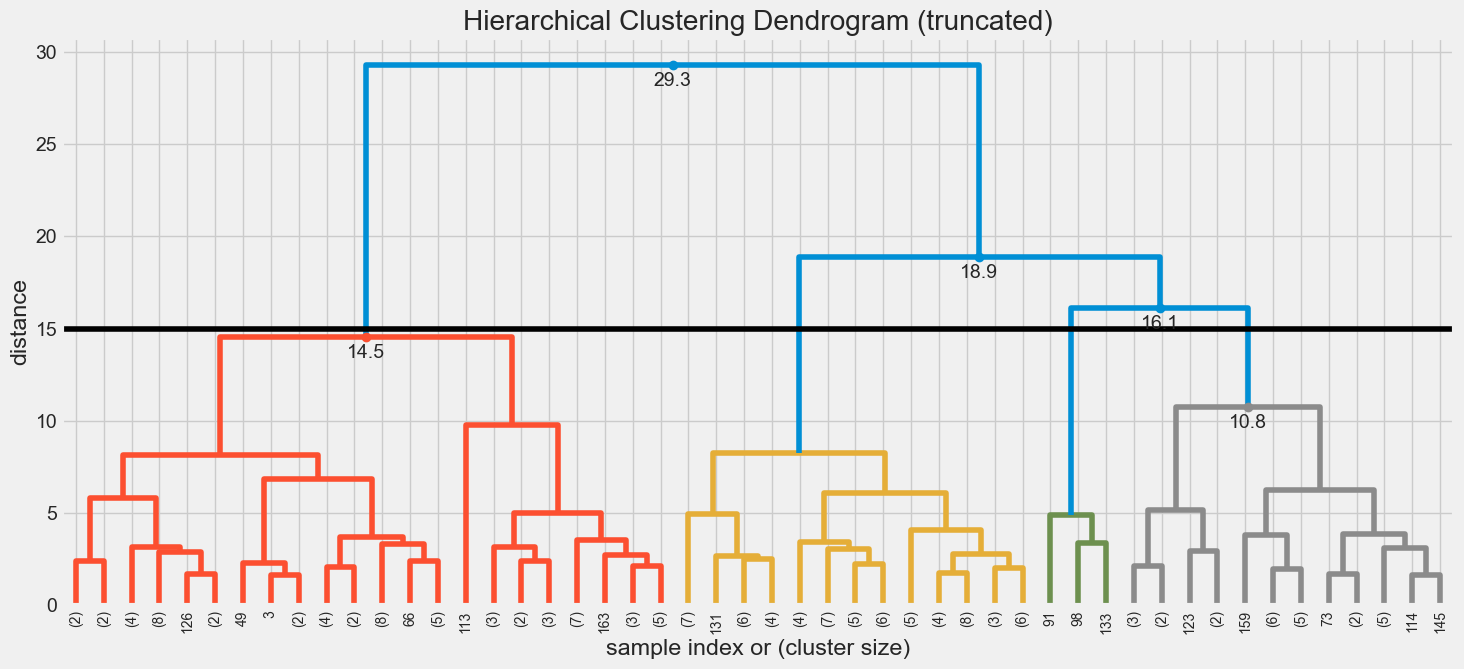

In [122]:
plt.figure(figsize=(16, 7))  
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=15,  # plot a horizontal cut-off line
)

In [123]:
# Se establecen los clusters

max_d = 15 #para criterion="distance"
k = 3
clusters = fcluster(fusiones, k, criterion='maxclust')
clusters

array([1, 2, 1, 1, 2, 1, 2, 3, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       3, 2, 2, 1, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2,
       1, 2, 3, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 1, 1, 1, 3, 2, 1, 2, 2, 1,
       1, 3, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 1, 2, 2, 2, 1, 2, 3, 3, 2, 1, 1, 2, 3, 1, 2, 2,
       1, 3, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2, 3, 3, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 1], dtype=int32)

Text(0.5, 1.0, 'weighted linkage')

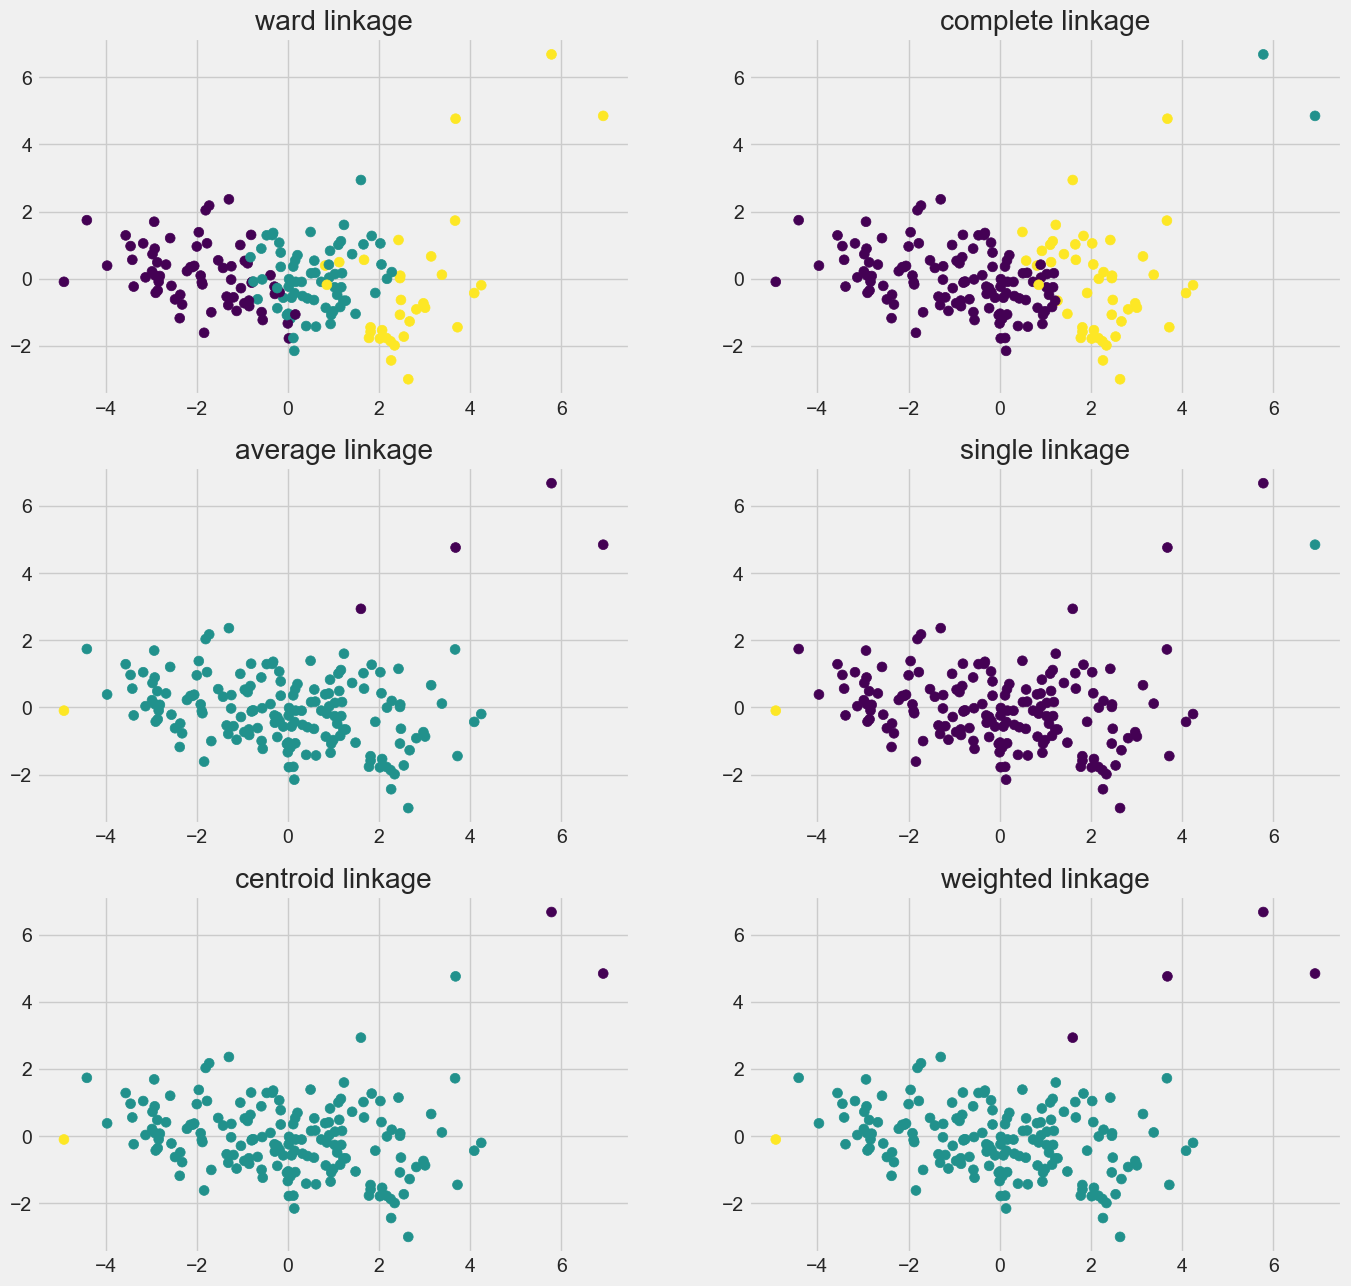

In [124]:
# Se comparan distintos linkages

k = 3
fig, axes = plt.subplots(3,2,figsize=(15,15))

link = 'ward'
fusiones = linkage(pca_df, link)
clusters = fcluster(fusiones, k, criterion='maxclust')
axes[0][0].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clusters, s=50, cmap='viridis')
axes[0][0].set_title("%s linkage" % link)

link = 'complete'
fusiones = linkage(pca_df, link)
clusters = fcluster(fusiones, k, criterion='maxclust')
axes[0][1].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clusters, s=50, cmap='viridis')
axes[0][1].set_title("%s linkage" % link)

link = 'average'
fusiones = linkage(pca_df, link)
clusters = fcluster(fusiones, k, criterion='maxclust')
axes[1][0].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clusters, s=50, cmap='viridis')
axes[1][0].set_title("%s linkage" % link)

link = 'single'
fusiones = linkage(pca_df, link)
clusters = fcluster(fusiones, k, criterion='maxclust')
axes[1][1].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clusters, s=50, cmap='viridis')
axes[1][1].set_title("%s linkage" % link)

link = 'centroid'
fusiones = linkage(pca_df, link)
clusters = fcluster(fusiones, k, criterion='maxclust')
axes[2][0].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clusters, s=50, cmap='viridis')
axes[2][0].set_title("%s linkage" % link)

link = 'weighted'
fusiones = linkage(pca_df, link)
clusters = fcluster(fusiones, k, criterion='maxclust')
axes[2][1].scatter(pca_df['LifeSpan'], pca_df['Commerce'], c=clusters, s=50, cmap='viridis')
axes[2][1].set_title("%s linkage" % link)

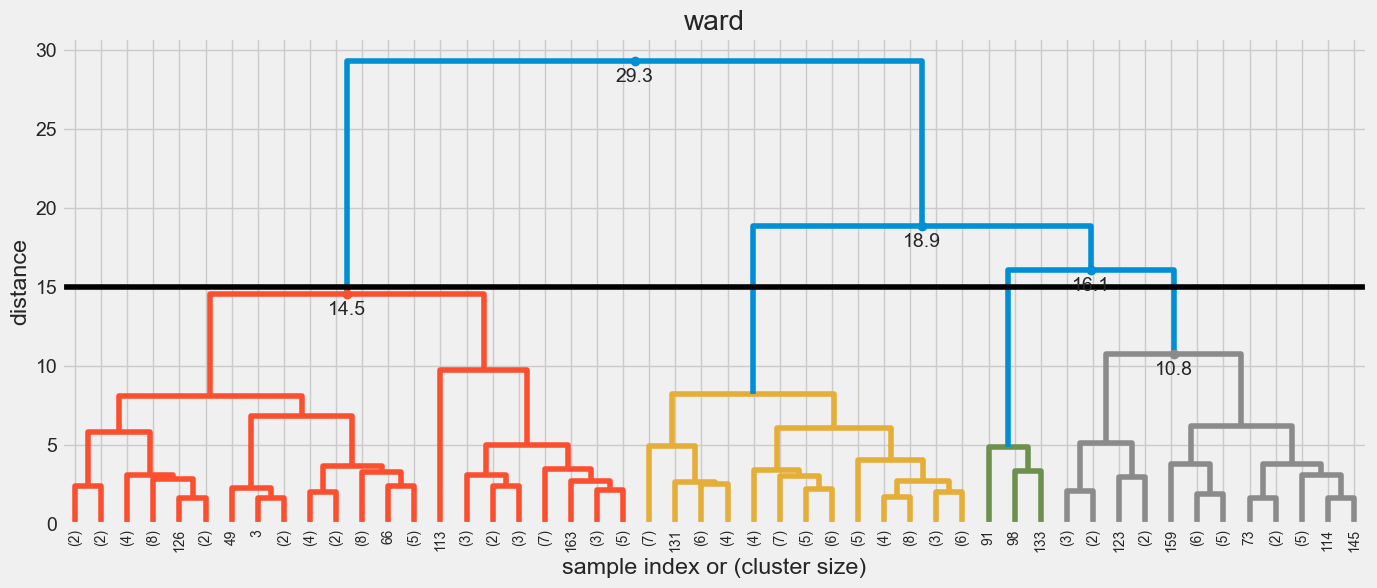

In [125]:
fig, axes = plt.subplots(figsize=(15,6))
link = 'ward'
fusiones = linkage(pca_df, link)
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=15,  # plot a horizontal cut-off line
)
plt.title(link)
plt.show()

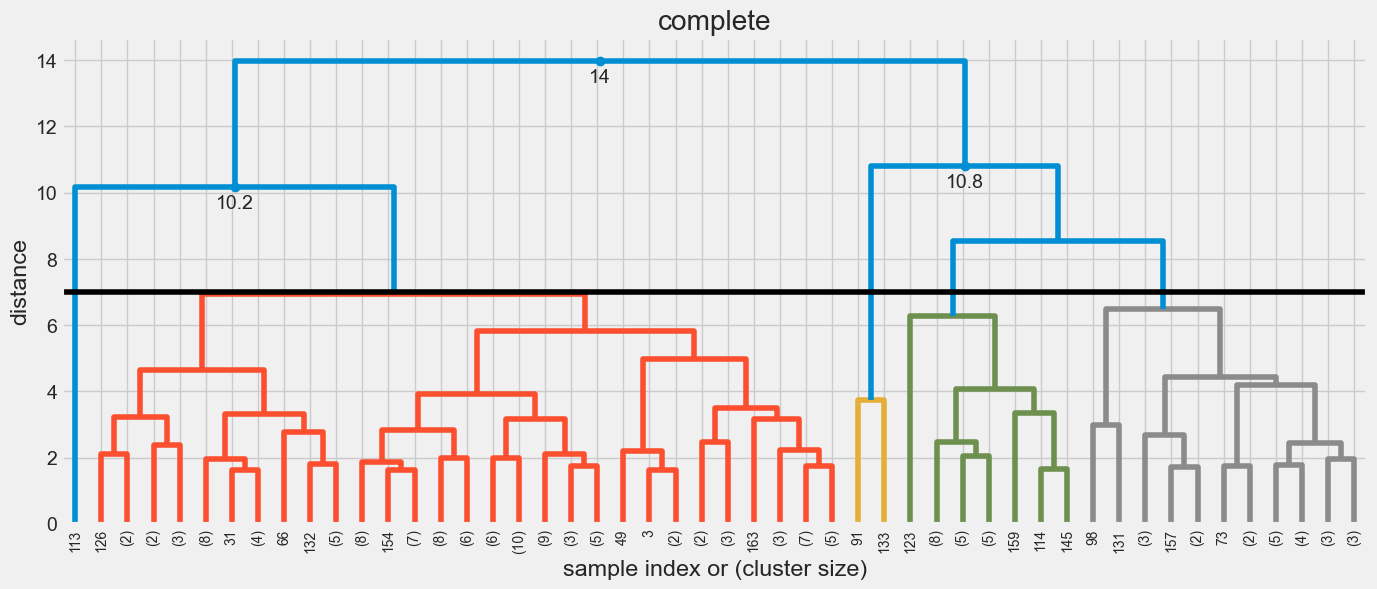

In [126]:
fig, axes = plt.subplots(figsize=(15,6))
link = 'complete'
fusiones = linkage(pca_df, link)
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=7,  # plot a horizontal cut-off line
)
plt.title(link)
plt.show()

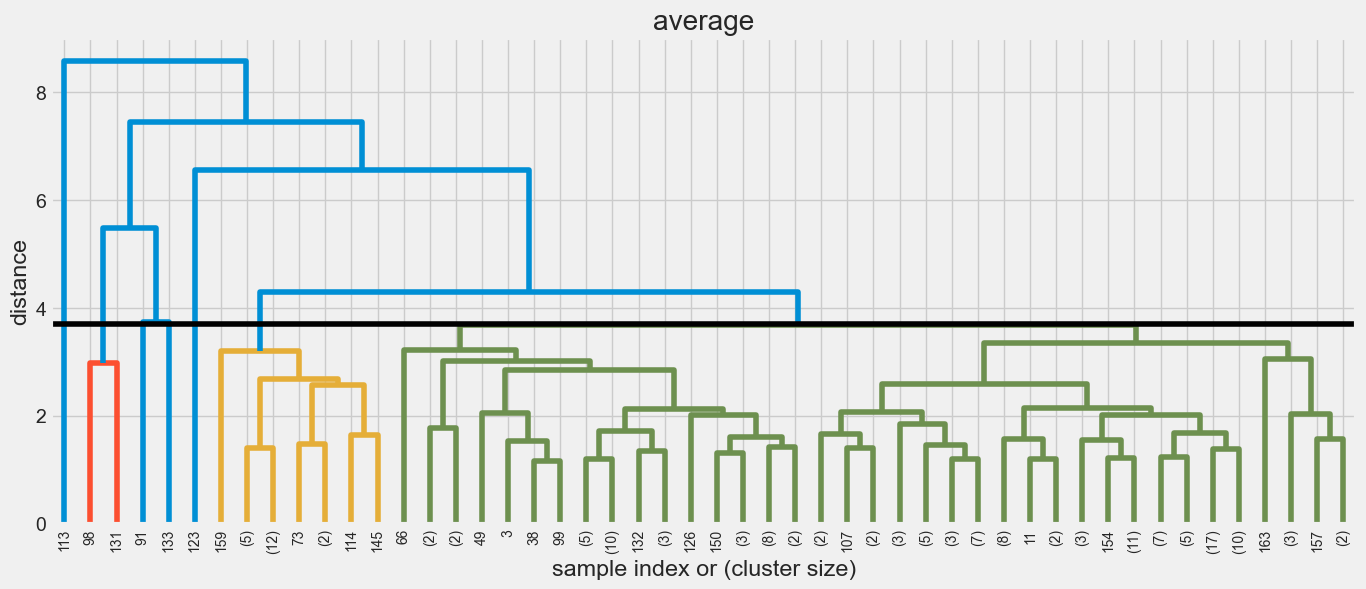

In [127]:
fig, axes = plt.subplots(figsize=(15,6))
link = 'average'
fusiones = linkage(pca_df, link)
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=3.7,  # plot a horizontal cut-off line
)
plt.title(link)
plt.show()

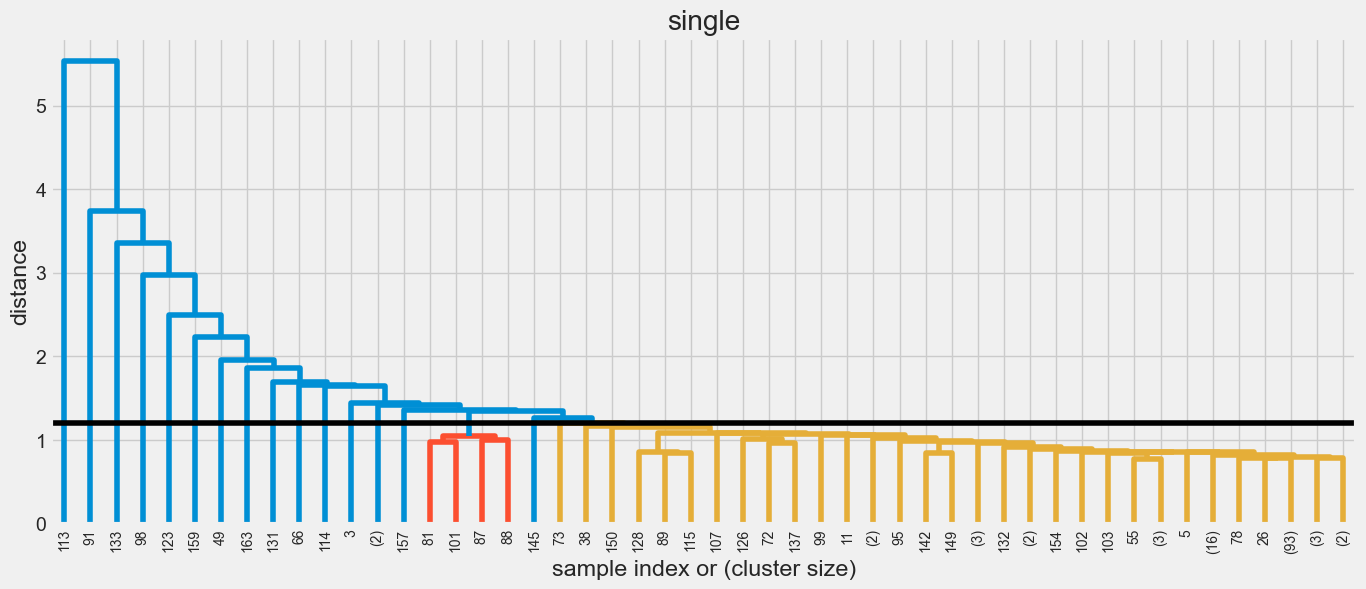

In [128]:
fig, axes = plt.subplots(figsize=(15,6))
link = 'single'
fusiones = linkage(pca_df, link)
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=1.2,  # plot a horizontal cut-off line
)
plt.title(link)
plt.show()

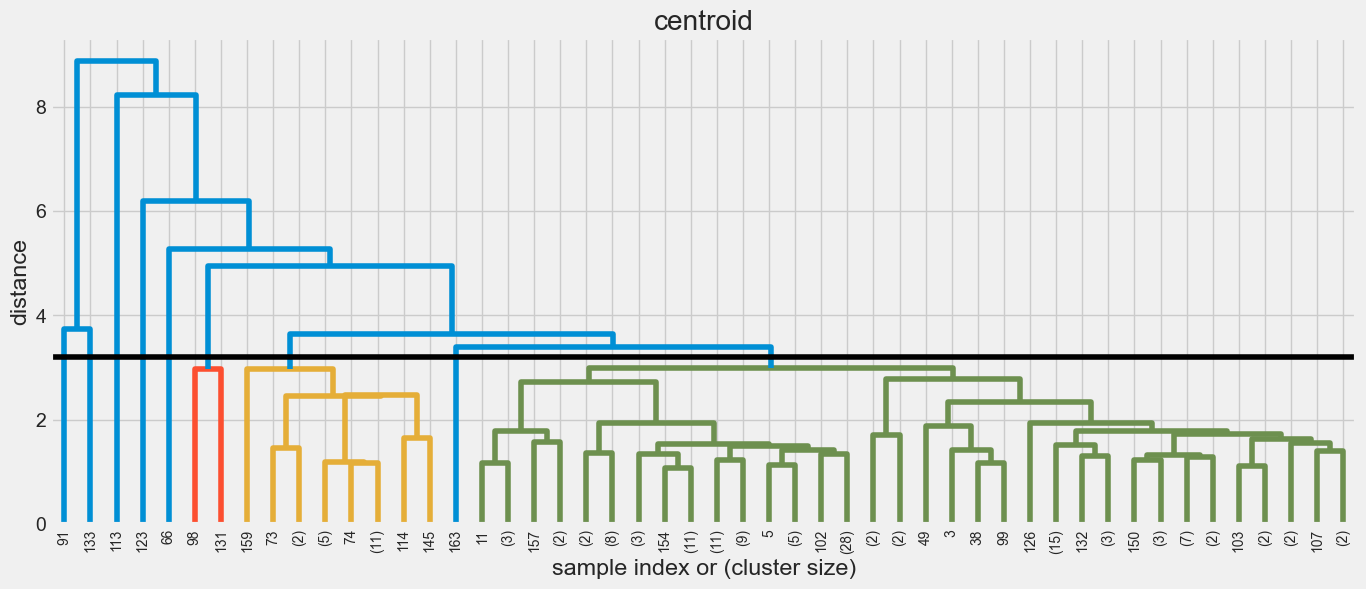

In [129]:
fig, axes = plt.subplots(figsize=(15,6))
link = 'centroid'
fusiones = linkage(pca_df, link)
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=3.2,  # plot a horizontal cut-off line
)
plt.title(link)
plt.show()

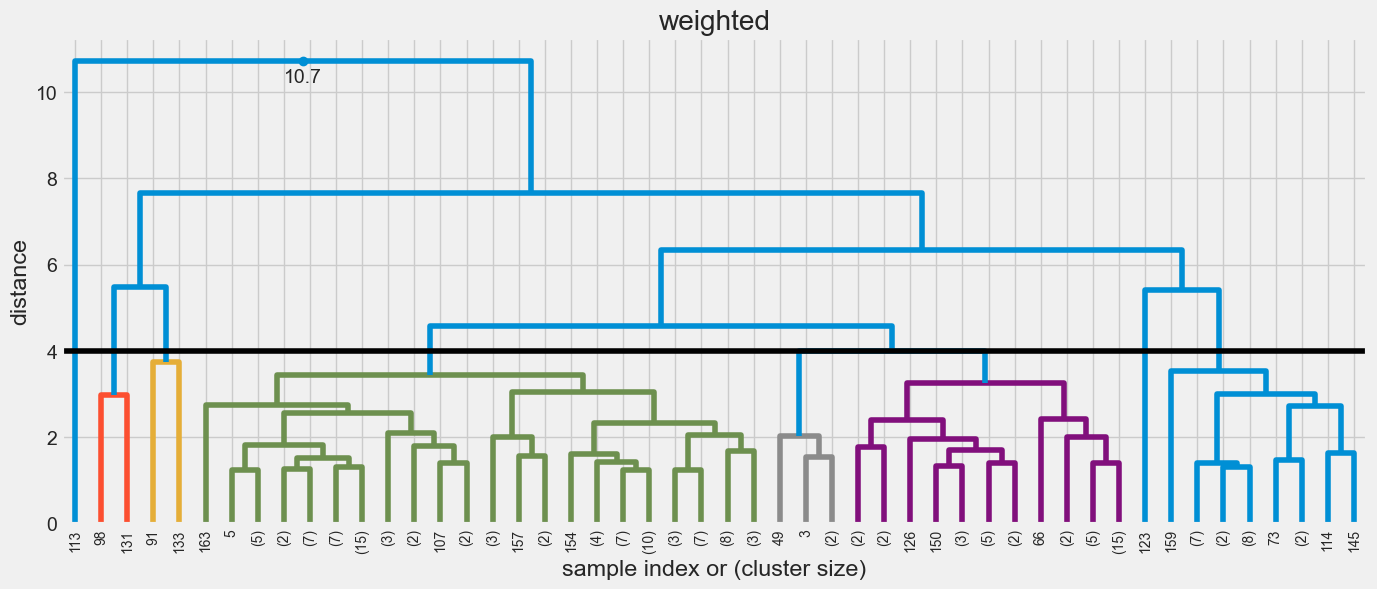

In [130]:
fig, axes = plt.subplots(figsize=(15,6))
link = 'weighted'
fusiones = linkage(pca_df, link)
fancy_dendrogram(
    fusiones,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,
    max_d=4,  # plot a horizontal cut-off line
)
plt.title(link)
plt.show()

In [131]:
fusiones = linkage(pca_df, 'ward')
max_d = 15 #para criterion="distance"
k = 3
clusters = fcluster(fusiones, k, criterion='maxclust')
clusters

array([1, 2, 1, 1, 2, 1, 2, 3, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       3, 2, 2, 1, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2,
       1, 2, 3, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 1, 1, 1, 3, 2, 1, 2, 2, 1,
       1, 3, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 1, 2, 2, 2, 1, 2, 3, 3, 2, 1, 1, 2, 3, 1, 2, 2,
       1, 3, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2, 3, 3, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 1], dtype=int32)

In [132]:
df_hclustering = pca_df.copy()
df_hclustering['Cluster'] = clusters
df_hclustering

LifeSpan  Commerce  LifeQuality  Productivity  Cluster
country                                                                    
Afghanistan         -2.913025  0.095621    -0.718118      1.005255        1
Albania              0.429911 -0.588156    -0.333486     -1.161059        2
Algeria             -0.285225 -0.455174     1.221505     -0.868115        1
Angola              -2.932423  1.695555     1.525044      0.839625        1
Antigua and Barbuda  1.033576  0.136659    -0.225721     -0.847063        2
...                       ...       ...          ...           ...      ...
Vanuatu             -0.820631  0.639570    -0.389923     -0.706595        2
Venezuela           -0.551036 -1.233886     3.101350     -0.115311        1
Vietnam              0.498524  1.390744    -0.238526     -1.074098        2
Yemen               -1.887451 -0.109453     1.109752      0.056257        1
Zambia              -2.864064  0.485998     0.223167      0.816364        1

[167 rows x 5 columns]

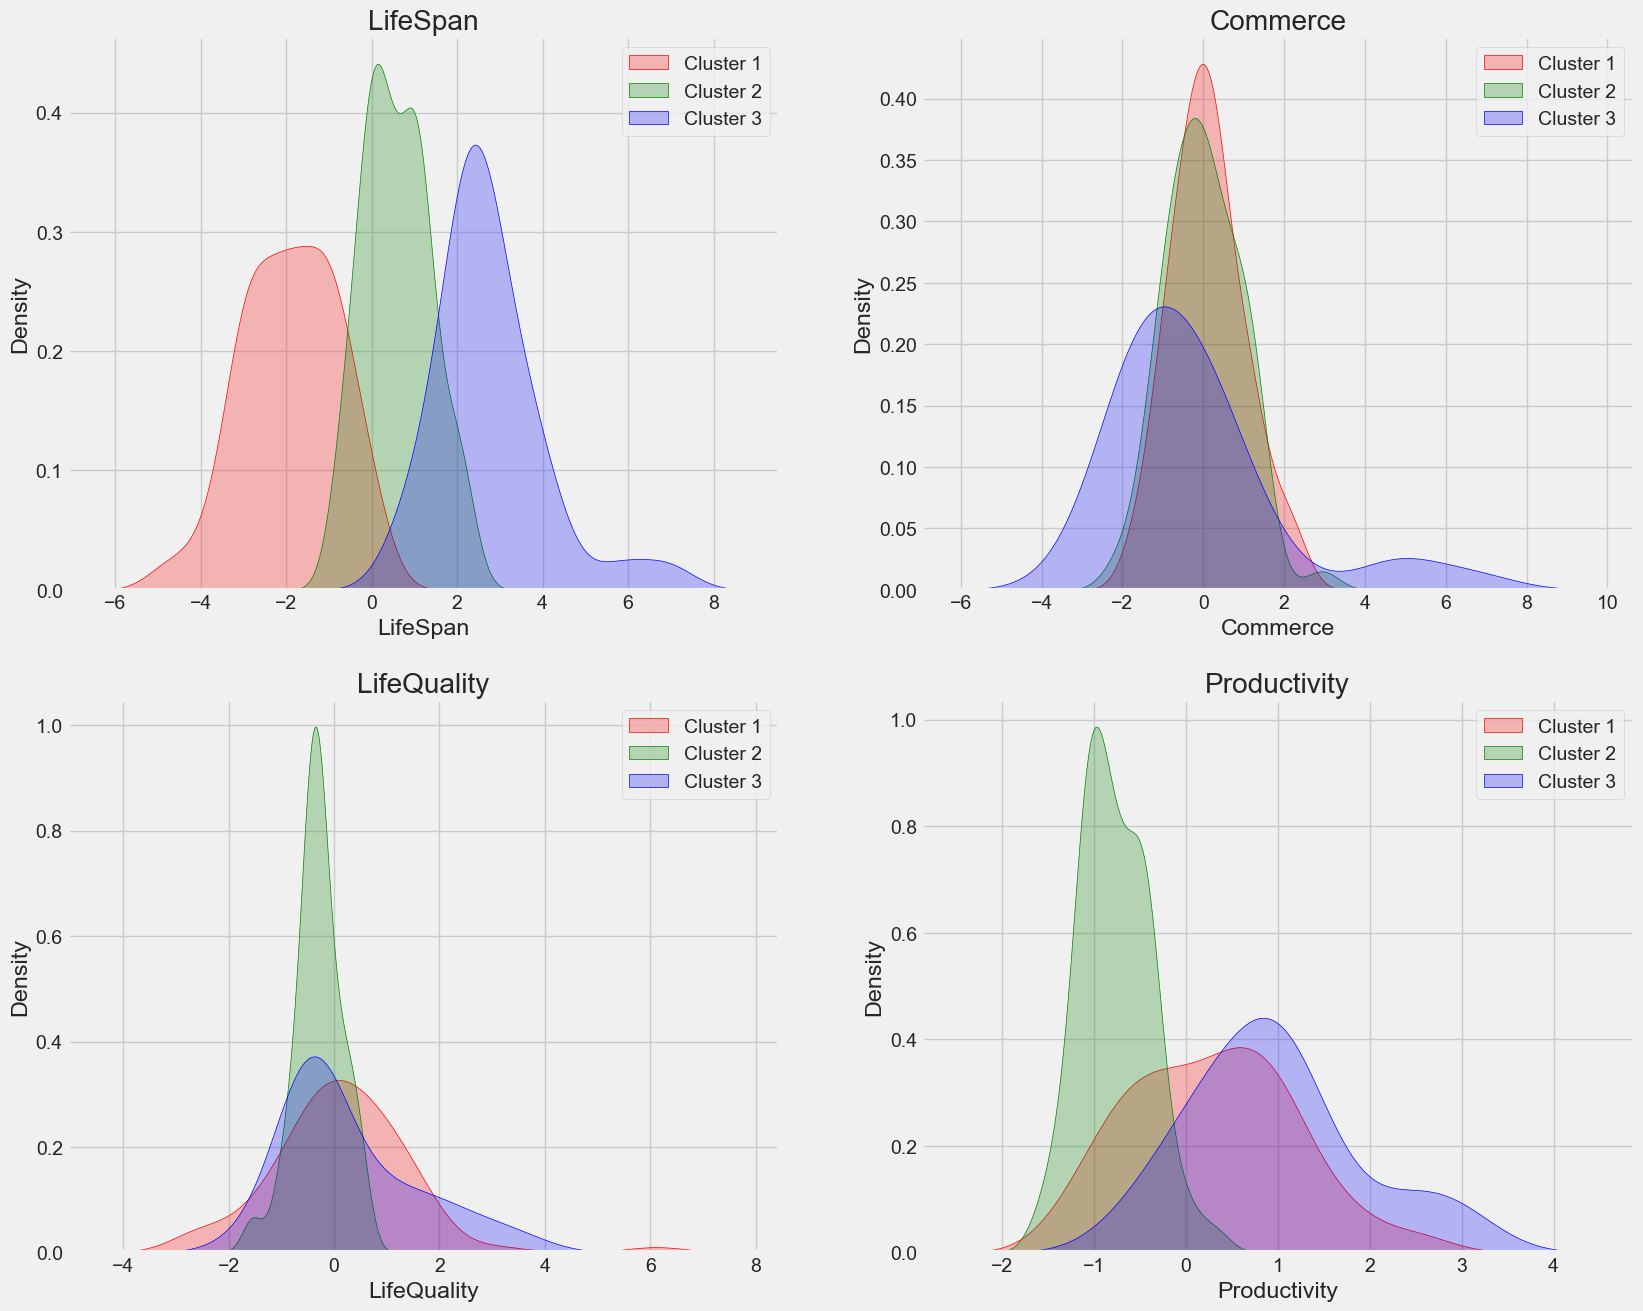

In [133]:
var_num = ['LifeSpan','Commerce','LifeQuality','Productivity']
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(df_hclustering.loc[df_hclustering.Cluster==1][var], shade=True, color='r', ax=ax);
    sns.kdeplot(df_hclustering.loc[df_hclustering.Cluster==2][var], shade=True, color='g', ax=ax);
    sns.kdeplot(df_hclustering.loc[df_hclustering.Cluster==3][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
    i+=1

- Cluster 1: tiempo de vida bajo, comercio medio, calidad de vida media, productividad media
- Cluster 2: tiempo de vida medio, comercio medio, calidad de vida media baja. productividad baja
- Cluster 3: tiempo de vida alto, comercio medio bajo, calidad de vida media baja, productividad media alta

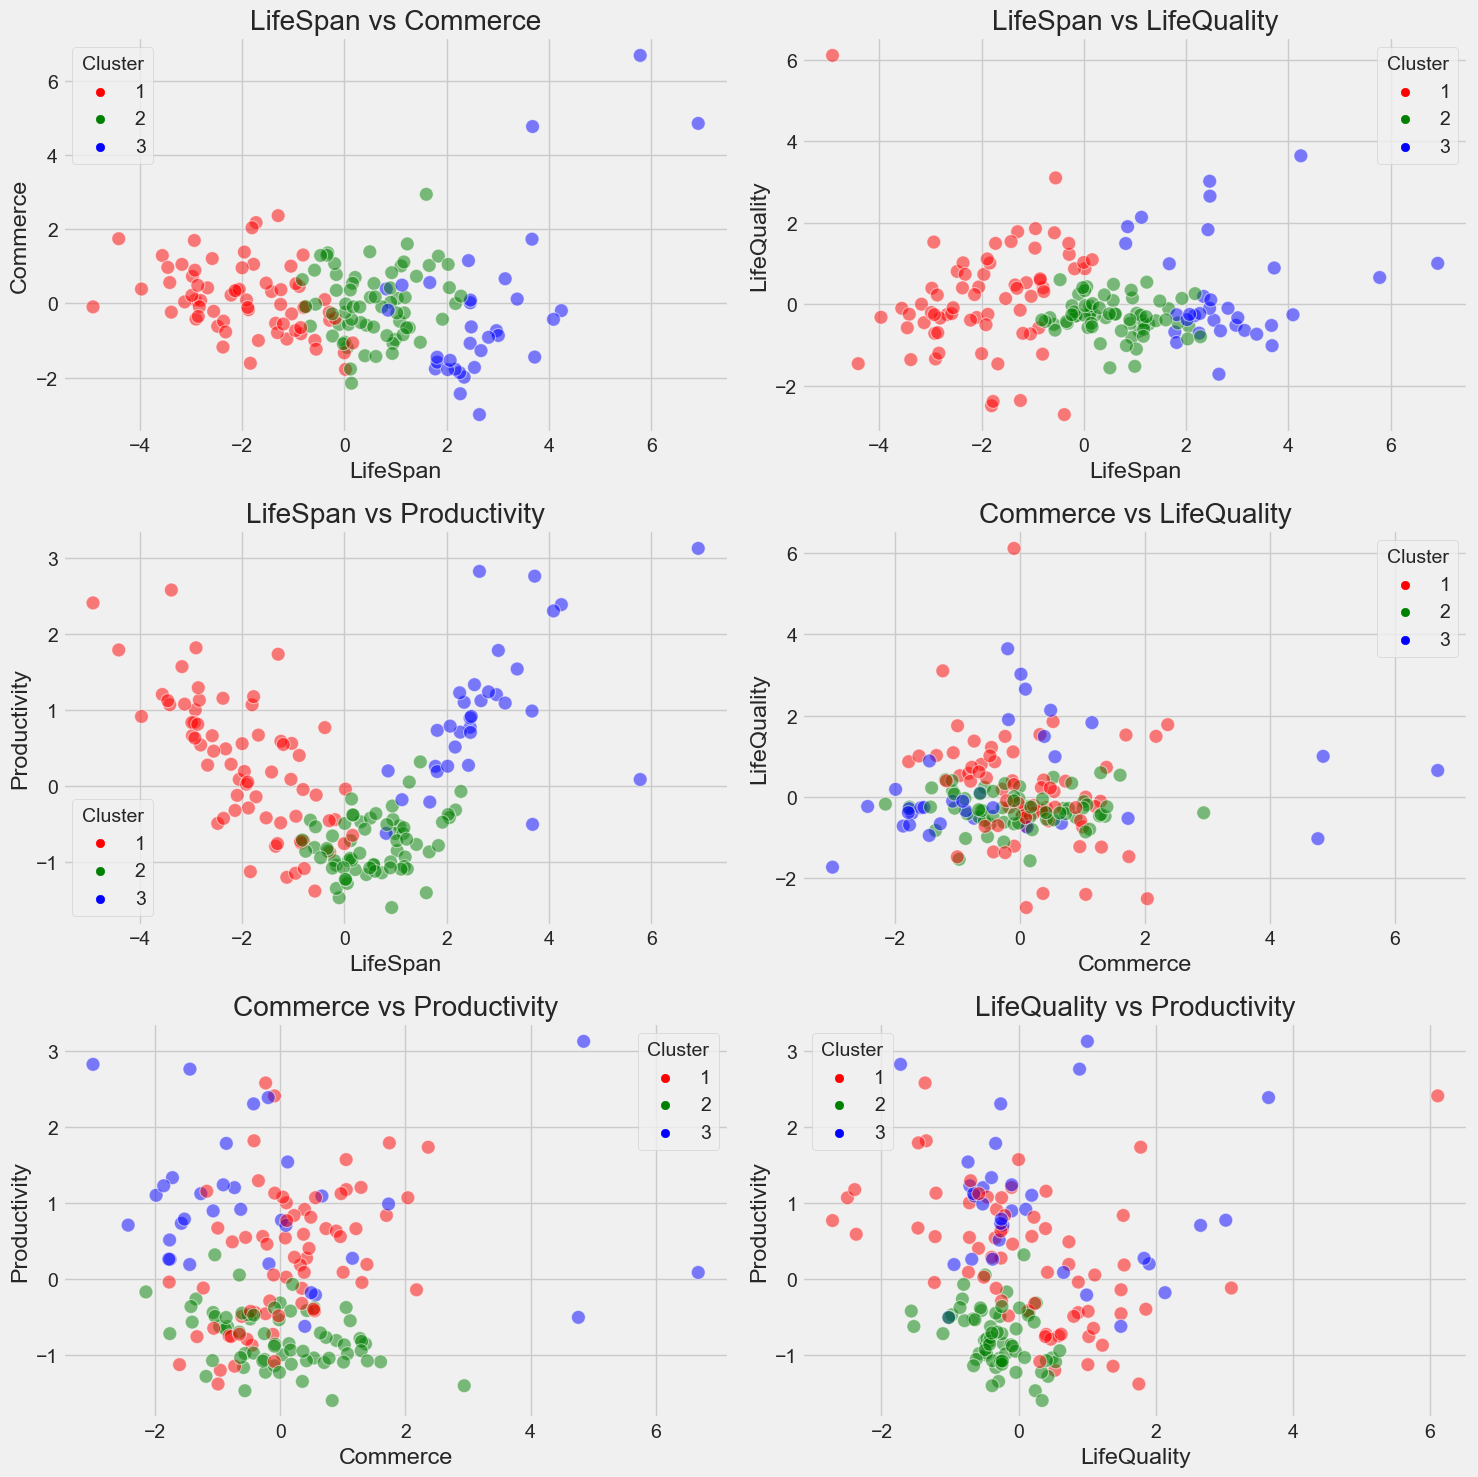

In [134]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b",'y']
ax = fig.add_subplot(3, 2, 1)
sns.scatterplot(x='LifeSpan', y='Commerce', hue="Cluster", data=df_hclustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeSpan vs Commerce")
ax = fig.add_subplot(3, 2, 2)
sns.scatterplot(x='LifeSpan', y="LifeQuality", hue="Cluster", data=df_hclustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeSpan vs LifeQuality")
ax = fig.add_subplot(3, 2, 3)
sns.scatterplot(x='LifeSpan', y="Productivity", hue="Cluster", data=df_hclustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeSpan vs Productivity")
ax = fig.add_subplot(3, 2, 4)
sns.scatterplot(x='Commerce', y="LifeQuality", hue="Cluster", data=df_hclustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Commerce vs LifeQuality")
ax = fig.add_subplot(3, 2, 5)
sns.scatterplot(x='Commerce', y="Productivity", hue="Cluster", data=df_hclustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Commerce vs Productivity")
ax = fig.add_subplot(3, 2, 6)
sns.scatterplot(x='LifeQuality', y="Productivity", hue="Cluster", data=df_hclustering, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("LifeQuality vs Productivity")
fig.tight_layout()
plt.show()

In [135]:
hc_clusters_df = df_hclustering.copy()

for col in df_scaled.columns:
    hc_clusters_df[col] = df_scaled[col]
hc_clusters_df.reset_index(inplace=True)
hc_clusters_df.loc[hc_clusters_df['Cluster'] == 1, 'Cluster'] = 'less_developed'
hc_clusters_df.loc[hc_clusters_df['Cluster'] == 2, 'Cluster'] = 'developing'
hc_clusters_df.loc[hc_clusters_df['Cluster'] == 3, 'Cluster'] = 'developed'
hc_clusters_df

country  LifeSpan  Commerce  LifeQuality  Productivity  \
0            Afghanistan -2.913025  0.095621    -0.718118      1.005255   
1                Albania  0.429911 -0.588156    -0.333486     -1.161059   
2                Algeria -0.285225 -0.455174     1.221505     -0.868115   
3                 Angola -2.932423  1.695555     1.525044      0.839625   
4    Antigua and Barbuda  1.033576  0.136659    -0.225721     -0.847063   
..                   ...       ...       ...          ...           ...   
162              Vanuatu -0.820631  0.639570    -0.389923     -0.706595   
163            Venezuela -0.551036 -1.233886     3.101350     -0.115311   
164              Vietnam  0.498524  1.390744    -0.238526     -1.074098   
165                Yemen -1.887451 -0.109453     1.109752      0.056257   
166               Zambia -2.864064  0.485998     0.223167      0.816364   

            Cluster  child_mort   exports    health   imports    income  \
0                 0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1    less_developed   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2    less_developed   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 0    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    less_developed   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..              ...         ...       ...       ...       ...       ...   
162  less_developed   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163  less_developed   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164  less_developed   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165               0    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               0    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  
0     0.157336   -1.619092   1.902882 -0.679180  
1    -0.312347    0.647866  -0.859973 -0.485623  
2     0.789274    0.670423  -0.038404 -0.465376  
3     1.387054   -1.179234   2.128151 -0.516268  
4    -0.601749    0.704258  -0.541946 -0.041817  
..         ...         ...        ...       ...  
162  -0.489784   -0.852161   0.365754 -0.546913  
163   3.616865    0.546361  -0.316678  0.029323  
164   0.409732    0.286958  -0.661206 -0.637754  
165   1.500916   -0.344633   1.140944 -0.637754  
166   0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 15 columns]

Creamos un mapa de los clusters encontrados por clustering jerárquico con linkage ward

In [136]:
world_help_clusters = px.choropleth(
    data_frame=hc_clusters_df,
    locations='country', 
    locationmode='country names', 
    color='Cluster',
    color_discrete_map={
        'Prosperous': 'Blue',
        'Trade-dependent': 'Green', 
        'Not-developed': 'Red', 
        'Developing': 'Yellow'
    }, 
    title='Clusters',
    labels={'Cluster': 'Etiquetas'}
)

world_help_clusters.update_geos(
    fitbounds="locations",
    projection=dict(type='natural earth')
)
world_help_clusters.update_layout(
    legend_title_text='Etiquetas', 
    legend_title_side='top', 
    title_pad_l=260, 
    title_y=0.86
)

Cluster less_developed

In [137]:
hc_clusters_df[hc_clusters_df['Cluster'] == 'less_developed'][:20]

country  LifeSpan  Commerce  LifeQuality  Productivity  \
1                  Albania  0.429911 -0.588156    -0.333486     -1.161059   
2                  Algeria -0.285225 -0.455174     1.221505     -0.868115   
4      Antigua and Barbuda  1.033576  0.136659    -0.225721     -0.847063   
5                Argentina  0.022407 -1.779187     0.869997     -0.036967   
6                  Armenia -0.101584 -0.568252     0.242092     -1.466266   
9               Azerbaijan -0.181487 -0.402866     0.867459     -0.438773   
10                 Bahamas  1.268744 -0.656588    -0.488098      0.055634   
11                 Bahrain  1.670996  0.561162     0.991258     -0.207080   
12              Bangladesh -1.123851 -0.961397     0.526615     -1.197201   
13                Barbados  1.081374 -0.481970    -0.664355     -0.522505   
14                 Belarus  0.580025  0.535327     0.486228     -1.035275   
16                  Belize  0.211255  0.699243    -0.275561     -1.095627   
18                  Bhutan -0.156571  0.777396    -0.277344     -1.038650   
19                 Bolivia -0.793852 -0.120261     0.400741     -0.724703   
20  Bosnia and Herzegovina  0.995867 -0.971888    -1.528328     -0.620885   
22                  Brazil  0.140781 -2.151077    -0.172635     -0.166920   
24                Bulgaria  0.906595  0.030278    -0.471204     -0.994661   
27                Cambodia -0.582412  0.894820    -0.498705     -0.805234   
30              Cape Verde -0.155801  0.351235    -0.292087     -1.343741   
33                   Chile  0.951656 -1.076428     0.150821     -0.436634   

           Cluster  child_mort   exports    health   imports    income  \
1   less_developed   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2   less_developed   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
4   less_developed   -0.695634  0.160668 -0.286894  0.497568  0.101732   
5   less_developed   -0.591177 -0.812628  0.468966 -1.279787  0.080920   
6   less_developed   -0.501643 -0.743107 -0.882089 -0.065883 -0.543421   
9   less_developed    0.023128  0.482661 -0.341667 -1.085065 -0.059556   
10  less_developed   -0.608587 -0.223528  0.392285 -0.132171  0.299440   
11  less_developed   -0.737914  1.038830 -0.673953  0.166126  1.246357   
12  less_developed    0.276809 -0.918739 -1.203420 -1.039492 -0.765062   
13  less_developed   -0.598639 -0.058873  0.421497  0.074980 -0.095976   
14  less_developed   -0.815013  0.376549 -0.440257  0.729576 -0.049151   
16  less_developed   -0.484233  0.625362 -0.589969  0.439565 -0.482027   
18  less_developed    0.110176  0.050898 -0.589969  0.986444 -0.557989   
19  less_developed    0.207171  0.003331 -0.721423 -0.521615 -0.610537   
20  less_developed   -0.780194 -0.417455  1.564416  0.182698 -0.386295   
22  less_developed   -0.459363 -1.112667  0.801253 -1.453794 -0.137599   
24  less_developed   -0.683199  0.332641  0.019832  0.253129 -0.095976   
27  less_developed    0.152456  0.475343 -0.414697  0.522426 -0.760900   
30  less_developed   -0.292729 -0.307685 -0.995285  0.617715 -0.588685   
33  less_developed   -0.735427 -0.124735  0.417845 -0.645905  0.117340   

    inflation  life_expec  total_fer      gdpp  
1   -0.312347    0.647866  -0.859973 -0.485623  
2    0.789274    0.670423  -0.038404 -0.465376  
4   -0.601749    0.704258  -0.541946 -0.041817  
5    1.244725    0.591474  -0.382933 -0.145791  
6   -0.001123    0.309514  -0.833471 -0.533233  
9    0.571037   -0.164178  -0.681083 -0.389857  
10  -0.775674    0.365906  -0.720836  0.822811  
11  -0.032435    0.614031  -0.522070  0.423331  
12  -0.060901   -0.017559  -0.409435 -0.667961  
13  -0.707926    0.692980  -0.773841  0.166131  
14   0.694389   -0.017559  -0.965982 -0.379460  
16  -0.630214    0.095225  -0.157664 -0.471942  
18  -0.170019    0.174174  -0.376308 -0.590145  
19   0.094712    0.117782   0.166988 -0.601089  
20  -0.605544    0.704258  -1.085242 -0.457167  
22   0.059604    0.411020  -0.760590 -0.096540  
24  -0.633061

Cluster developing

In [138]:
hc_clusters_df[hc_clusters_df['Cluster'] == 'developing'][:20]

country  LifeSpan  Commerce  LifeQuality  Productivity     Cluster  \
7        Australia  2.342165 -1.988459     0.190344      1.105038  developing   
8          Austria  2.973764 -0.734689    -0.519766      1.205442  developing   
15         Belgium  3.143786  0.663548    -0.645228      1.094898  developing   
23          Brunei  2.460086  0.016454     3.019840      0.776841  developing   
29          Canada  2.543631 -1.727095    -0.396281      1.336853  developing   
42          Cyprus  2.174455 -0.004510     0.257320     -0.311857  developing   
43  Czech Republic  2.053263  0.423198    -0.543336     -0.411736  developing   
44         Denmark  3.010492 -0.865549    -0.335752      1.787223  developing   
53         Finland  2.458960 -1.076143    -0.100439      0.899328  developing   
54          France  2.254271 -1.866638    -0.711988      1.230005  developing   
58         Germany  2.671422 -1.273610    -0.656171      1.125993  developing   
60          Greece  1.779493 -1.765397    -0.684198      0.262702  developing   
68         Iceland  2.480924 -0.634702     0.103795      0.919853  developing   
73         Ireland  3.668628  1.729493    -0.523989      0.989975  developing   
74          Israel  1.485317 -1.049224     0.076791      0.320989  developing   
75           Italy  2.165810 -1.772485    -0.284184      0.516712  developing   
77           Japan  2.265882 -2.435594    -0.229699      0.712566  developing   
82          Kuwait  2.465659  0.088050     2.652268      0.708884  developing   
91      Luxembourg  6.917755  4.849844     1.001837      3.129643  developing   
98           Malta  3.679543  4.765486    -1.021313     -0.501107  developing   

    child_mort   exports    health   imports    income  inflation  life_expec  \
7    -0.832423 -0.779697  0.699011 -1.076779  1.261966  -0.628316    1.290735   
8    -0.844858  0.372890  1.527901  0.037693  1.355617  -0.655549    1.121559   
15   -0.839884  1.291301  1.418356  1.152164  1.246357  -0.559999    1.065167   
23   -0.690660  0.961991 -1.451722 -0.782625  3.301480   0.846206    0.738094   
29   -0.812526 -0.439409  1.637446 -0.658334  1.225546  -0.466062    1.211786   
42   -0.862268  0.332641 -0.308803  0.439565  0.871752  -0.547664    1.053889   
43   -0.867242  0.910764  0.388633  0.663288  0.580393  -0.874070    0.783207   
44   -0.849832  0.343618  1.673961 -0.136314  1.397240  -0.432852    1.008775   
53   -0.877190 -0.088145  0.779344 -0.393181  1.178720  -0.705079    1.065167   
54   -0.847345 -0.523567  1.856536 -0.778482  1.027838  -0.638754    1.223065   
58   -0.847345  0.043580  1.746991 -0.405610  1.209937  -0.666461    1.076446   
60   -0.854806 -0.695540  1.272296 -0.670763  0.601205  -0.674526    1.110281   
68   -0.887138  0.449729  0.943661 -0.148743  1.126692  -0.219360    1.290735   
73   -0.847345  2.264597  0.866980  1.641040  1.485688  -1.043915    1.110281   
74   -0.837397 -0.223528  0.297346 -0.579617  0.648030  -0.570436    1.223065   
75   -0.852319 -0.582111  0.991131 -0.815769  0.991418  -0.708115    1.256900   
77   -0.872216 -0.955329  0.976525 -1.379219  0.970606  -0.918666    1.380962   
82   -0.683199  0.936378 -1.528404 -0.683193  3.020526   0.324335    0.862156   
91   -0.882164  4.899083  0.348467  3.940415  3.878996  -0.394898    1.211786   
98   -0.782681  4.094101  0.669799  4.437577  0.580393  -0.374972    1.099002   

    total_fer      gdpp  
7   -0.674457  2.130699  
8   -0.999109  1.857082  
15  -0.720836  1.720274  
23  -0.734087  1.222291  
29  -0.873224  1.884444  
42  -1.012361  0.976037  
43  -0.952731  0.374080  
44  -0.714211  2.464511  
53  -0.714211  1.818776  
54  -0.608202  1.512325  
58  -1.032237  1.577993  
60  -0.972607  0.762616  
68  -0.495567  1.583465  
73  -0.594951  1.955584  
74   0.054353  0.965092  
75  -0.985858  1.249653  
77  -1.032237  1.725746  
82  -0.488942  1.397406  
91  -0.873224  5.036507  
98  -1.052114  0.445220

Cluster developed

In [139]:
hc_clusters_df[hc_clusters_df['Cluster'] == 'developed'][:20]

Empty DataFrame
Columns: [country, LifeSpan, Commerce, LifeQuality, Productivity, Cluster, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []